# Convert JSON to Pandas DF

Date: August 2019 | Author: Hilary Goh | Team: Woodside, Intelligent Assets & Robotics

---

Only using data from one pump
* cleanest signal
* Ground truth available
* ON & OFF state
* assume UTC time for both time series?

###### OPAM:1473 | FLOC: AU21.A6424AP7 | Thing ID: 00:80:00:00:04:01:21:C0 
###### PHD tag: PGP.64FI491.DACA.PV | Group: Membrane Biological Reactor | GTm: m3/hr

---

Test a random forest, aim > 80% accuracy

Can it select useful features?

Will it just use temperature - easy feature

###### Data source:
* saved json from OnOff_c0.ipynb
* var timestart="2019-07-07 00:00:00"
* var timeend="2019-07-27 23:55:00"
* no filtering - full raw dataset
* 30min sampling resolution


Test/Train/Validate
* need to set aside a test set (unseen data)

---

###### Import libraries and modules

In [101]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sb
sb.set_style('whitegrid')

In [102]:
from sklearn.model_selection import train_test_split # this doesn't create a validation set, need to set aside a chunk of data which is the actual test set
from sklearn.metrics import mean_squared_error, r2_score

## 1. Convert JSON into pandas dataframe
* check timestamp conversion
* check array (correct columns, correct index)
* split pandas dataframe
* check keys

In [103]:
with open('c0.json','r') as fp: #open the file for viewing, not using pandas just yet
     rawr = json.load(fp)

In [104]:
rawr.keys() #check for dictionaries and lists

dict_keys(['id', 'start', 'end', 'V1', 'V2', 'V3', 'T', 'gotData', 'groundtruth', 'sensorId', 'sensorType', 'QUUUUuery'])

In [105]:
rawr['T'].keys()

dict_keys(['gotData', 'hits', 'data'])

In [106]:
rawr['T']['data'].keys()

dict_keys(['T1', 'T2', 'T3', 'OnOff'])

In [107]:
rawr['T']['data']['T1'].keys() #nb another T

dict_keys(['ts', 'T'])

In [108]:
rawr['T']['data']['T1']['ts'][0:10] #check timestamp format for temperature
# readings every half hour

['2019-7-7 00:03:27',
 '2019-7-7 00:33:27',
 '2019-7-7 01:03:27',
 '2019-7-7 01:33:29',
 '2019-7-7 02:03:27',
 '2019-7-7 02:33:28',
 '2019-7-7 03:03:28',
 '2019-7-7 03:33:29',
 '2019-7-7 04:03:28',
 '2019-7-7 04:33:28']

In [109]:
rawr['T']['data']['T2']['ts'][0:10] #check timestamp format for temperature
# readings every half hour

['2019-7-7 00:03:27',
 '2019-7-7 00:33:27',
 '2019-7-7 01:03:27',
 '2019-7-7 01:33:29',
 '2019-7-7 02:03:27',
 '2019-7-7 02:33:28',
 '2019-7-7 03:03:28',
 '2019-7-7 03:33:29',
 '2019-7-7 04:03:28',
 '2019-7-7 04:33:28']

In [110]:
rawr['T']['data']['T3']['ts'][0:10] #check timestamp format for temperature
# readings every half hour

['2019-7-7 00:03:27',
 '2019-7-7 00:33:27',
 '2019-7-7 01:03:27',
 '2019-7-7 01:33:29',
 '2019-7-7 02:03:27',
 '2019-7-7 02:33:28',
 '2019-7-7 03:03:28',
 '2019-7-7 03:33:29',
 '2019-7-7 04:03:28',
 '2019-7-7 04:33:28']

In [111]:
rawr['T']['data']['T1']['T'][0:10] #check temperature values

['23.5', '23.1', '23', '22.9', '22.8', '22.7', '22.6', '22.5', '22.3', '22.3']

In [112]:
rawr['T']['data']['T2']['T'][0:10] #check temperature values

['27.8', '27.5', '27.6', '27.5', '27.3', '27.1', '27.1', '27', '26.8', '26.6']

In [113]:
rawr['T']['data']['T3']['T'][0:10] #check temperature values

['36.6', '36.3', '36.2', '36', '35.8', '36', '35.8', '35.7', '35.8', '35.5']

In [114]:
rawr['V1']['data']['ts'][0:10] #check timestamp format for vib 1
# readings every half hour, top 5 peaks

['2019-7-7 00:03:56',
 '2019-7-7 00:03:56',
 '2019-7-7 00:03:56',
 '2019-7-7 00:03:56',
 '2019-7-7 00:03:56',
 '2019-7-7 00:33:55',
 '2019-7-7 00:33:55',
 '2019-7-7 00:33:55',
 '2019-7-7 00:33:55',
 '2019-7-7 00:33:55']

In [115]:
rawr['V2']['data']['ts'][0:10] #check timestamp format for vib 1
# readings every half hour, top 5 peaks

['2019-7-7 00:04:22',
 '2019-7-7 00:04:22',
 '2019-7-7 00:04:22',
 '2019-7-7 00:04:22',
 '2019-7-7 00:04:22',
 '2019-7-7 00:34:25',
 '2019-7-7 00:34:25',
 '2019-7-7 00:34:25',
 '2019-7-7 00:34:25',
 '2019-7-7 00:34:25']

In [116]:
rawr['V3']['data']['ts'][0:10] #check timestamp format for vib 1
# readings every half hour, top 5 peaks

['2019-7-7 00:04:50',
 '2019-7-7 00:04:50',
 '2019-7-7 00:04:50',
 '2019-7-7 00:04:50',
 '2019-7-7 00:04:50',
 '2019-7-7 00:34:53',
 '2019-7-7 00:34:53',
 '2019-7-7 00:34:53',
 '2019-7-7 00:34:53',
 '2019-7-7 00:34:53']

---

###### Transform each feauture from dict/list to table
* need to do each feature
* so we can merge into one table
* match and fill timestamps

In [117]:
tsV1 =pd.to_datetime(rawr['V1']['data']['ts']) #change to for loop in future

In [118]:
tsV2 =pd.to_datetime(rawr['V2']['data']['ts'])

In [119]:
tsV3 =pd.to_datetime(rawr['V3']['data']['ts'])

In [120]:
tsT1 =pd.to_datetime(rawr['T']['data']['T1']['ts'])

In [121]:
tsT2 =pd.to_datetime(rawr['T']['data']['T2']['ts'])

In [122]:
tsT3 =pd.to_datetime(rawr['T']['data']['T3']['ts'])

In [123]:
tsT3[0:5]

DatetimeIndex(['2019-07-07 00:03:27', '2019-07-07 00:33:27',
               '2019-07-07 01:03:27', '2019-07-07 01:33:29',
               '2019-07-07 02:03:27'],
              dtype='datetime64[ns]', freq=None)

---

###### Need to get amps and freq for V1, V2, V3

In [124]:
ampV1 = np.array(rawr['V1']['data']['amp'])

In [125]:
ampV2 = np.array(rawr['V2']['data']['amp'])

In [126]:
ampV3 = np.array(rawr['V3']['data']['amp'])

In [127]:
ampV1[0:10] #check values

array([0.06952, 0.07669, 0.07902, 0.0855 , 0.10278, 0.05162, 0.05633,
       0.07594, 0.0872 , 0.08946])

In [128]:
freqV1 = np.array(rawr['V1']['data']['freq'])

In [129]:
freqV2 = np.array(rawr['V2']['data']['freq'])

In [130]:
freqV3 = np.array(rawr['V3']['data']['freq'])

In [131]:
freqV1[0:10] #check values

array([320,  13,   5,  11, 213, 320,   5, 213,  11,  13])

#### Need to get temps for T1, T2, T3

In [132]:
Temp1 = np.array(rawr['T']['data']['T1']['T'],dtype = float)

In [133]:
Temp2 = np.array(rawr['T']['data']['T2']['T'], dtype = float)

In [134]:
Temp3 = np.array(rawr['T']['data']['T3']['T'], dtype = float)

In [135]:
Temp1[0:10] #check values, U4 means its a string

array([23.5, 23.1, 23. , 22.9, 22.8, 22.7, 22.6, 22.5, 22.3, 22.3])

###### Combine into one array for V1, V2, V3

In [136]:
afV1  = np.vstack([ampV1, freqV1])
afV1.T.shape  # T for matrix transpose

(4930, 2)

In [137]:
afV2  = np.vstack([ampV2, freqV2])
afV2.T.shape  # T for matrix transpose
# 15 less rows than V1

(4915, 2)

In [138]:
afV3  = np.vstack([ampV3, freqV3])
afV3.T.shape  # T for matrix transpose
# 5 less rows than V1

(4925, 2)

###### Check pandas dataframe

In [139]:
T1_df = pd.DataFrame(Temp1, columns = ['Temp1'], index =tsT1)
T1_df[0:3]

Temp1
2019-07-07 00:03:27   23.5
2019-07-07 00:33:27   23.1
2019-07-07 01:03:27   23.0

In [140]:
T2_df = pd.DataFrame(Temp2, columns = ['Temp2'], index =tsT2)
T2_df[0:3]

Temp2
2019-07-07 00:03:27   27.8
2019-07-07 00:33:27   27.5
2019-07-07 01:03:27   27.6

In [141]:
T3_df = pd.DataFrame(Temp3, columns = ['Temp3'], index =tsT3)
T3_df[0:3]

Temp3
2019-07-07 00:03:27   36.6
2019-07-07 00:33:27   36.3
2019-07-07 01:03:27   36.2

In [142]:
V1_df = pd.DataFrame(afV1.T, columns = ['ampV1','freqV1'], index=tsV1)
V1_df[0:10]

ampV1  freqV1
2019-07-07 00:03:56  0.06952   320.0
2019-07-07 00:03:56  0.07669    13.0
2019-07-07 00:03:56  0.07902     5.0
2019-07-07 00:03:56  0.08550    11.0
2019-07-07 00:03:56  0.10278   213.0
2019-07-07 00:33:55  0.05162   320.0
2019-07-07 00:33:55  0.05633     5.0
2019-07-07 00:33:55  0.07594   213.0
2019-07-07 00:33:55  0.08720    11.0
2019-07-07 00:33:55  0.08946    13.0

In [143]:
V2_df = pd.DataFrame(afV2.T, columns = ['ampV2','freqV2'], index=tsV2)
V2_df[0:10]

ampV2  freqV2
2019-07-07 00:04:22  0.06335   213.0
2019-07-07 00:04:22  0.07046    13.0
2019-07-07 00:04:22  0.07545    11.0
2019-07-07 00:04:22  0.08095   533.0
2019-07-07 00:04:22  0.08771     8.0
2019-07-07 00:34:25  0.06847    16.0
2019-07-07 00:34:25  0.06928    13.0
2019-07-07 00:34:25  0.07336   213.0
2019-07-07 00:34:25  0.07556     8.0
2019-07-07 00:34:25  0.08324   533.0

In [144]:
V3_df = pd.DataFrame(afV3.T, columns = ['ampV3','freqV3'], index=tsV3)
V3_df[0:10]

ampV3  freqV3
2019-07-07 00:04:50  0.07946    18.0
2019-07-07 00:04:50  0.08243     5.0
2019-07-07 00:04:50  0.08743    30.0
2019-07-07 00:04:50  0.11046   107.0
2019-07-07 00:04:50  0.12353     7.0
2019-07-07 00:34:53  0.08111    18.0
2019-07-07 00:34:53  0.08879    30.0
2019-07-07 00:34:53  0.09147     5.0
2019-07-07 00:34:53  0.11339     7.0
2019-07-07 00:34:53  0.11954   107.0

---

###### Combine into one dataframe

In [145]:
concatted = pd.concat([V1_df, V2_df, V3_df, T1_df, T2_df, T3_df],sort=True, join='outer', axis=0)
concatted = concatted.sort_index() # can be slow
concatted[:10]

Temp1  Temp2  Temp3    ampV1    ampV2  ampV3  freqV1  \
2019-07-07 00:03:27   23.5    NaN    NaN      NaN      NaN    NaN     NaN   
2019-07-07 00:03:27    NaN   27.8    NaN      NaN      NaN    NaN     NaN   
2019-07-07 00:03:27    NaN    NaN   36.6      NaN      NaN    NaN     NaN   
2019-07-07 00:03:56    NaN    NaN    NaN  0.06952      NaN    NaN   320.0   
2019-07-07 00:03:56    NaN    NaN    NaN  0.07669      NaN    NaN    13.0   
2019-07-07 00:03:56    NaN    NaN    NaN  0.07902      NaN    NaN     5.0   
2019-07-07 00:03:56    NaN    NaN    NaN  0.08550      NaN    NaN    11.0   
2019-07-07 00:03:56    NaN    NaN    NaN  0.10278      NaN    NaN   213.0   
2019-07-07 00:04:22    NaN    NaN    NaN      NaN  0.06335    NaN     NaN   
2019-07-07 00:04:22    NaN    NaN    NaN      NaN  0.07046    NaN     NaN   

                     freqV2  freqV3  
2019-07-07 00:03:27     NaN     NaN  
2019-07-07 00:03:27     NaN     NaN  
2019-07-07 00:03:27     NaN     NaN  
2019-07-07 00:03:56     NaN     NaN  
2019-07-07 00:03:56     NaN     NaN  
2019-07-07 00:03:56     NaN     NaN  
2019-07-07 00:03:56     NaN     NaN  
2019-07-07 00:03:56     NaN     NaN  
2019-07-07 00:04:22   213.0     NaN  
2019-07-07 00:04:22    13.0     NaN

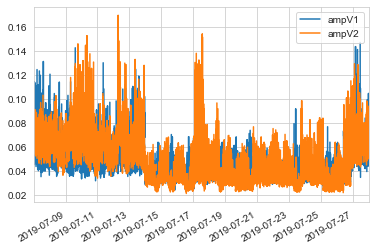

In [146]:
concatted.plot(y=['ampV1','ampV2'])

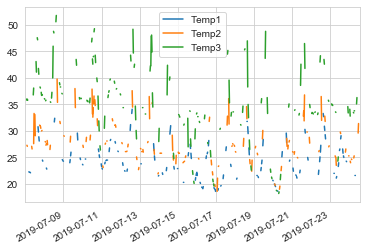

In [147]:
concatted[['Temp1','Temp2', 'Temp3']].dropna(how='all').plot()

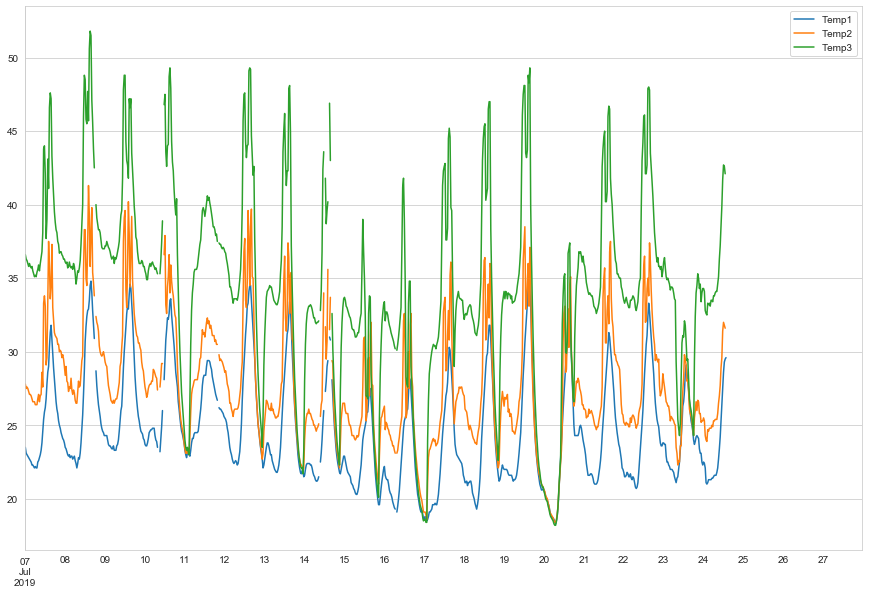

In [148]:
concatted[['Temp1','Temp2', 'Temp3']].resample('30Min').mean().plot(figsize=(15,10))

In [149]:
concatted.dtypes

Temp1     float64
Temp2     float64
Temp3     float64
ampV1     float64
ampV2     float64
ampV3     float64
freqV1    float64
freqV2    float64
freqV3    float64
dtype: object

---

###### Can also do this in a FOR loop

results = []

for V_num in ['1','2','3']:
    data_dict = rawr['V' + V_num]['data']
    
    ts = data_dict['ts']
    amp = data_dict['amp']
    freq = data_dict['freq']
    
    af  = np.vstack([amp, freq])
    
    V = pd.DataFrame(af.T, columns = ['amp'+V_num,'freq'+V_num], index=ts)

    results.append(V)
    
pd.concat(results, sort=True).sort_index().head(20)
pass

###### Can also do this as a function

def get_some_data(json_rawr, V_num):
    data_dict = json_rawr['V' + V_num]['data']
    
    ts = data_dict['ts']
    amp = data_dict['amp']
    freq = data_dict['freq']
    
    af  = np.vstack([amp, freq])
    
    V = pd.DataFrame(af.T, columns = ['amp'+V_num,'freq'+V_num], index=ts)
    
    return V

results = [get_some_data(rawr, i) for i in ['1','2','3']]

pd.concat(results, sort=True).sort_index().head(20)

---

###### To select by date range

In [150]:
# V1_df.loc['2019-07-07 00:33:55':'2019-07-07 02:33:58'] #select by date range

---

### How to group 5 peaks into one timestamp?

ampV1, freqV1 - first 5 timestamps are top 5 peaks, timestamps are the same

how to group or create new columns to create ampV1P1, freqV1P1, ampV1P2, freqV1P2 etc

In [151]:
grp =concatted.resample('30Min', convention = 'end')

In [152]:
for g in grp:
    break
g

(Timestamp('2019-07-07 00:00:00', freq='30T'),
                      Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
 2019-07-07 00:03:27   23.5    NaN    NaN      NaN      NaN      NaN     NaN   
 2019-07-07 00:03:27    NaN   27.8    NaN      NaN      NaN      NaN     NaN   
 2019-07-07 00:03:27    NaN    NaN   36.6      NaN      NaN      NaN     NaN   
 2019-07-07 00:03:56    NaN    NaN    NaN  0.06952      NaN      NaN   320.0   
 2019-07-07 00:03:56    NaN    NaN    NaN  0.07669      NaN      NaN    13.0   
 2019-07-07 00:03:56    NaN    NaN    NaN  0.07902      NaN      NaN     5.0   
 2019-07-07 00:03:56    NaN    NaN    NaN  0.08550      NaN      NaN    11.0   
 2019-07-07 00:03:56    NaN    NaN    NaN  0.10278      NaN      NaN   213.0   
 2019-07-07 00:04:22    NaN    NaN    NaN      NaN  0.06335      NaN     NaN   
 2019-07-07 00:04:22    NaN    NaN    NaN      NaN  0.07046      NaN     NaN   
 2019-07-07 00:04:22    NaN    NaN    NaN      NaN  0.07545      NaN     

In [153]:
def group_to_row(row):
    if len(row) <= 0:
        return
    
    df_list = []
    
    for v_num in ['1','2','3']: # break the V into 5 features(new columns) and put into one row
        av = row['ampV'+v_num].dropna().tolist()
        fr = row['freqV'+v_num].dropna().tolist()
        if len(av) == 0:
            continue
        v = av+fr
        print(row)
        av_names = ['amp' +i+ 'V'+v_num for i in ['1','2','3','4','5']] # new column names
        fr_names = ['freq' +i+ 'V'+v_num for i in ['1','2','3','4','5']]
        names = av_names + fr_names

        df = pd.DataFrame(np.array(v).reshape(1,10), columns=names)
        df_list.append(df)
    
    df_list.append(
        pd.DataFrame(np.array(row[['Temp1','Temp2','Temp3']].mean()).reshape(1,3), columns=['Temp1','Temp2','Temp3'])
    ) #append T data
    
    if len(df_list) != 0:
        result =  pd.concat(df_list, axis=1)        
        return result
        
    #pdb.set_trace() # dangerous
    #    return row.iloc[0]
        

In [154]:
raw_df  = concatted.groupby(pd.Grouper(freq='30 min', convention='end')).apply(group_to_row)
#can be slow

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-07 00:03:27   23.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-07 00:03:27    NaN   27.8    NaN      NaN      NaN      NaN     NaN   
2019-07-07 00:03:27    NaN    NaN   36.6      NaN      NaN      NaN     NaN   
2019-07-07 00:03:56    NaN    NaN    NaN  0.06952      NaN      NaN   320.0   
2019-07-07 00:03:56    NaN    NaN    NaN  0.07669      NaN      NaN    13.0   
2019-07-07 00:03:56    NaN    NaN    NaN  0.07902      NaN      NaN     5.0   
2019-07-07 00:03:56    NaN    NaN    NaN  0.08550      NaN      NaN    11.0   
2019-07-07 00:03:56    NaN    NaN    NaN  0.10278      NaN      NaN   213.0   
2019-07-07 00:04:22    NaN    NaN    NaN      NaN  0.06335      NaN     NaN   
2019-07-07 00:04:22    NaN    NaN    NaN      NaN  0.07046      NaN     NaN   
2019-07-07 00:04:22    NaN    NaN    NaN      NaN  0.07545      NaN     NaN   
2019-07-07 00:04:22    NaN    NaN    NaN      NaN  0

2019-07-07 01:34:53     NaN    30.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-07 01:33:29    NaN   27.5    NaN      NaN      NaN      NaN     NaN   
2019-07-07 01:33:29   22.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-07 01:33:29    NaN    NaN   36.0      NaN      NaN      NaN     NaN   
2019-07-07 01:33:55    NaN    NaN    NaN  0.05705      NaN      NaN     8.0   
2019-07-07 01:33:55    NaN    NaN    NaN  0.07041      NaN      NaN   213.0   
2019-07-07 01:33:55    NaN    NaN    NaN  0.07400      NaN      NaN    11.0   
2019-07-07 01:33:55    NaN    NaN    NaN  0.07732      NaN      NaN     5.0   
2019-07-07 01:33:55    NaN    NaN    NaN  0.10061      NaN      NaN    13.0   
2019-07-07 01:34:23    NaN    NaN    NaN      NaN  0.08133      NaN     NaN   
2019-07-07 01:34:23    NaN    NaN    NaN      NaN  0.07806      NaN     NaN   
2019-07-07 01:34:23    NaN    NaN    NaN      NaN  0.07475      NaN     NaN   
2019-07-07 01:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-07 04:03:28    NaN    NaN   35.8      NaN      NaN      NaN     NaN   
2019-07-07 04:03:28    NaN   26.8    NaN      NaN      NaN      NaN     NaN   
2019-07-07 04:03:28   22.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-07 04:03:58    NaN    NaN    NaN  0.04910      NaN      NaN   436.0   
2019-07-07 04:03:58    NaN    NaN    NaN  0.06697      NaN      NaN    11.0   
2019-07-07 04:03:58    NaN    NaN    NaN  0.08236      NaN      NaN    13.0   
2019-07-07 04:03:58    NaN    NaN    NaN  0.09169      NaN      NaN   213.0   
2019-07-07 04:03:58    NaN    NaN    NaN  0.05037      NaN      NaN     5.0   
2019-07-07 04:04:25    NaN    NaN    NaN      NaN  0.05678      NaN     NaN   
2019-07-07 04:04:25    NaN    NaN    NaN      NaN  0.06074      NaN     NaN   
2019-07-07 04:04:25    NaN    NaN    NaN      NaN  0.08860      NaN     NaN   
2019-07-07 04:04:25    NaN    NaN    NaN      NaN  0

2019-07-07 06:34:55     NaN    30.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-07 06:33:30   22.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-07 06:33:30    NaN   26.4    NaN      NaN      NaN      NaN     NaN   
2019-07-07 06:33:30    NaN    NaN   35.1      NaN      NaN      NaN     NaN   
2019-07-07 06:33:57    NaN    NaN    NaN  0.04520      NaN      NaN   438.0   
2019-07-07 06:33:57    NaN    NaN    NaN  0.08924      NaN      NaN    13.0   
2019-07-07 06:33:57    NaN    NaN    NaN  0.08935      NaN      NaN   213.0   
2019-07-07 06:33:57    NaN    NaN    NaN  0.09795      NaN      NaN    11.0   
2019-07-07 06:33:57    NaN    NaN    NaN  0.04658      NaN      NaN     5.0   
2019-07-07 06:34:25    NaN    NaN    NaN      NaN  0.07540      NaN     NaN   
2019-07-07 06:34:25    NaN    NaN    NaN      NaN  0.05911      NaN     NaN   
2019-07-07 06:34:25    NaN    NaN    NaN      NaN  0.06282      NaN     NaN   
2019-07-07 06:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-07 09:03:30   23.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-07 09:03:30    NaN   27.0    NaN      NaN      NaN      NaN     NaN   
2019-07-07 09:03:30    NaN    NaN   36.0      NaN      NaN      NaN     NaN   
2019-07-07 09:03:58    NaN    NaN    NaN  0.04518      NaN      NaN    16.0   
2019-07-07 09:03:58    NaN    NaN    NaN  0.10649      NaN      NaN   213.0   
2019-07-07 09:03:58    NaN    NaN    NaN  0.05249      NaN      NaN     9.0   
2019-07-07 09:03:58    NaN    NaN    NaN  0.10803      NaN      NaN    11.0   
2019-07-07 09:03:58    NaN    NaN    NaN  0.07889      NaN      NaN    13.0   
2019-07-07 09:04:26    NaN    NaN    NaN      NaN  0.09122      NaN     NaN   
2019-07-07 09:04:26    NaN    NaN    NaN      NaN  0.06525      NaN     NaN   
2019-07-07 09:04:26    NaN    NaN    NaN      NaN  0.06327      NaN     NaN   
2019-07-07 09:04:26    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-07 12:03:31    NaN    NaN   42.1      NaN      NaN      NaN     NaN   
2019-07-07 12:03:31   26.2    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-07 12:03:31    NaN   33.1    NaN      NaN      NaN      NaN     NaN   
2019-07-07 12:03:59    NaN    NaN    NaN  0.10483      NaN      NaN   213.0   
2019-07-07 12:03:59    NaN    NaN    NaN  0.08211      NaN      NaN    11.0   
2019-07-07 12:03:59    NaN    NaN    NaN  0.05434      NaN      NaN     9.0   
2019-07-07 12:03:59    NaN    NaN    NaN  0.06155      NaN      NaN   413.0   
2019-07-07 12:03:59    NaN    NaN    NaN  0.09319      NaN      NaN    13.0   
2019-07-07 12:04:27    NaN    NaN    NaN      NaN  0.07493      NaN     NaN   
2019-07-07 12:04:27    NaN    NaN    NaN      NaN  0.06435      NaN     NaN   
2019-07-07 12:04:27    NaN    NaN    NaN      NaN  0.05467      NaN     NaN   
2019-07-07 12:04:27    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-07 14:33:32    NaN   35.8    NaN      NaN      NaN      NaN     NaN   
2019-07-07 14:33:32    NaN    NaN   46.6      NaN      NaN      NaN     NaN   
2019-07-07 14:33:32   30.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-07 14:34:00    NaN    NaN    NaN  0.06259      NaN      NaN   534.0   
2019-07-07 14:34:00    NaN    NaN    NaN  0.08097      NaN      NaN    13.0   
2019-07-07 14:34:00    NaN    NaN    NaN  0.11426      NaN      NaN    11.0   
2019-07-07 14:34:00    NaN    NaN    NaN  0.13116      NaN      NaN   213.0   
2019-07-07 14:34:00    NaN    NaN    NaN  0.05153      NaN      NaN  1411.0   
2019-07-07 14:34:28    NaN    NaN    NaN      NaN  0.06524      NaN     NaN   
2019-07-07 14:34:28    NaN    NaN    NaN      NaN  0.06009      NaN     NaN   
2019-07-07 14:34:28    NaN    NaN    NaN      NaN  0.06882      NaN     NaN   
2019-07-07 14:34:28    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-07 17:03:33    NaN    NaN   40.7      NaN      NaN      NaN     NaN   
2019-07-07 17:03:33    NaN   32.1    NaN      NaN      NaN      NaN     NaN   
2019-07-07 17:03:33   28.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-07 17:04:01    NaN    NaN    NaN  0.09183      NaN      NaN    11.0   
2019-07-07 17:04:01    NaN    NaN    NaN  0.05272      NaN      NaN     5.0   
2019-07-07 17:04:01    NaN    NaN    NaN  0.03992      NaN      NaN     8.0   
2019-07-07 17:04:01    NaN    NaN    NaN  0.07938      NaN      NaN    13.0   
2019-07-07 17:04:01    NaN    NaN    NaN  0.08418      NaN      NaN   213.0   
2019-07-07 17:04:29    NaN    NaN    NaN      NaN  0.07162      NaN     NaN   
2019-07-07 17:04:29    NaN    NaN    NaN      NaN  0.07116      NaN     NaN   
2019-07-07 17:04:29    NaN    NaN    NaN      NaN  0.06957      NaN     NaN   
2019-07-07 17:04:29    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-07 19:33:34    NaN   30.5    NaN      NaN      NaN      NaN     NaN   
2019-07-07 19:33:34   25.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-07 19:33:34    NaN    NaN   37.5      NaN      NaN      NaN     NaN   
2019-07-07 19:34:04    NaN    NaN    NaN  0.05463      NaN      NaN   213.0   
2019-07-07 19:34:04    NaN    NaN    NaN  0.05429      NaN      NaN    16.0   
2019-07-07 19:34:04    NaN    NaN    NaN  0.05497      NaN      NaN     9.0   
2019-07-07 19:34:04    NaN    NaN    NaN  0.04868      NaN      NaN    11.0   
2019-07-07 19:34:04    NaN    NaN    NaN  0.05226      NaN      NaN     5.0   
2019-07-07 19:34:30    NaN    NaN    NaN      NaN  0.08437      NaN     NaN   
2019-07-07 19:34:30    NaN    NaN    NaN      NaN  0.04780      NaN     NaN   
2019-07-07 19:34:30    NaN    NaN    NaN      NaN  0.04876      NaN     NaN   
2019-07-07 19:34:30    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-07 22:33:36   24.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-07 22:33:36    NaN   29.8    NaN      NaN      NaN      NaN     NaN   
2019-07-07 22:33:36    NaN    NaN   36.5      NaN      NaN      NaN     NaN   
2019-07-07 22:34:04    NaN    NaN    NaN  0.07572      NaN      NaN   213.0   
2019-07-07 22:34:04    NaN    NaN    NaN  0.08048      NaN      NaN    13.0   
2019-07-07 22:34:04    NaN    NaN    NaN  0.04567      NaN      NaN     5.0   
2019-07-07 22:34:04    NaN    NaN    NaN  0.04116      NaN      NaN     5.0   
2019-07-07 22:34:04    NaN    NaN    NaN  0.08379      NaN      NaN    11.0   
2019-07-07 22:34:34    NaN    NaN    NaN      NaN  0.06969      NaN     NaN   
2019-07-07 22:34:34    NaN    NaN    NaN      NaN  0.05424      NaN     NaN   
2019-07-07 22:34:34    NaN    NaN    NaN      NaN  0.05802      NaN     NaN   
2019-07-07 22:34:34    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-08 01:03:37    NaN    NaN   36.1      NaN      NaN      NaN     NaN   
2019-07-08 01:03:37   23.2    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-08 01:03:37    NaN   28.0    NaN      NaN      NaN      NaN     NaN   
2019-07-08 01:04:06    NaN    NaN    NaN  0.06588      NaN      NaN    11.0   
2019-07-08 01:04:06    NaN    NaN    NaN  0.05945      NaN      NaN     5.0   
2019-07-08 01:04:06    NaN    NaN    NaN  0.05156      NaN      NaN   320.0   
2019-07-08 01:04:06    NaN    NaN    NaN  0.08877      NaN      NaN    13.0   
2019-07-08 01:04:06    NaN    NaN    NaN  0.08414      NaN      NaN   213.0   
2019-07-08 01:04:32    NaN    NaN    NaN      NaN  0.07294      NaN     NaN   
2019-07-08 01:04:32    NaN    NaN    NaN      NaN  0.07299      NaN     NaN   
2019-07-08 01:04:32    NaN    NaN    NaN      NaN  0.07486      NaN     NaN   
2019-07-08 01:04:32    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-08 03:33:37    NaN    NaN   35.7      NaN      NaN      NaN     NaN   
2019-07-08 03:33:37   22.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-08 03:33:37    NaN   28.2    NaN      NaN      NaN      NaN     NaN   
2019-07-08 03:34:05    NaN    NaN    NaN  0.04710      NaN      NaN     5.0   
2019-07-08 03:34:05    NaN    NaN    NaN  0.04993      NaN      NaN     5.0   
2019-07-08 03:34:05    NaN    NaN    NaN  0.05277      NaN      NaN    11.0   
2019-07-08 03:34:05    NaN    NaN    NaN  0.06876      NaN      NaN   213.0   
2019-07-08 03:34:05    NaN    NaN    NaN  0.08076      NaN      NaN    13.0   
2019-07-08 03:34:34    NaN    NaN    NaN      NaN  0.06391      NaN     NaN   
2019-07-08 03:34:34    NaN    NaN    NaN      NaN  0.08055      NaN     NaN   
2019-07-08 03:34:34    NaN    NaN    NaN      NaN  0.06587      NaN     NaN   
2019-07-08 03:34:34    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-08 06:33:39    NaN    NaN   34.6      NaN      NaN      NaN     NaN   
2019-07-08 06:33:39   22.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-08 06:33:39    NaN   26.5    NaN      NaN      NaN      NaN     NaN   
2019-07-08 06:34:07    NaN    NaN    NaN  0.08388      NaN      NaN    13.0   
2019-07-08 06:34:07    NaN    NaN    NaN  0.05818      NaN      NaN     5.0   
2019-07-08 06:34:07    NaN    NaN    NaN  0.07913      NaN      NaN    11.0   
2019-07-08 06:34:07    NaN    NaN    NaN  0.08108      NaN      NaN   213.0   
2019-07-08 06:34:07    NaN    NaN    NaN  0.05075      NaN      NaN     9.0   
2019-07-08 06:34:36    NaN    NaN    NaN      NaN  0.08705      NaN     NaN   
2019-07-08 06:34:36    NaN    NaN    NaN      NaN  0.06980      NaN     NaN   
2019-07-08 06:34:36    NaN    NaN    NaN      NaN  0.06852      NaN     NaN   
2019-07-08 06:34:36    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-08 09:03:40    NaN   27.7    NaN      NaN      NaN      NaN     NaN   
2019-07-08 09:03:40   23.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-08 09:03:40    NaN    NaN   36.2      NaN      NaN      NaN     NaN   
2019-07-08 09:04:09    NaN    NaN    NaN  0.09738      NaN      NaN   213.0   
2019-07-08 09:04:09    NaN    NaN    NaN  0.09588      NaN      NaN    13.0   
2019-07-08 09:04:09    NaN    NaN    NaN  0.04384      NaN      NaN   636.0   
2019-07-08 09:04:09    NaN    NaN    NaN  0.10085      NaN      NaN    11.0   
2019-07-08 09:04:09    NaN    NaN    NaN  0.04134      NaN      NaN   436.0   
2019-07-08 09:04:36    NaN    NaN    NaN      NaN  0.05978      NaN     NaN   
2019-07-08 09:04:36    NaN    NaN    NaN      NaN  0.06503      NaN     NaN   
2019-07-08 09:04:36    NaN    NaN    NaN      NaN  0.07397      NaN     NaN   
2019-07-08 09:04:36    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-08 12:03:42    NaN    NaN   48.5      NaN      NaN      NaN     NaN   
2019-07-08 12:03:42   30.7    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-08 12:03:42    NaN   38.3    NaN      NaN      NaN      NaN     NaN   
2019-07-08 12:04:09    NaN    NaN    NaN  0.04061      NaN      NaN   463.0   
2019-07-08 12:04:09    NaN    NaN    NaN  0.04651      NaN      NaN   100.0   
2019-07-08 12:04:09    NaN    NaN    NaN  0.05944      NaN      NaN    13.0   
2019-07-08 12:04:09    NaN    NaN    NaN  0.08360      NaN      NaN   213.0   
2019-07-08 12:04:09    NaN    NaN    NaN  0.06811      NaN      NaN    11.0   
2019-07-08 12:04:37    NaN    NaN    NaN      NaN  0.04358      NaN     NaN   
2019-07-08 12:04:37    NaN    NaN    NaN      NaN  0.05499      NaN     NaN   
2019-07-08 12:04:37    NaN    NaN    NaN      NaN  0.06105      NaN     NaN   
2019-07-08 12:04:37    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1  ampV2    ampV3  freqV1  \
2019-07-08 15:03:45    NaN    NaN   51.8      NaN    NaN      NaN     NaN   
2019-07-08 15:03:45   34.5    NaN    NaN      NaN    NaN      NaN     NaN   
2019-07-08 15:03:45    NaN   35.8    NaN      NaN    NaN      NaN     NaN   
2019-07-08 15:04:10    NaN    NaN    NaN  0.04497    NaN      NaN    16.0   
2019-07-08 15:04:10    NaN    NaN    NaN  0.04502    NaN      NaN     4.0   
2019-07-08 15:04:10    NaN    NaN    NaN  0.05146    NaN      NaN     9.0   
2019-07-08 15:04:10    NaN    NaN    NaN  0.05195    NaN      NaN    14.0   
2019-07-08 15:04:10    NaN    NaN    NaN  0.05864    NaN      NaN   534.0   
2019-07-08 15:05:07    NaN    NaN    NaN      NaN    NaN  0.11983     NaN   
2019-07-08 15:05:07    NaN    NaN    NaN      NaN    NaN  0.10326     NaN   
2019-07-08 15:05:07    NaN    NaN    NaN      NaN    NaN  0.09410     NaN   
2019-07-08 15:05:07    NaN    NaN    NaN      NaN    NaN  0.08711     NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-08 17:33:43   30.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-08 17:33:43    NaN   33.8    NaN      NaN      NaN      NaN     NaN   
2019-07-08 17:33:43    NaN    NaN   42.5      NaN      NaN      NaN     NaN   
2019-07-08 17:34:11    NaN    NaN    NaN  0.04254      NaN      NaN   534.0   
2019-07-08 17:34:11    NaN    NaN    NaN  0.05052      NaN      NaN     5.0   
2019-07-08 17:34:11    NaN    NaN    NaN  0.05747      NaN      NaN   213.0   
2019-07-08 17:34:11    NaN    NaN    NaN  0.06361      NaN      NaN    11.0   
2019-07-08 17:34:11    NaN    NaN    NaN  0.07675      NaN      NaN    13.0   
2019-07-08 17:34:42    NaN    NaN    NaN      NaN  0.04545      NaN     NaN   
2019-07-08 17:34:42    NaN    NaN    NaN      NaN  0.04809      NaN     NaN   
2019-07-08 17:34:42    NaN    NaN    NaN      NaN  0.08810      NaN     NaN   
2019-07-08 17:34:42    NaN    NaN    NaN      NaN  0

2019-07-08 20:04:42   534.0     NaN  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-08 20:33:44    NaN    NaN   38.3      NaN      NaN      NaN     NaN   
2019-07-08 20:33:44   26.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-08 20:33:44    NaN   30.4    NaN      NaN      NaN      NaN     NaN   
2019-07-08 20:34:14    NaN    NaN    NaN  0.04139      NaN      NaN    14.0   
2019-07-08 20:34:14    NaN    NaN    NaN  0.04060      NaN      NaN     0.0   
2019-07-08 20:34:14    NaN    NaN    NaN  0.04035      NaN      NaN     4.0   
2019-07-08 20:34:14    NaN    NaN    NaN  0.04005      NaN      NaN     9.0   
2019-07-08 20:34:14    NaN    NaN    NaN  0.04932      NaN      NaN     5.0   
2019-07-08 20:34:41    NaN    NaN    NaN      NaN  0.04751      NaN     NaN   
2019-07-08 20:34:41    NaN    NaN    NaN      NaN  0.04811      NaN     NaN   
2019-07-08 20:34:41    NaN    NaN    NaN      NaN  0.05338      NaN     NaN   
2019-07-08 20:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-08 23:03:48   24.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-08 23:03:48    NaN   30.0    NaN      NaN      NaN      NaN     NaN   
2019-07-08 23:03:48    NaN    NaN   37.0      NaN      NaN      NaN     NaN   
2019-07-08 23:04:15    NaN    NaN    NaN  0.05958      NaN      NaN    11.0   
2019-07-08 23:04:15    NaN    NaN    NaN  0.04923      NaN      NaN    13.0   
2019-07-08 23:04:15    NaN    NaN    NaN  0.04716      NaN      NaN     5.0   
2019-07-08 23:04:15    NaN    NaN    NaN  0.04673      NaN      NaN     5.0   
2019-07-08 23:04:15    NaN    NaN    NaN  0.04449      NaN      NaN   213.0   
2019-07-08 23:04:42    NaN    NaN    NaN      NaN  0.07145      NaN     NaN   
2019-07-08 23:04:42    NaN    NaN    NaN      NaN  0.06969      NaN     NaN   
2019-07-08 23:04:42    NaN    NaN    NaN      NaN  0.05775      NaN     NaN   
2019-07-08 23:04:42    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-09 01:33:46   24.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-09 01:33:46    NaN   28.3    NaN      NaN      NaN      NaN     NaN   
2019-07-09 01:33:46    NaN    NaN   37.3      NaN      NaN      NaN     NaN   
2019-07-09 01:34:14    NaN    NaN    NaN  0.07791      NaN      NaN    13.0   
2019-07-09 01:34:14    NaN    NaN    NaN  0.03936      NaN      NaN     1.0   
2019-07-09 01:34:14    NaN    NaN    NaN  0.04039      NaN      NaN    30.0   
2019-07-09 01:34:14    NaN    NaN    NaN  0.05793      NaN      NaN   213.0   
2019-07-09 01:34:14    NaN    NaN    NaN  0.08268      NaN      NaN    11.0   
2019-07-09 01:34:46    NaN    NaN    NaN      NaN  0.04689      NaN     NaN   
2019-07-09 01:34:46    NaN    NaN    NaN      NaN  0.04308      NaN     NaN   
2019-07-09 01:34:46    NaN    NaN    NaN      NaN  0.05256      NaN     NaN   
2019-07-09 01:34:46    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-09 04:03:47    NaN   26.6    NaN      NaN      NaN      NaN     NaN   
2019-07-09 04:03:47    NaN    NaN   36.3      NaN      NaN      NaN     NaN   
2019-07-09 04:03:47   23.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-09 04:04:18    NaN    NaN    NaN  0.08583      NaN      NaN    11.0   
2019-07-09 04:04:18    NaN    NaN    NaN  0.03840      NaN      NaN  1536.0   
2019-07-09 04:04:18    NaN    NaN    NaN  0.04438      NaN      NaN     5.0   
2019-07-09 04:04:18    NaN    NaN    NaN  0.06922      NaN      NaN    14.0   
2019-07-09 04:04:18    NaN    NaN    NaN  0.07440      NaN      NaN   214.0   
2019-07-09 04:04:45    NaN    NaN    NaN      NaN  0.08137      NaN     NaN   
2019-07-09 04:04:45    NaN    NaN    NaN      NaN  0.05514      NaN     NaN   
2019-07-09 04:04:45    NaN    NaN    NaN      NaN  0.04774      NaN     NaN   
2019-07-09 04:04:45    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-09 07:03:48   23.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-09 07:03:48    NaN   26.8    NaN      NaN      NaN      NaN     NaN   
2019-07-09 07:03:48    NaN    NaN   36.5      NaN      NaN      NaN     NaN   
2019-07-09 07:04:18    NaN    NaN    NaN  0.09485      NaN      NaN    14.0   
2019-07-09 07:04:18    NaN    NaN    NaN  0.09360      NaN      NaN    11.0   
2019-07-09 07:04:18    NaN    NaN    NaN  0.05476      NaN      NaN    36.0   
2019-07-09 07:04:18    NaN    NaN    NaN  0.09346      NaN      NaN   214.0   
2019-07-09 07:04:18    NaN    NaN    NaN  0.04697      NaN      NaN     5.0   
2019-07-09 07:04:45    NaN    NaN    NaN      NaN  0.06872      NaN     NaN   
2019-07-09 07:04:45    NaN    NaN    NaN      NaN  0.07009      NaN     NaN   
2019-07-09 07:04:45    NaN    NaN    NaN      NaN  0.07980      NaN     NaN   
2019-07-09 07:04:45    NaN    NaN    NaN      NaN  0

2019-07-09 09:35:13     NaN   534.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-09 10:03:51   26.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-09 10:03:51    NaN    NaN   39.6      NaN      NaN      NaN     NaN   
2019-07-09 10:03:51    NaN   30.3    NaN      NaN      NaN      NaN     NaN   
2019-07-09 10:04:21    NaN    NaN    NaN  0.06885      NaN      NaN    11.0   
2019-07-09 10:04:21    NaN    NaN    NaN  0.05235      NaN      NaN   214.0   
2019-07-09 10:04:21    NaN    NaN    NaN  0.04380      NaN      NaN    14.0   
2019-07-09 10:04:21    NaN    NaN    NaN  0.03706      NaN      NaN     5.0   
2019-07-09 10:04:21    NaN    NaN    NaN  0.03990      NaN      NaN     9.0   
2019-07-09 10:04:45    NaN    NaN    NaN      NaN  0.07410      NaN     NaN   
2019-07-09 10:04:45    NaN    NaN    NaN      NaN  0.05911      NaN     NaN   
2019-07-09 10:04:45    NaN    NaN    NaN      NaN  0.06996      NaN     NaN   
2019-07-09 10:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-09 12:33:52    NaN    NaN   44.3      NaN      NaN      NaN     NaN   
2019-07-09 12:33:52    NaN   34.2    NaN      NaN      NaN      NaN     NaN   
2019-07-09 12:33:52   31.7    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-09 12:34:21    NaN    NaN    NaN  0.08980      NaN      NaN    11.0   
2019-07-09 12:34:21    NaN    NaN    NaN  0.08238      NaN      NaN   214.0   
2019-07-09 12:34:21    NaN    NaN    NaN  0.07164      NaN      NaN    14.0   
2019-07-09 12:34:21    NaN    NaN    NaN  0.05540      NaN      NaN     4.0   
2019-07-09 12:34:21    NaN    NaN    NaN  0.04911      NaN      NaN   100.0   
2019-07-09 12:34:46    NaN    NaN    NaN      NaN  0.05057      NaN     NaN   
2019-07-09 12:34:46    NaN    NaN    NaN      NaN  0.05776      NaN     NaN   
2019-07-09 12:34:46    NaN    NaN    NaN      NaN  0.04700      NaN     NaN   
2019-07-09 12:34:46    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-09 14:33:52   33.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-09 14:33:52    NaN    NaN   47.2      NaN      NaN      NaN     NaN   
2019-07-09 14:33:52    NaN   38.0    NaN      NaN      NaN      NaN     NaN   
2019-07-09 14:34:20    NaN    NaN    NaN  0.05702      NaN      NaN   161.0   
2019-07-09 14:34:20    NaN    NaN    NaN  0.10142      NaN      NaN   213.0   
2019-07-09 14:34:20    NaN    NaN    NaN  0.12848      NaN      NaN    13.0   
2019-07-09 14:34:20    NaN    NaN    NaN  0.05701      NaN      NaN   211.0   
2019-07-09 14:34:20    NaN    NaN    NaN  0.14266      NaN      NaN    11.0   
2019-07-09 14:34:47    NaN    NaN    NaN      NaN  0.12957      NaN     NaN   
2019-07-09 14:34:47    NaN    NaN    NaN      NaN  0.12049      NaN     NaN   
2019-07-09 14:34:47    NaN    NaN    NaN      NaN  0.06975      NaN     NaN   
2019-07-09 14:34:47    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-09 17:03:52    NaN    NaN   41.2      NaN      NaN      NaN     NaN   
2019-07-09 17:03:52   30.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-09 17:03:52    NaN   33.8    NaN      NaN      NaN      NaN     NaN   
2019-07-09 17:04:20    NaN    NaN    NaN  0.09119      NaN      NaN   214.0   
2019-07-09 17:04:20    NaN    NaN    NaN  0.08784      NaN      NaN    14.0   
2019-07-09 17:04:20    NaN    NaN    NaN  0.07816      NaN      NaN    11.0   
2019-07-09 17:04:20    NaN    NaN    NaN  0.04947      NaN      NaN     9.0   
2019-07-09 17:04:20    NaN    NaN    NaN  0.04742      NaN      NaN    16.0   
2019-07-09 17:04:49    NaN    NaN    NaN      NaN  0.06297      NaN     NaN   
2019-07-09 17:04:49    NaN    NaN    NaN      NaN  0.10896      NaN     NaN   
2019-07-09 17:04:49    NaN    NaN    NaN      NaN  0.06546      NaN     NaN   
2019-07-09 17:04:49    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2  ampV3  freqV1  \
2019-07-09 20:03:53    NaN   30.6    NaN      NaN      NaN    NaN     NaN   
2019-07-09 20:03:53   25.6    NaN    NaN      NaN      NaN    NaN     NaN   
2019-07-09 20:03:53    NaN    NaN   36.3      NaN      NaN    NaN     NaN   
2019-07-09 20:04:24    NaN    NaN    NaN  0.07170      NaN    NaN     5.0   
2019-07-09 20:04:24    NaN    NaN    NaN  0.06310      NaN    NaN   320.0   
2019-07-09 20:04:24    NaN    NaN    NaN  0.05244      NaN    NaN    13.0   
2019-07-09 20:04:24    NaN    NaN    NaN  0.05238      NaN    NaN    11.0   
2019-07-09 20:04:24    NaN    NaN    NaN  0.05058      NaN    NaN   213.0   
2019-07-09 20:04:51    NaN    NaN    NaN      NaN  0.07139    NaN     NaN   
2019-07-09 20:04:51    NaN    NaN    NaN      NaN  0.05128    NaN     NaN   
2019-07-09 20:04:51    NaN    NaN    NaN      NaN  0.11898    NaN     NaN   
2019-07-09 20:04:51    NaN    NaN    NaN      NaN  0.05282    NaN     NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-09 23:03:56   24.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-09 23:03:56    NaN    NaN   35.8      NaN      NaN      NaN     NaN   
2019-07-09 23:03:56    NaN   28.7    NaN      NaN      NaN      NaN     NaN   
2019-07-09 23:04:24    NaN    NaN    NaN  0.06807      NaN      NaN    13.0   
2019-07-09 23:04:24    NaN    NaN    NaN  0.05142      NaN      NaN    16.0   
2019-07-09 23:04:24    NaN    NaN    NaN  0.04382      NaN      NaN    11.0   
2019-07-09 23:04:24    NaN    NaN    NaN  0.08473      NaN      NaN   213.0   
2019-07-09 23:04:24    NaN    NaN    NaN  0.04313      NaN      NaN     9.0   
2019-07-09 23:04:52    NaN    NaN    NaN      NaN  0.04701      NaN     NaN   
2019-07-09 23:04:52    NaN    NaN    NaN      NaN  0.04833      NaN     NaN   
2019-07-09 23:04:52    NaN    NaN    NaN      NaN  0.05986      NaN     NaN   
2019-07-09 23:04:52    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-10 01:33:57    NaN   27.1    NaN      NaN      NaN      NaN     NaN   
2019-07-10 01:33:57    NaN    NaN   34.9      NaN      NaN      NaN     NaN   
2019-07-10 01:33:57   23.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-10 01:34:24    NaN    NaN    NaN  0.06734      NaN      NaN    11.0   
2019-07-10 01:34:24    NaN    NaN    NaN  0.04717      NaN      NaN    16.0   
2019-07-10 01:34:24    NaN    NaN    NaN  0.07508      NaN      NaN   213.0   
2019-07-10 01:34:24    NaN    NaN    NaN  0.04152      NaN      NaN     5.0   
2019-07-10 01:34:24    NaN    NaN    NaN  0.07741      NaN      NaN    13.0   
2019-07-10 01:34:56    NaN    NaN    NaN      NaN  0.05580      NaN     NaN   
2019-07-10 01:34:56    NaN    NaN    NaN      NaN  0.07142      NaN     NaN   
2019-07-10 01:34:56    NaN    NaN    NaN      NaN  0.07765      NaN     NaN   
2019-07-10 01:34:56    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-10 04:03:58   24.7    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-10 04:03:58    NaN    NaN   36.0      NaN      NaN      NaN     NaN   
2019-07-10 04:03:58    NaN   28.0    NaN      NaN      NaN      NaN     NaN   
2019-07-10 04:04:28    NaN    NaN    NaN  0.04172      NaN      NaN     5.0   
2019-07-10 04:04:28    NaN    NaN    NaN  0.04979      NaN      NaN     9.0   
2019-07-10 04:04:28    NaN    NaN    NaN  0.07468      NaN      NaN   213.0   
2019-07-10 04:04:28    NaN    NaN    NaN  0.08369      NaN      NaN    13.0   
2019-07-10 04:04:28    NaN    NaN    NaN  0.08856      NaN      NaN    11.0   
2019-07-10 04:04:53    NaN    NaN    NaN      NaN  0.07592      NaN     NaN   
2019-07-10 04:04:53    NaN    NaN    NaN      NaN  0.05958      NaN     NaN   
2019-07-10 04:04:53    NaN    NaN    NaN      NaN  0.05452      NaN     NaN   
2019-07-10 04:04:53    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-10 07:03:59    NaN    NaN   35.5      NaN      NaN      NaN     NaN   
2019-07-10 07:03:59    NaN   28.2    NaN      NaN      NaN      NaN     NaN   
2019-07-10 07:03:59   23.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-10 07:04:29    NaN    NaN    NaN  0.05566      NaN      NaN    13.0   
2019-07-10 07:04:29    NaN    NaN    NaN  0.05979      NaN      NaN   213.0   
2019-07-10 07:04:29    NaN    NaN    NaN  0.05733      NaN      NaN    11.0   
2019-07-10 07:04:29    NaN    NaN    NaN  0.04373      NaN      NaN     5.0   
2019-07-10 07:04:29    NaN    NaN    NaN  0.04487      NaN      NaN     6.0   
2019-07-10 07:04:55    NaN    NaN    NaN      NaN  0.05696      NaN     NaN   
2019-07-10 07:04:55    NaN    NaN    NaN      NaN  0.04661      NaN     NaN   
2019-07-10 07:04:55    NaN    NaN    NaN      NaN  0.04709      NaN     NaN   
2019-07-10 07:04:55    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-10 10:04:01    NaN   29.2    NaN      NaN      NaN      NaN     NaN   
2019-07-10 10:04:01    NaN    NaN   37.4      NaN      NaN      NaN     NaN   
2019-07-10 10:04:01   24.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-10 10:04:28    NaN    NaN    NaN  0.03854      NaN      NaN    14.0   
2019-07-10 10:04:28    NaN    NaN    NaN  0.03796      NaN      NaN    16.0   
2019-07-10 10:04:28    NaN    NaN    NaN  0.05006      NaN      NaN     9.0   
2019-07-10 10:04:28    NaN    NaN    NaN  0.04154      NaN      NaN    11.0   
2019-07-10 10:04:28    NaN    NaN    NaN  0.03964      NaN      NaN   214.0   
2019-07-10 10:04:57    NaN    NaN    NaN      NaN  0.08976      NaN     NaN   
2019-07-10 10:04:57    NaN    NaN    NaN      NaN  0.06117      NaN     NaN   
2019-07-10 10:04:57    NaN    NaN    NaN      NaN  0.06288      NaN     NaN   
2019-07-10 10:04:57    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-10 12:34:05    NaN   33.2    NaN      NaN      NaN      NaN     NaN   
2019-07-10 12:34:05   30.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-10 12:34:05    NaN    NaN   43.6      NaN      NaN      NaN     NaN   
2019-07-10 12:34:30    NaN    NaN    NaN  0.05420      NaN      NaN    11.0   
2019-07-10 12:34:30    NaN    NaN    NaN  0.04551      NaN      NaN   100.0   
2019-07-10 12:34:30    NaN    NaN    NaN  0.06732      NaN      NaN     5.0   
2019-07-10 12:34:30    NaN    NaN    NaN  0.04664      NaN      NaN   320.0   
2019-07-10 12:34:30    NaN    NaN    NaN  0.05712      NaN      NaN   214.0   
2019-07-10 12:34:56    NaN    NaN    NaN      NaN  0.07277      NaN     NaN   
2019-07-10 12:34:56    NaN    NaN    NaN      NaN  0.06652      NaN     NaN   
2019-07-10 12:34:56    NaN    NaN    NaN      NaN  0.04006      NaN     NaN   
2019-07-10 12:34:56    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-10 15:04:01    NaN    NaN   49.3      NaN      NaN      NaN     NaN   
2019-07-10 15:04:01   33.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-10 15:04:01    NaN   34.0    NaN      NaN      NaN      NaN     NaN   
2019-07-10 15:04:28    NaN    NaN    NaN  0.04248      NaN      NaN    11.0   
2019-07-10 15:04:28    NaN    NaN    NaN  0.04116      NaN      NaN     8.0   
2019-07-10 15:04:28    NaN    NaN    NaN  0.05086      NaN      NaN     9.0   
2019-07-10 15:04:28    NaN    NaN    NaN  0.05382      NaN      NaN    16.0   
2019-07-10 15:04:28    NaN    NaN    NaN  0.04616      NaN      NaN   214.0   
2019-07-10 15:04:58    NaN    NaN    NaN      NaN  0.08087      NaN     NaN   
2019-07-10 15:04:58    NaN    NaN    NaN      NaN  0.05691      NaN     NaN   
2019-07-10 15:04:58    NaN    NaN    NaN      NaN  0.05544      NaN     NaN   
2019-07-10 15:04:58    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-10 18:04:02    NaN   32.5    NaN      NaN      NaN      NaN     NaN   
2019-07-10 18:04:02   29.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-10 18:04:02    NaN    NaN   40.0      NaN      NaN      NaN     NaN   
2019-07-10 18:04:30    NaN    NaN    NaN  0.06521      NaN      NaN     4.0   
2019-07-10 18:04:30    NaN    NaN    NaN  0.08417      NaN      NaN    14.0   
2019-07-10 18:04:30    NaN    NaN    NaN  0.04982      NaN      NaN   214.0   
2019-07-10 18:04:30    NaN    NaN    NaN  0.06474      NaN      NaN    11.0   
2019-07-10 18:04:30    NaN    NaN    NaN  0.05716      NaN      NaN    16.0   
2019-07-10 18:04:59    NaN    NaN    NaN      NaN  0.05598      NaN     NaN   
2019-07-10 18:04:59    NaN    NaN    NaN      NaN  0.05247      NaN     NaN   
2019-07-10 18:04:59    NaN    NaN    NaN      NaN  0.06474      NaN     NaN   
2019-07-10 18:04:59    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-10 20:34:03   26.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-10 20:34:03    NaN   26.8    NaN      NaN      NaN      NaN     NaN   
2019-07-10 20:34:03    NaN    NaN   31.9      NaN      NaN      NaN     NaN   
2019-07-10 20:34:31    NaN    NaN    NaN  0.04085      NaN      NaN     9.0   
2019-07-10 20:34:31    NaN    NaN    NaN  0.03765      NaN      NaN   534.0   
2019-07-10 20:34:31    NaN    NaN    NaN  0.06365      NaN      NaN    11.0   
2019-07-10 20:34:31    NaN    NaN    NaN  0.05513      NaN      NaN    14.0   
2019-07-10 20:34:31    NaN    NaN    NaN  0.04687      NaN      NaN   214.0   
2019-07-10 20:34:59    NaN    NaN    NaN      NaN  0.04218      NaN     NaN   
2019-07-10 20:34:59    NaN    NaN    NaN      NaN  0.05313      NaN     NaN   
2019-07-10 20:34:59    NaN    NaN    NaN      NaN  0.05784      NaN     NaN   
2019-07-10 20:34:59    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-10 23:04:04    NaN   24.4    NaN      NaN      NaN      NaN     NaN   
2019-07-10 23:04:04    NaN    NaN   25.7      NaN      NaN      NaN     NaN   
2019-07-10 23:04:04   24.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-10 23:04:32    NaN    NaN    NaN  0.04501      NaN      NaN     9.0   
2019-07-10 23:04:32    NaN    NaN    NaN  0.05095      NaN      NaN    14.0   
2019-07-10 23:04:32    NaN    NaN    NaN  0.08564      NaN      NaN   214.0   
2019-07-10 23:04:32    NaN    NaN    NaN  0.07439      NaN      NaN    11.0   
2019-07-10 23:04:32    NaN    NaN    NaN  0.04798      NaN      NaN   534.0   
2019-07-10 23:05:00    NaN    NaN    NaN      NaN  0.04182      NaN     NaN   
2019-07-10 23:05:00    NaN    NaN    NaN      NaN  0.04688      NaN     NaN   
2019-07-10 23:05:00    NaN    NaN    NaN      NaN  0.05165      NaN     NaN   
2019-07-10 23:05:00    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-11 02:04:05    NaN   23.1    NaN      NaN      NaN      NaN     NaN   
2019-07-11 02:04:05   23.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-11 02:04:05    NaN    NaN   23.2      NaN      NaN      NaN     NaN   
2019-07-11 02:04:33    NaN    NaN    NaN  0.04210      NaN      NaN     9.0   
2019-07-11 02:04:33    NaN    NaN    NaN  0.05778      NaN      NaN   534.0   
2019-07-11 02:04:33    NaN    NaN    NaN  0.08547      NaN      NaN   214.0   
2019-07-11 02:04:33    NaN    NaN    NaN  0.09250      NaN      NaN    11.0   
2019-07-11 02:04:33    NaN    NaN    NaN  0.07581      NaN      NaN    14.0   
2019-07-11 02:05:01    NaN    NaN    NaN      NaN  0.06618      NaN     NaN   
2019-07-11 02:05:01    NaN    NaN    NaN      NaN  0.06507      NaN     NaN   
2019-07-11 02:05:01    NaN    NaN    NaN      NaN  0.04214      NaN     NaN   
2019-07-11 02:05:01    NaN    NaN    NaN      NaN  0

2019-07-11 04:05:32     NaN    30.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-11 04:34:06   24.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-11 04:34:06    NaN    NaN   34.0      NaN      NaN      NaN     NaN   
2019-07-11 04:34:06    NaN   27.5    NaN      NaN      NaN      NaN     NaN   
2019-07-11 04:34:34    NaN    NaN    NaN  0.03526      NaN      NaN     0.0   
2019-07-11 04:34:34    NaN    NaN    NaN  0.06112      NaN      NaN    14.0   
2019-07-11 04:34:34    NaN    NaN    NaN  0.06375      NaN      NaN   214.0   
2019-07-11 04:34:34    NaN    NaN    NaN  0.07963      NaN      NaN    11.0   
2019-07-11 04:34:34    NaN    NaN    NaN  0.03399      NaN      NaN     5.0   
2019-07-11 04:35:02    NaN    NaN    NaN      NaN  0.06721      NaN     NaN   
2019-07-11 04:35:02    NaN    NaN    NaN      NaN  0.05570      NaN     NaN   
2019-07-11 04:35:02    NaN    NaN    NaN      NaN  0.05482      NaN     NaN   
2019-07-11 04:

2019-07-11 06:35:33     NaN     9.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-11 07:04:07    NaN   28.1    NaN      NaN      NaN      NaN     NaN   
2019-07-11 07:04:07    NaN    NaN   35.6      NaN      NaN      NaN     NaN   
2019-07-11 07:04:07   24.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-11 07:04:35    NaN    NaN    NaN  0.07107      NaN      NaN   213.0   
2019-07-11 07:04:35    NaN    NaN    NaN  0.06995      NaN      NaN    13.0   
2019-07-11 07:04:35    NaN    NaN    NaN  0.03768      NaN      NaN   461.0   
2019-07-11 07:04:35    NaN    NaN    NaN  0.04380      NaN      NaN     9.0   
2019-07-11 07:04:35    NaN    NaN    NaN  0.07159      NaN      NaN    11.0   
2019-07-11 07:05:03    NaN    NaN    NaN      NaN  0.06838      NaN     NaN   
2019-07-11 07:05:03    NaN    NaN    NaN      NaN  0.05029      NaN     NaN   
2019-07-11 07:05:03    NaN    NaN    NaN      NaN  0.04841      NaN     NaN   
2019-07-11 07:

2019-07-11 09:05:31     NaN     5.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-11 09:04:08   25.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-11 09:04:08    NaN   29.5    NaN      NaN      NaN      NaN     NaN   
2019-07-11 09:04:08    NaN    NaN   37.3      NaN      NaN      NaN     NaN   
2019-07-11 09:04:36    NaN    NaN    NaN  0.04020      NaN      NaN     9.0   
2019-07-11 09:04:36    NaN    NaN    NaN  0.03974      NaN      NaN     8.0   
2019-07-11 09:04:36    NaN    NaN    NaN  0.07929      NaN      NaN    14.0   
2019-07-11 09:04:36    NaN    NaN    NaN  0.07654      NaN      NaN   214.0   
2019-07-11 09:04:36    NaN    NaN    NaN  0.08104      NaN      NaN    11.0   
2019-07-11 09:05:05    NaN    NaN    NaN      NaN  0.08059      NaN     NaN   
2019-07-11 09:05:05    NaN    NaN    NaN      NaN  0.05796      NaN     NaN   
2019-07-11 09:05:05    NaN    NaN    NaN      NaN  0.05900      NaN     NaN   
2019-07-11 09:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-11 11:34:09   28.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-11 11:34:09    NaN    NaN   39.6      NaN      NaN      NaN     NaN   
2019-07-11 11:34:09    NaN   31.3    NaN      NaN      NaN      NaN     NaN   
2019-07-11 11:34:36    NaN    NaN    NaN  0.05176      NaN      NaN     4.0   
2019-07-11 11:34:36    NaN    NaN    NaN  0.07285      NaN      NaN    11.0   
2019-07-11 11:34:36    NaN    NaN    NaN  0.06813      NaN      NaN    14.0   
2019-07-11 11:34:36    NaN    NaN    NaN  0.04821      NaN      NaN     9.0   
2019-07-11 11:34:36    NaN    NaN    NaN  0.04764      NaN      NaN   214.0   
2019-07-11 11:35:04    NaN    NaN    NaN      NaN  0.05322      NaN     NaN   
2019-07-11 11:35:04    NaN    NaN    NaN      NaN  0.05686      NaN     NaN   
2019-07-11 11:35:04    NaN    NaN    NaN      NaN  0.05720      NaN     NaN   
2019-07-11 11:35:04    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-11 14:04:10    NaN   31.9    NaN      NaN      NaN      NaN     NaN   
2019-07-11 14:04:10    NaN    NaN   40.3      NaN      NaN      NaN     NaN   
2019-07-11 14:04:10   29.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-11 14:04:37    NaN    NaN    NaN  0.05676      NaN      NaN     4.0   
2019-07-11 14:04:37    NaN    NaN    NaN  0.05266      NaN      NaN   214.0   
2019-07-11 14:04:37    NaN    NaN    NaN  0.04486      NaN      NaN    20.0   
2019-07-11 14:04:37    NaN    NaN    NaN  0.07253      NaN      NaN    14.0   
2019-07-11 14:04:37    NaN    NaN    NaN  0.07629      NaN      NaN    11.0   
2019-07-11 14:05:05    NaN    NaN    NaN      NaN  0.06379      NaN     NaN   
2019-07-11 14:05:05    NaN    NaN    NaN      NaN  0.05501      NaN     NaN   
2019-07-11 14:05:05    NaN    NaN    NaN      NaN  0.06243      NaN     NaN   
2019-07-11 14:05:05    NaN    NaN    NaN      NaN  0

2019-07-11 16:35:34     NaN    20.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-11 16:34:11    NaN    NaN   39.0      NaN      NaN      NaN     NaN   
2019-07-11 16:34:11   28.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-11 16:34:11    NaN   31.1    NaN      NaN      NaN      NaN     NaN   
2019-07-11 16:34:38    NaN    NaN    NaN  0.06306      NaN      NaN    14.0   
2019-07-11 16:34:38    NaN    NaN    NaN  0.06600      NaN      NaN    11.0   
2019-07-11 16:34:38    NaN    NaN    NaN  0.04883      NaN      NaN     1.0   
2019-07-11 16:34:38    NaN    NaN    NaN  0.07279      NaN      NaN   214.0   
2019-07-11 16:34:38    NaN    NaN    NaN  0.05098      NaN      NaN     4.0   
2019-07-11 16:35:06    NaN    NaN    NaN      NaN  0.04762      NaN     NaN   
2019-07-11 16:35:06    NaN    NaN    NaN      NaN  0.06953      NaN     NaN   
2019-07-11 16:35:06    NaN    NaN    NaN      NaN  0.05358      NaN     NaN   
2019-07-11 16:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-11 19:04:11    NaN    NaN   38.0      NaN      NaN      NaN     NaN   
2019-07-11 19:04:11   26.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-11 19:04:11    NaN   30.5    NaN      NaN      NaN      NaN     NaN   
2019-07-11 19:04:39    NaN    NaN    NaN  0.07021      NaN      NaN   214.0   
2019-07-11 19:04:39    NaN    NaN    NaN  0.06186      NaN      NaN    11.0   
2019-07-11 19:04:39    NaN    NaN    NaN  0.05979      NaN      NaN    14.0   
2019-07-11 19:04:39    NaN    NaN    NaN  0.04665      NaN      NaN     1.0   
2019-07-11 19:04:39    NaN    NaN    NaN  0.04105      NaN      NaN     0.0   
2019-07-11 19:05:07    NaN    NaN    NaN      NaN  0.04688      NaN     NaN   
2019-07-11 19:05:07    NaN    NaN    NaN      NaN  0.07365      NaN     NaN   
2019-07-11 19:05:07    NaN    NaN    NaN      NaN  0.04538      NaN     NaN   
2019-07-11 19:05:07    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-11 22:04:13   26.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-11 22:04:13    NaN    NaN   37.1      NaN      NaN      NaN     NaN   
2019-07-11 22:04:13    NaN   29.4    NaN      NaN      NaN      NaN     NaN   
2019-07-11 22:04:41    NaN    NaN    NaN  0.06347      NaN      NaN    11.0   
2019-07-11 22:04:41    NaN    NaN    NaN  0.05025      NaN      NaN    14.0   
2019-07-11 22:04:41    NaN    NaN    NaN  0.03866      NaN      NaN     1.0   
2019-07-11 22:04:41    NaN    NaN    NaN  0.03673      NaN      NaN     5.0   
2019-07-11 22:04:41    NaN    NaN    NaN  0.05771      NaN      NaN   214.0   
2019-07-11 22:05:09    NaN    NaN    NaN      NaN  0.04813      NaN     NaN   
2019-07-11 22:05:09    NaN    NaN    NaN      NaN  0.06329      NaN     NaN   
2019-07-11 22:05:09    NaN    NaN    NaN      NaN  0.05496      NaN     NaN   
2019-07-11 22:05:09    NaN    NaN    NaN      NaN  0

2019-07-12 00:35:37     NaN    20.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-12 00:34:14   25.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-12 00:34:14    NaN    NaN   36.7      NaN      NaN      NaN     NaN   
2019-07-12 00:34:14    NaN   28.7    NaN      NaN      NaN      NaN     NaN   
2019-07-12 00:34:42    NaN    NaN    NaN  0.03920      NaN      NaN     5.0   
2019-07-12 00:34:42    NaN    NaN    NaN  0.05155      NaN      NaN    11.0   
2019-07-12 00:34:42    NaN    NaN    NaN  0.04405      NaN      NaN     0.0   
2019-07-12 00:34:42    NaN    NaN    NaN  0.05931      NaN      NaN    14.0   
2019-07-12 00:34:42    NaN    NaN    NaN  0.04288      NaN      NaN     1.0   
2019-07-12 00:35:09    NaN    NaN    NaN      NaN  0.05525      NaN     NaN   
2019-07-12 00:35:09    NaN    NaN    NaN      NaN  0.04232      NaN     NaN   
2019-07-12 00:35:09    NaN    NaN    NaN      NaN  0.04693      NaN     NaN   
2019-07-12 00:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-12 03:04:17   23.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-12 03:04:17    NaN   26.5    NaN      NaN      NaN      NaN     NaN   
2019-07-12 03:04:17    NaN    NaN   34.4      NaN      NaN      NaN     NaN   
2019-07-12 03:04:42    NaN    NaN    NaN  0.05506      NaN      NaN    11.0   
2019-07-12 03:04:42    NaN    NaN    NaN  0.05336      NaN      NaN   534.0   
2019-07-12 03:04:42    NaN    NaN    NaN  0.04350      NaN      NaN     9.0   
2019-07-12 03:04:42    NaN    NaN    NaN  0.05758      NaN      NaN    14.0   
2019-07-12 03:04:42    NaN    NaN    NaN  0.05582      NaN      NaN   214.0   
2019-07-12 03:05:10    NaN    NaN    NaN      NaN  0.05507      NaN     NaN   
2019-07-12 03:05:10    NaN    NaN    NaN      NaN  0.05725      NaN     NaN   
2019-07-12 03:05:10    NaN    NaN    NaN      NaN  0.05407      NaN     NaN   
2019-07-12 03:05:10    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-12 06:04:16    NaN    NaN   33.6      NaN      NaN      NaN     NaN   
2019-07-12 06:04:16   22.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-12 06:04:16    NaN   26.1    NaN      NaN      NaN      NaN     NaN   
2019-07-12 06:04:44    NaN    NaN    NaN  0.04051      NaN      NaN     5.0   
2019-07-12 06:04:44    NaN    NaN    NaN  0.04478      NaN      NaN   534.0   
2019-07-12 06:04:44    NaN    NaN    NaN  0.06714      NaN      NaN    14.0   
2019-07-12 06:04:44    NaN    NaN    NaN  0.07854      NaN      NaN    11.0   
2019-07-12 06:04:44    NaN    NaN    NaN  0.07399      NaN      NaN   214.0   
2019-07-12 06:05:14    NaN    NaN    NaN      NaN  0.06733      NaN     NaN   
2019-07-12 06:05:14    NaN    NaN    NaN      NaN  0.07018      NaN     NaN   
2019-07-12 06:05:14    NaN    NaN    NaN      NaN  0.05862      NaN     NaN   
2019-07-12 06:05:14    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-12 08:34:17   22.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-12 08:34:17    NaN    NaN   34.3      NaN      NaN      NaN     NaN   
2019-07-12 08:34:17    NaN   26.5    NaN      NaN      NaN      NaN     NaN   
2019-07-12 08:34:45    NaN    NaN    NaN  0.06350      NaN      NaN    16.0   
2019-07-12 08:34:45    NaN    NaN    NaN  0.07170      NaN      NaN    14.0   
2019-07-12 08:34:45    NaN    NaN    NaN  0.07888      NaN      NaN   214.0   
2019-07-12 08:34:45    NaN    NaN    NaN  0.08377      NaN      NaN    11.0   
2019-07-12 08:34:45    NaN    NaN    NaN  0.05300      NaN      NaN     8.0   
2019-07-12 08:35:13    NaN    NaN    NaN      NaN  0.10984      NaN     NaN   
2019-07-12 08:35:13    NaN    NaN    NaN      NaN  0.07851      NaN     NaN   
2019-07-12 08:35:13    NaN    NaN    NaN      NaN  0.08780      NaN     NaN   
2019-07-12 08:35:13    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-12 11:04:18   28.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-12 11:04:18    NaN   33.5    NaN      NaN      NaN      NaN     NaN   
2019-07-12 11:04:18    NaN    NaN   45.7      NaN      NaN      NaN     NaN   
2019-07-12 11:04:46    NaN    NaN    NaN  0.04553      NaN      NaN    13.0   
2019-07-12 11:04:46    NaN    NaN    NaN  0.04153      NaN      NaN    11.0   
2019-07-12 11:04:46    NaN    NaN    NaN  0.03980      NaN      NaN   100.0   
2019-07-12 11:04:46    NaN    NaN    NaN  0.04749      NaN      NaN   213.0   
2019-07-12 11:04:46    NaN    NaN    NaN  0.05640      NaN      NaN     8.0   
2019-07-12 11:05:13    NaN    NaN    NaN      NaN  0.06063      NaN     NaN   
2019-07-12 11:05:13    NaN    NaN    NaN      NaN  0.06396      NaN     NaN   
2019-07-12 11:05:13    NaN    NaN    NaN      NaN  0.07009      NaN     NaN   
2019-07-12 11:05:13    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1  ampV2    ampV3  freqV1  \
2019-07-12 14:04:19    NaN    NaN   44.1      NaN    NaN      NaN     NaN   
2019-07-12 14:04:19    NaN   39.6    NaN      NaN    NaN      NaN     NaN   
2019-07-12 14:04:19   33.3    NaN    NaN      NaN    NaN      NaN     NaN   
2019-07-12 14:04:49    NaN    NaN    NaN  0.10823    NaN      NaN   214.0   
2019-07-12 14:04:49    NaN    NaN    NaN  0.07834    NaN      NaN    14.0   
2019-07-12 14:04:49    NaN    NaN    NaN  0.07668    NaN      NaN    11.0   
2019-07-12 14:04:49    NaN    NaN    NaN  0.06147    NaN      NaN     4.0   
2019-07-12 14:04:49    NaN    NaN    NaN  0.05679    NaN      NaN   534.0   
2019-07-12 14:05:44    NaN    NaN    NaN      NaN    NaN  0.07727     NaN   
2019-07-12 14:05:44    NaN    NaN    NaN      NaN    NaN  0.08240     NaN   
2019-07-12 14:05:44    NaN    NaN    NaN      NaN    NaN  0.08513     NaN   
2019-07-12 14:05:44    NaN    NaN    NaN      NaN    NaN  0.10073     NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-12 16:34:20    NaN    NaN   43.3      NaN      NaN      NaN     NaN   
2019-07-12 16:34:20   32.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-12 16:34:20    NaN   35.1    NaN      NaN      NaN      NaN     NaN   
2019-07-12 16:34:48    NaN    NaN    NaN  0.04646      NaN      NaN     9.0   
2019-07-12 16:34:48    NaN    NaN    NaN  0.04388      NaN      NaN    14.0   
2019-07-12 16:34:48    NaN    NaN    NaN  0.04472      NaN      NaN    11.0   
2019-07-12 16:34:48    NaN    NaN    NaN  0.04628      NaN      NaN   534.0   
2019-07-12 16:34:48    NaN    NaN    NaN  0.05078      NaN      NaN     8.0   
2019-07-12 16:35:16    NaN    NaN    NaN      NaN  0.04620      NaN     NaN   
2019-07-12 16:35:16    NaN    NaN    NaN      NaN  0.05386      NaN     NaN   
2019-07-12 16:35:16    NaN    NaN    NaN      NaN  0.05450      NaN     NaN   
2019-07-12 16:35:16    NaN    NaN    NaN      NaN  0

2019-07-12 19:05:45     NaN     7.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-12 19:04:21    NaN    NaN   32.1      NaN      NaN      NaN     NaN   
2019-07-12 19:04:21    NaN   27.0    NaN      NaN      NaN      NaN     NaN   
2019-07-12 19:04:21   26.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-12 19:04:49    NaN    NaN    NaN  0.07664      NaN      NaN    11.0   
2019-07-12 19:04:49    NaN    NaN    NaN  0.06874      NaN      NaN    14.0   
2019-07-12 19:04:49    NaN    NaN    NaN  0.05721      NaN      NaN     4.0   
2019-07-12 19:04:49    NaN    NaN    NaN  0.04549      NaN      NaN   461.0   
2019-07-12 19:04:49    NaN    NaN    NaN  0.10083      NaN      NaN   214.0   
2019-07-12 19:05:17    NaN    NaN    NaN      NaN  0.04863      NaN     NaN   
2019-07-12 19:05:17    NaN    NaN    NaN      NaN  0.05463      NaN     NaN   
2019-07-12 19:05:17    NaN    NaN    NaN      NaN  0.07250      NaN     NaN   
2019-07-12 19:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-12 21:34:22    NaN    NaN   25.3      NaN      NaN      NaN     NaN   
2019-07-12 21:34:22   23.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-12 21:34:22    NaN   23.6    NaN      NaN      NaN      NaN     NaN   
2019-07-12 21:34:50    NaN    NaN    NaN  0.03534      NaN      NaN     9.0   
2019-07-12 21:34:50    NaN    NaN    NaN  0.03922      NaN      NaN     5.0   
2019-07-12 21:34:50    NaN    NaN    NaN  0.05729      NaN      NaN   214.0   
2019-07-12 21:34:50    NaN    NaN    NaN  0.06500      NaN      NaN    14.0   
2019-07-12 21:34:50    NaN    NaN    NaN  0.07589      NaN      NaN    11.0   
2019-07-12 21:35:18    NaN    NaN    NaN      NaN  0.05620      NaN     NaN   
2019-07-12 21:35:18    NaN    NaN    NaN      NaN  0.09190      NaN     NaN   
2019-07-12 21:35:18    NaN    NaN    NaN      NaN  0.09160      NaN     NaN   
2019-07-12 21:35:18    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-13 00:04:23   22.7    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-13 00:04:23    NaN    NaN   31.1      NaN      NaN      NaN     NaN   
2019-07-13 00:04:23    NaN   25.3    NaN      NaN      NaN      NaN     NaN   
2019-07-13 00:04:53    NaN    NaN    NaN  0.06450      NaN      NaN   213.0   
2019-07-13 00:04:53    NaN    NaN    NaN  0.06038      NaN      NaN    11.0   
2019-07-13 00:04:53    NaN    NaN    NaN  0.05435      NaN      NaN    13.0   
2019-07-13 00:04:53    NaN    NaN    NaN  0.03848      NaN      NaN     5.0   
2019-07-13 00:04:53    NaN    NaN    NaN  0.03740      NaN      NaN     9.0   
2019-07-13 00:05:19    NaN    NaN    NaN      NaN  0.06842      NaN     NaN   
2019-07-13 00:05:19    NaN    NaN    NaN      NaN  0.06580      NaN     NaN   
2019-07-13 00:05:19    NaN    NaN    NaN      NaN  0.06394      NaN     NaN   
2019-07-13 00:05:19    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-13 03:04:24    NaN   26.1    NaN      NaN      NaN      NaN     NaN   
2019-07-13 03:04:24    NaN    NaN   34.5      NaN      NaN      NaN     NaN   
2019-07-13 03:04:24   23.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-13 03:04:52    NaN    NaN    NaN  0.04234      NaN      NaN     4.0   
2019-07-13 03:04:52    NaN    NaN    NaN  0.04891      NaN      NaN     9.0   
2019-07-13 03:04:52    NaN    NaN    NaN  0.06245      NaN      NaN    11.0   
2019-07-13 03:04:52    NaN    NaN    NaN  0.06755      NaN      NaN   214.0   
2019-07-13 03:04:52    NaN    NaN    NaN  0.06675      NaN      NaN    14.0   
2019-07-13 03:05:20    NaN    NaN    NaN      NaN  0.04723      NaN     NaN   
2019-07-13 03:05:20    NaN    NaN    NaN      NaN  0.04780      NaN     NaN   
2019-07-13 03:05:20    NaN    NaN    NaN      NaN  0.04910      NaN     NaN   
2019-07-13 03:05:20    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-13 05:34:25   22.2    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-13 05:34:25    NaN   25.8    NaN      NaN      NaN      NaN     NaN   
2019-07-13 05:34:25    NaN    NaN   33.5      NaN      NaN      NaN     NaN   
2019-07-13 05:34:53    NaN    NaN    NaN  0.08386      NaN      NaN   213.0   
2019-07-13 05:34:53    NaN    NaN    NaN  0.04245      NaN      NaN     0.0   
2019-07-13 05:34:53    NaN    NaN    NaN  0.04401      NaN      NaN     9.0   
2019-07-13 05:34:53    NaN    NaN    NaN  0.05279      NaN      NaN    13.0   
2019-07-13 05:34:53    NaN    NaN    NaN  0.07045      NaN      NaN    11.0   
2019-07-13 05:35:21    NaN    NaN    NaN      NaN  0.05443      NaN     NaN   
2019-07-13 05:35:21    NaN    NaN    NaN      NaN  0.04933      NaN     NaN   
2019-07-13 05:35:21    NaN    NaN    NaN      NaN  0.04679      NaN     NaN   
2019-07-13 05:35:21    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-13 08:04:28    NaN    NaN   33.4      NaN      NaN      NaN     NaN   
2019-07-13 08:04:28   22.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-13 08:04:28    NaN   25.6    NaN      NaN      NaN      NaN     NaN   
2019-07-13 08:04:54    NaN    NaN    NaN  0.08575      NaN      NaN   214.0   
2019-07-13 08:04:54    NaN    NaN    NaN  0.03921      NaN      NaN     1.0   
2019-07-13 08:04:54    NaN    NaN    NaN  0.04242      NaN      NaN     0.0   
2019-07-13 08:04:54    NaN    NaN    NaN  0.06390      NaN      NaN    11.0   
2019-07-13 08:04:54    NaN    NaN    NaN  0.08792      NaN      NaN    14.0   
2019-07-13 08:05:22    NaN    NaN    NaN      NaN  0.12172      NaN     NaN   
2019-07-13 08:05:22    NaN    NaN    NaN      NaN  0.05672      NaN     NaN   
2019-07-13 08:05:22    NaN    NaN    NaN      NaN  0.09216      NaN     NaN   
2019-07-13 08:05:22    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-13 11:04:27    NaN   31.3    NaN      NaN      NaN      NaN     NaN   
2019-07-13 11:04:27   26.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-13 11:04:27    NaN    NaN   43.6      NaN      NaN      NaN     NaN   
2019-07-13 11:04:55    NaN    NaN    NaN  0.06228      NaN      NaN    14.0   
2019-07-13 11:04:55    NaN    NaN    NaN  0.06339      NaN      NaN    11.0   
2019-07-13 11:04:55    NaN    NaN    NaN  0.06935      NaN      NaN   214.0   
2019-07-13 11:04:55    NaN    NaN    NaN  0.04175      NaN      NaN    16.0   
2019-07-13 11:04:55    NaN    NaN    NaN  0.04272      NaN      NaN     9.0   
2019-07-13 11:05:23    NaN    NaN    NaN      NaN  0.06086      NaN     NaN   
2019-07-13 11:05:23    NaN    NaN    NaN      NaN  0.06577      NaN     NaN   
2019-07-13 11:05:23    NaN    NaN    NaN      NaN  0.06755      NaN     NaN   
2019-07-13 11:05:23    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-13 13:34:28    NaN    NaN   42.3      NaN      NaN      NaN     NaN   
2019-07-13 13:34:28    NaN   32.6    NaN      NaN      NaN      NaN     NaN   
2019-07-13 13:34:28   31.2    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-13 13:34:58    NaN    NaN    NaN  0.06233      NaN      NaN    13.0   
2019-07-13 13:34:58    NaN    NaN    NaN  0.04105      NaN      NaN     9.0   
2019-07-13 13:34:58    NaN    NaN    NaN  0.04190      NaN      NaN     5.0   
2019-07-13 13:34:58    NaN    NaN    NaN  0.05673      NaN      NaN   214.0   
2019-07-13 13:34:58    NaN    NaN    NaN  0.06641      NaN      NaN    11.0   
2019-07-13 13:35:24    NaN    NaN    NaN      NaN  0.04240      NaN     NaN   
2019-07-13 13:35:24    NaN    NaN    NaN      NaN  0.05174      NaN     NaN   
2019-07-13 13:35:24    NaN    NaN    NaN      NaN  0.05430      NaN     NaN   
2019-07-13 13:35:24    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-13 16:04:29    NaN   35.4    NaN      NaN      NaN      NaN     NaN   
2019-07-13 16:04:29   31.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-13 16:04:29    NaN    NaN   37.2      NaN      NaN      NaN     NaN   
2019-07-13 16:04:59    NaN    NaN    NaN  0.04341      NaN      NaN     9.0   
2019-07-13 16:04:59    NaN    NaN    NaN  0.04695      NaN      NaN   320.0   
2019-07-13 16:04:59    NaN    NaN    NaN  0.06639      NaN      NaN    14.0   
2019-07-13 16:04:59    NaN    NaN    NaN  0.07332      NaN      NaN    11.0   
2019-07-13 16:04:59    NaN    NaN    NaN  0.09316      NaN      NaN   214.0   
2019-07-13 16:05:25    NaN    NaN    NaN      NaN  0.04819      NaN     NaN   
2019-07-13 16:05:25    NaN    NaN    NaN      NaN  0.05290      NaN     NaN   
2019-07-13 16:05:25    NaN    NaN    NaN      NaN  0.10616      NaN     NaN   
2019-07-13 16:05:25    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-13 19:04:30   24.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-13 19:04:30    NaN    NaN   25.7      NaN      NaN      NaN     NaN   
2019-07-13 19:04:30    NaN   24.8    NaN      NaN      NaN      NaN     NaN   
2019-07-13 19:04:58    NaN    NaN    NaN  0.08079      NaN      NaN    11.0   
2019-07-13 19:04:58    NaN    NaN    NaN  0.07337      NaN      NaN   214.0   
2019-07-13 19:04:58    NaN    NaN    NaN  0.06515      NaN      NaN     9.0   
2019-07-13 19:04:58    NaN    NaN    NaN  0.05355      NaN      NaN   534.0   
2019-07-13 19:04:58    NaN    NaN    NaN  0.08864      NaN      NaN    14.0   
2019-07-13 19:05:27    NaN    NaN    NaN      NaN  0.09133      NaN     NaN   
2019-07-13 19:05:27    NaN    NaN    NaN      NaN  0.08933      NaN     NaN   
2019-07-13 19:05:27    NaN    NaN    NaN      NaN  0.08468      NaN     NaN   
2019-07-13 19:05:27    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-13 21:34:33    NaN   22.4    NaN      NaN      NaN      NaN     NaN   
2019-07-13 21:34:33    NaN    NaN   22.2      NaN      NaN      NaN     NaN   
2019-07-13 21:34:33   21.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-13 21:34:59    NaN    NaN    NaN  0.04599      NaN      NaN    16.0   
2019-07-13 21:34:59    NaN    NaN    NaN  0.06562      NaN      NaN    11.0   
2019-07-13 21:34:59    NaN    NaN    NaN  0.06998      NaN      NaN    14.0   
2019-07-13 21:34:59    NaN    NaN    NaN  0.07111      NaN      NaN     9.0   
2019-07-13 21:34:59    NaN    NaN    NaN  0.07444      NaN      NaN   214.0   
2019-07-13 21:35:27    NaN    NaN    NaN      NaN  0.05246      NaN     NaN   
2019-07-13 21:35:27    NaN    NaN    NaN      NaN  0.04899      NaN     NaN   
2019-07-13 21:35:27    NaN    NaN    NaN      NaN  0.04615      NaN     NaN   
2019-07-13 21:35:27    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-14 00:04:32   21.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-14 00:04:32    NaN   24.0    NaN      NaN      NaN      NaN     NaN   
2019-07-14 00:04:32    NaN    NaN   28.0      NaN      NaN      NaN     NaN   
2019-07-14 00:05:00    NaN    NaN    NaN  0.02957      NaN      NaN     8.0   
2019-07-14 00:05:00    NaN    NaN    NaN  0.03019      NaN      NaN     2.0   
2019-07-14 00:05:00    NaN    NaN    NaN  0.03093      NaN      NaN     2.0   
2019-07-14 00:05:00    NaN    NaN    NaN  0.03802      NaN      NaN     0.0   
2019-07-14 00:05:00    NaN    NaN    NaN  0.03595      NaN      NaN     1.0   
2019-07-14 00:05:28    NaN    NaN    NaN      NaN  0.05279      NaN     NaN   
2019-07-14 00:05:28    NaN    NaN    NaN      NaN  0.03449      NaN     NaN   
2019-07-14 00:05:28    NaN    NaN    NaN      NaN  0.03412      NaN     NaN   
2019-07-14 00:05:28    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-14 02:34:33    NaN    NaN   33.1      NaN      NaN      NaN     NaN   
2019-07-14 02:34:33   22.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-14 02:34:33    NaN   26.1    NaN      NaN      NaN      NaN     NaN   
2019-07-14 02:35:02    NaN    NaN    NaN  0.03326      NaN      NaN     0.0   
2019-07-14 02:35:02    NaN    NaN    NaN  0.03004      NaN      NaN    10.0   
2019-07-14 02:35:02    NaN    NaN    NaN  0.03354      NaN      NaN     1.0   
2019-07-14 02:35:02    NaN    NaN    NaN  0.03098      NaN      NaN     3.0   
2019-07-14 02:35:02    NaN    NaN    NaN  0.03096      NaN      NaN     8.0   
2019-07-14 02:35:29    NaN    NaN    NaN      NaN  0.05161      NaN     NaN   
2019-07-14 02:35:29    NaN    NaN    NaN      NaN  0.03531      NaN     NaN   
2019-07-14 02:35:29    NaN    NaN    NaN      NaN  0.03427      NaN     NaN   
2019-07-14 02:35:29    NaN    NaN    NaN      NaN  0

2019-07-14 05:05:59     NaN     8.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2  ampV3  freqV1  \
2019-07-14 05:34:34    NaN    NaN   32.3      NaN      NaN    NaN     NaN   
2019-07-14 05:34:34    NaN   25.0    NaN      NaN      NaN    NaN     NaN   
2019-07-14 05:34:34   21.6    NaN    NaN      NaN      NaN    NaN     NaN   
2019-07-14 05:35:02    NaN    NaN    NaN  0.03638      NaN    NaN    16.0   
2019-07-14 05:35:02    NaN    NaN    NaN  0.03516      NaN    NaN     1.0   
2019-07-14 05:35:02    NaN    NaN    NaN  0.03351      NaN    NaN     8.0   
2019-07-14 05:35:02    NaN    NaN    NaN  0.03141      NaN    NaN    23.0   
2019-07-14 05:35:02    NaN    NaN    NaN  0.04121      NaN    NaN     2.0   
2019-07-14 05:35:32    NaN    NaN    NaN      NaN  0.03024    NaN     NaN   
2019-07-14 05:35:32    NaN    NaN    NaN      NaN  0.03531    NaN     NaN   
2019-07-14 05:35:32    NaN    NaN    NaN      NaN  0.03802    NaN     NaN   
2019-07-14 05:35:32    NaN    NaN    N

2019-07-14 07:06:00     NaN     2.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-14 07:04:35    NaN   24.6    NaN      NaN      NaN      NaN     NaN   
2019-07-14 07:04:35   21.2    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-14 07:04:35    NaN    NaN   31.9      NaN      NaN      NaN     NaN   
2019-07-14 07:05:03    NaN    NaN    NaN  0.03367      NaN      NaN    16.0   
2019-07-14 07:05:03    NaN    NaN    NaN  0.03734      NaN      NaN   185.0   
2019-07-14 07:05:03    NaN    NaN    NaN  0.02943      NaN      NaN     4.0   
2019-07-14 07:05:03    NaN    NaN    NaN  0.03114      NaN      NaN     6.0   
2019-07-14 07:05:03    NaN    NaN    NaN  0.03268      NaN      NaN     1.0   
2019-07-14 07:05:32    NaN    NaN    NaN      NaN  0.03542      NaN     NaN   
2019-07-14 07:05:32    NaN    NaN    NaN      NaN  0.03550      NaN     NaN   
2019-07-14 07:05:32    NaN    NaN    NaN      NaN  0.03879      NaN     NaN   
2019-07-14 07:

2019-07-14 09:06:01     NaN     2.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-14 09:05:05    NaN    NaN    NaN  0.03303      NaN      NaN     7.0   
2019-07-14 09:05:05    NaN    NaN    NaN  0.03334      NaN      NaN     3.0   
2019-07-14 09:05:05    NaN    NaN    NaN  0.03610      NaN      NaN   185.0   
2019-07-14 09:05:05    NaN    NaN    NaN  0.03986      NaN      NaN    15.0   
2019-07-14 09:05:05    NaN    NaN    NaN  0.03705      NaN      NaN    10.0   
2019-07-14 09:05:33    NaN    NaN    NaN      NaN  0.03025      NaN     NaN   
2019-07-14 09:05:33    NaN    NaN    NaN      NaN  0.04145      NaN     NaN   
2019-07-14 09:05:33    NaN    NaN    NaN      NaN  0.02840      NaN     NaN   
2019-07-14 09:05:33    NaN    NaN    NaN      NaN  0.02815      NaN     NaN   
2019-07-14 09:05:33    NaN    NaN    NaN      NaN  0.03433      NaN     NaN   
2019-07-14 09:06:01    NaN    NaN    NaN      NaN      NaN  0.03743     NaN   
2019-07-14 09:

2019-07-14 11:36:01     NaN   123.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-14 11:34:37   26.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-14 11:34:37    NaN    NaN   43.6      NaN      NaN      NaN     NaN   
2019-07-14 11:34:37    NaN   34.0    NaN      NaN      NaN      NaN     NaN   
2019-07-14 11:35:06    NaN    NaN    NaN  0.03323      NaN      NaN    12.0   
2019-07-14 11:35:06    NaN    NaN    NaN  0.03537      NaN      NaN    10.0   
2019-07-14 11:35:06    NaN    NaN    NaN  0.03955      NaN      NaN     4.0   
2019-07-14 11:35:06    NaN    NaN    NaN  0.04645      NaN      NaN     1.0   
2019-07-14 11:35:06    NaN    NaN    NaN  0.03374      NaN      NaN    24.0   
2019-07-14 11:35:32    NaN    NaN    NaN      NaN  0.03121      NaN     NaN   
2019-07-14 11:35:32    NaN    NaN    NaN      NaN  0.03335      NaN     NaN   
2019-07-14 11:35:32    NaN    NaN    NaN      NaN  0.03902      NaN     NaN   
2019-07-14 11:

2019-07-14 14:36:05     NaN    23.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-14 14:35:09    NaN    NaN    NaN  0.05472      NaN      NaN    10.0   
2019-07-14 14:35:09    NaN    NaN    NaN  0.05188      NaN      NaN   185.0   
2019-07-14 14:35:09    NaN    NaN    NaN  0.04028      NaN      NaN   100.0   
2019-07-14 14:35:09    NaN    NaN    NaN  0.03347      NaN      NaN     9.0   
2019-07-14 14:35:09    NaN    NaN    NaN  0.03818      NaN      NaN    15.0   
2019-07-14 14:35:37    NaN    NaN    NaN      NaN  0.02922      NaN     NaN   
2019-07-14 14:35:37    NaN    NaN    NaN      NaN  0.03063      NaN     NaN   
2019-07-14 14:35:37    NaN    NaN    NaN      NaN  0.03425      NaN     NaN   
2019-07-14 14:35:37    NaN    NaN    NaN      NaN  0.04087      NaN     NaN   
2019-07-14 14:35:37    NaN    NaN    NaN      NaN  0.04507      NaN     NaN   
2019-07-14 14:36:05    NaN    NaN    NaN      NaN      NaN  0.05768     NaN   
2019-07-14 14:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-14 18:04:39    NaN    NaN   26.9      NaN      NaN      NaN     NaN   
2019-07-14 18:04:39   24.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-14 18:04:39    NaN   25.3    NaN      NaN      NaN      NaN     NaN   
2019-07-14 18:05:07    NaN    NaN    NaN  0.02577      NaN      NaN   513.0   
2019-07-14 18:05:07    NaN    NaN    NaN  0.02634      NaN      NaN     8.0   
2019-07-14 18:05:07    NaN    NaN    NaN  0.04571      NaN      NaN    10.0   
2019-07-14 18:05:07    NaN    NaN    NaN  0.02502      NaN      NaN     2.0   
2019-07-14 18:05:07    NaN    NaN    NaN  0.03390      NaN      NaN   185.0   
2019-07-14 18:05:35    NaN    NaN    NaN      NaN  0.02554      NaN     NaN   
2019-07-14 18:05:35    NaN    NaN    NaN      NaN  0.02521      NaN     NaN   
2019-07-14 18:05:35    NaN    NaN    NaN      NaN  0.03621      NaN     NaN   
2019-07-14 18:05:35    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-14 21:04:40    NaN    NaN   22.3      NaN      NaN      NaN     NaN   
2019-07-14 21:04:40   21.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-14 21:04:40    NaN   22.1    NaN      NaN      NaN      NaN     NaN   
2019-07-14 21:05:10    NaN    NaN    NaN  0.04386      NaN      NaN    15.0   
2019-07-14 21:05:10    NaN    NaN    NaN  0.05770      NaN      NaN   185.0   
2019-07-14 21:05:10    NaN    NaN    NaN  0.03592      NaN      NaN    10.0   
2019-07-14 21:05:10    NaN    NaN    NaN  0.03238      NaN      NaN    13.0   
2019-07-14 21:05:10    NaN    NaN    NaN  0.02983      NaN      NaN    12.0   
2019-07-14 21:05:36    NaN    NaN    NaN      NaN  0.02720      NaN     NaN   
2019-07-14 21:05:36    NaN    NaN    NaN      NaN  0.03093      NaN     NaN   
2019-07-14 21:05:36    NaN    NaN    NaN      NaN  0.03175      NaN     NaN   
2019-07-14 21:05:36    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-15 00:04:44   22.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-15 00:04:44    NaN    NaN   33.7      NaN      NaN      NaN     NaN   
2019-07-15 00:04:44    NaN   26.5    NaN      NaN      NaN      NaN     NaN   
2019-07-15 00:05:09    NaN    NaN    NaN  0.03149      NaN      NaN     3.0   
2019-07-15 00:05:09    NaN    NaN    NaN  0.03232      NaN      NaN    10.0   
2019-07-15 00:05:09    NaN    NaN    NaN  0.03458      NaN      NaN     3.0   
2019-07-15 00:05:09    NaN    NaN    NaN  0.03138      NaN      NaN     2.0   
2019-07-15 00:05:09    NaN    NaN    NaN  0.03632      NaN      NaN     0.0   
2019-07-15 00:05:37    NaN    NaN    NaN      NaN  0.05437      NaN     NaN   
2019-07-15 00:05:37    NaN    NaN    NaN      NaN  0.05337      NaN     NaN   
2019-07-15 00:05:37    NaN    NaN    NaN      NaN  0.04764      NaN     NaN   
2019-07-15 00:05:37    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-15 03:34:43    NaN   25.0    NaN      NaN      NaN      NaN     NaN   
2019-07-15 03:34:43   21.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-15 03:34:43    NaN    NaN   32.3      NaN      NaN      NaN     NaN   
2019-07-15 03:35:11    NaN    NaN    NaN  0.03485      NaN      NaN     2.0   
2019-07-15 03:35:11    NaN    NaN    NaN  0.03394      NaN      NaN     9.0   
2019-07-15 03:35:11    NaN    NaN    NaN  0.03501      NaN      NaN     1.0   
2019-07-15 03:35:11    NaN    NaN    NaN  0.03878      NaN      NaN     2.0   
2019-07-15 03:35:11    NaN    NaN    NaN  0.03347      NaN      NaN     0.0   
2019-07-15 03:35:39    NaN    NaN    NaN      NaN  0.03092      NaN     NaN   
2019-07-15 03:35:39    NaN    NaN    NaN      NaN  0.03607      NaN     NaN   
2019-07-15 03:35:39    NaN    NaN    NaN      NaN  0.04461      NaN     NaN   
2019-07-15 03:35:39    NaN    NaN    NaN      NaN  0

2019-07-15 06:36:08     NaN     2.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-15 06:34:44    NaN    NaN   31.0      NaN      NaN      NaN     NaN   
2019-07-15 06:34:44   20.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-15 06:34:44    NaN   24.0    NaN      NaN      NaN      NaN     NaN   
2019-07-15 06:35:12    NaN    NaN    NaN  0.03254      NaN      NaN     4.0   
2019-07-15 06:35:12    NaN    NaN    NaN  0.03181      NaN      NaN     1.0   
2019-07-15 06:35:12    NaN    NaN    NaN  0.04073      NaN      NaN     2.0   
2019-07-15 06:35:12    NaN    NaN    NaN  0.03431      NaN      NaN     4.0   
2019-07-15 06:35:12    NaN    NaN    NaN  0.02947      NaN      NaN   184.0   
2019-07-15 06:35:40    NaN    NaN    NaN      NaN  0.04254      NaN     NaN   
2019-07-15 06:35:40    NaN    NaN    NaN      NaN  0.04361      NaN     NaN   
2019-07-15 06:35:40    NaN    NaN    NaN      NaN  0.05823      NaN     NaN   
2019-07-15 06:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-15 09:34:45    NaN    NaN   32.3      NaN      NaN      NaN     NaN   
2019-07-15 09:34:45   21.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-15 09:34:45    NaN   25.0    NaN      NaN      NaN      NaN     NaN   
2019-07-15 09:35:13    NaN    NaN    NaN  0.03294      NaN      NaN     4.0   
2019-07-15 09:35:13    NaN    NaN    NaN  0.03530      NaN      NaN     1.0   
2019-07-15 09:35:13    NaN    NaN    NaN  0.03579      NaN      NaN   125.0   
2019-07-15 09:35:13    NaN    NaN    NaN  0.03746      NaN      NaN   100.0   
2019-07-15 09:35:13    NaN    NaN    NaN  0.03809      NaN      NaN    10.0   
2019-07-15 09:35:43    NaN    NaN    NaN      NaN  0.03354      NaN     NaN   
2019-07-15 09:35:43    NaN    NaN    NaN      NaN  0.03415      NaN     NaN   
2019-07-15 09:35:43    NaN    NaN    NaN      NaN  0.04189      NaN     NaN   
2019-07-15 09:35:43    NaN    NaN    NaN      NaN  0

2019-07-15 13:06:11     NaN     2.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-15 13:04:46    NaN    NaN   27.0      NaN      NaN      NaN     NaN   
2019-07-15 13:04:46    NaN   25.3    NaN      NaN      NaN      NaN     NaN   
2019-07-15 13:04:46   25.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-15 13:05:14    NaN    NaN    NaN  0.03140      NaN      NaN    12.0   
2019-07-15 13:05:14    NaN    NaN    NaN  0.02988      NaN      NaN    13.0   
2019-07-15 13:05:14    NaN    NaN    NaN  0.03662      NaN      NaN   513.0   
2019-07-15 13:05:14    NaN    NaN    NaN  0.03752      NaN      NaN    10.0   
2019-07-15 13:05:14    NaN    NaN    NaN  0.03288      NaN      NaN    15.0   
2019-07-15 13:05:43    NaN    NaN    NaN      NaN  0.03030      NaN     NaN   
2019-07-15 13:05:43    NaN    NaN    NaN      NaN  0.02950      NaN     NaN   
2019-07-15 13:05:43    NaN    NaN    NaN      NaN  0.02805      NaN     NaN   
2019-07-15 13:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-15 16:04:48   26.7    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-15 16:04:48    NaN   32.0    NaN      NaN      NaN      NaN     NaN   
2019-07-15 16:04:48    NaN    NaN   28.5      NaN      NaN      NaN     NaN   
2019-07-15 16:05:15    NaN    NaN    NaN  0.03888      NaN      NaN    13.0   
2019-07-15 16:05:15    NaN    NaN    NaN  0.04280      NaN      NaN   185.0   
2019-07-15 16:05:15    NaN    NaN    NaN  0.03804      NaN      NaN    12.0   
2019-07-15 16:05:15    NaN    NaN    NaN  0.03654      NaN      NaN    10.0   
2019-07-15 16:05:15    NaN    NaN    NaN  0.03141      NaN      NaN    15.0   
2019-07-15 16:05:46    NaN    NaN    NaN      NaN  0.03085      NaN     NaN   
2019-07-15 16:05:46    NaN    NaN    NaN      NaN  0.02764      NaN     NaN   
2019-07-15 16:05:46    NaN    NaN    NaN      NaN  0.02588      NaN     NaN   
2019-07-15 16:05:46    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-15 19:34:49    NaN    NaN   21.1      NaN      NaN      NaN     NaN   
2019-07-15 19:34:49    NaN   21.9    NaN      NaN      NaN      NaN     NaN   
2019-07-15 19:34:49   20.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-15 19:35:17    NaN    NaN    NaN  0.04427      NaN      NaN   185.0   
2019-07-15 19:35:17    NaN    NaN    NaN  0.03428      NaN      NaN    15.0   
2019-07-15 19:35:17    NaN    NaN    NaN  0.02688      NaN      NaN    12.0   
2019-07-15 19:35:17    NaN    NaN    NaN  0.04965      NaN      NaN    10.0   
2019-07-15 19:35:17    NaN    NaN    NaN  0.02457      NaN      NaN     7.0   
2019-07-15 19:35:47    NaN    NaN    NaN      NaN  0.02560      NaN     NaN   
2019-07-15 19:35:47    NaN    NaN    NaN      NaN  0.03481      NaN     NaN   
2019-07-15 19:35:47    NaN    NaN    NaN      NaN  0.03260      NaN     NaN   
2019-07-15 19:35:47    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-15 23:04:50    NaN   25.9    NaN      NaN      NaN      NaN     NaN   
2019-07-15 23:04:50    NaN    NaN   32.6      NaN      NaN      NaN     NaN   
2019-07-15 23:04:50   21.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-15 23:05:18    NaN    NaN    NaN  0.03906      NaN      NaN     0.0   
2019-07-15 23:05:18    NaN    NaN    NaN  0.03873      NaN      NaN     1.0   
2019-07-15 23:05:18    NaN    NaN    NaN  0.03274      NaN      NaN     2.0   
2019-07-15 23:05:18    NaN    NaN    NaN  0.03298      NaN      NaN    15.0   
2019-07-15 23:05:18    NaN    NaN    NaN  0.03682      NaN      NaN     2.0   
2019-07-15 23:05:47    NaN    NaN    NaN      NaN  0.04005      NaN     NaN   
2019-07-15 23:05:47    NaN    NaN    NaN      NaN  0.03770      NaN     NaN   
2019-07-15 23:05:47    NaN    NaN    NaN      NaN  0.03320      NaN     NaN   
2019-07-15 23:05:47    NaN    NaN    NaN      NaN  0

2019-07-16 01:36:15     NaN     2.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-16 02:04:52   21.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-16 02:04:52    NaN    NaN   32.5      NaN      NaN      NaN     NaN   
2019-07-16 02:04:52    NaN   24.8    NaN      NaN      NaN      NaN     NaN   
2019-07-16 02:05:19    NaN    NaN    NaN  0.03456      NaN      NaN     2.0   
2019-07-16 02:05:19    NaN    NaN    NaN  0.04080      NaN      NaN     0.0   
2019-07-16 02:05:19    NaN    NaN    NaN  0.03347      NaN      NaN     9.0   
2019-07-16 02:05:19    NaN    NaN    NaN  0.03082      NaN      NaN     3.0   
2019-07-16 02:05:19    NaN    NaN    NaN  0.03590      NaN      NaN     4.0   
2019-07-16 02:05:47    NaN    NaN    NaN      NaN  0.02966      NaN     NaN   
2019-07-16 02:05:47    NaN    NaN    NaN      NaN  0.03230      NaN     NaN   
2019-07-16 02:05:47    NaN    NaN    NaN      NaN  0.03418      NaN     NaN   
2019-07-16 02:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-16 04:34:52   20.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-16 04:34:52    NaN    NaN   31.1      NaN      NaN      NaN     NaN   
2019-07-16 04:34:52    NaN   23.9    NaN      NaN      NaN      NaN     NaN   
2019-07-16 04:35:20    NaN    NaN    NaN  0.03742      NaN      NaN     0.0   
2019-07-16 04:35:20    NaN    NaN    NaN  0.03541      NaN      NaN     3.0   
2019-07-16 04:35:20    NaN    NaN    NaN  0.03446      NaN      NaN   184.0   
2019-07-16 04:35:20    NaN    NaN    NaN  0.03530      NaN      NaN     4.0   
2019-07-16 04:35:20    NaN    NaN    NaN  0.03649      NaN      NaN     9.0   
2019-07-16 04:35:48    NaN    NaN    NaN      NaN  0.03134      NaN     NaN   
2019-07-16 04:35:48    NaN    NaN    NaN      NaN  0.03477      NaN     NaN   
2019-07-16 04:35:48    NaN    NaN    NaN      NaN  0.03421      NaN     NaN   
2019-07-16 04:35:48    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-16 07:34:54    NaN   23.1    NaN      NaN      NaN      NaN     NaN   
2019-07-16 07:34:54    NaN    NaN   30.1      NaN      NaN      NaN     NaN   
2019-07-16 07:34:54   19.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-16 07:35:22    NaN    NaN    NaN  0.03828      NaN      NaN     9.0   
2019-07-16 07:35:22    NaN    NaN    NaN  0.03419      NaN      NaN     2.0   
2019-07-16 07:35:22    NaN    NaN    NaN  0.03387      NaN      NaN     8.0   
2019-07-16 07:35:22    NaN    NaN    NaN  0.03297      NaN      NaN     2.0   
2019-07-16 07:35:22    NaN    NaN    NaN  0.03171      NaN      NaN     5.0   
2019-07-16 07:35:50    NaN    NaN    NaN      NaN  0.03038      NaN     NaN   
2019-07-16 07:35:50    NaN    NaN    NaN      NaN  0.03516      NaN     NaN   
2019-07-16 07:35:50    NaN    NaN    NaN      NaN  0.03566      NaN     NaN   
2019-07-16 07:35:50    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-16 11:04:55    NaN    NaN   41.2      NaN      NaN      NaN     NaN   
2019-07-16 11:04:55    NaN   27.8    NaN      NaN      NaN      NaN     NaN   
2019-07-16 11:04:55   24.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-16 11:05:23    NaN    NaN    NaN  0.03403      NaN      NaN     4.0   
2019-07-16 11:05:23    NaN    NaN    NaN  0.03397      NaN      NaN     4.0   
2019-07-16 11:05:23    NaN    NaN    NaN  0.03264      NaN      NaN   934.0   
2019-07-16 11:05:23    NaN    NaN    NaN  0.03266      NaN      NaN     4.0   
2019-07-16 11:05:23    NaN    NaN    NaN  0.03239      NaN      NaN    16.0   
2019-07-16 11:05:53    NaN    NaN    NaN      NaN  0.03405      NaN     NaN   
2019-07-16 11:05:53    NaN    NaN    NaN      NaN  0.03871      NaN     NaN   
2019-07-16 11:05:53    NaN    NaN    NaN      NaN  0.04420      NaN     NaN   
2019-07-16 11:05:53    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-16 14:04:56    NaN    NaN   27.6      NaN      NaN      NaN     NaN   
2019-07-16 14:04:56   26.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-16 14:04:56    NaN   28.7    NaN      NaN      NaN      NaN     NaN   
2019-07-16 14:05:26    NaN    NaN    NaN  0.02573      NaN      NaN     0.0   
2019-07-16 14:05:26    NaN    NaN    NaN  0.04573      NaN      NaN    10.0   
2019-07-16 14:05:26    NaN    NaN    NaN  0.04294      NaN      NaN   185.0   
2019-07-16 14:05:26    NaN    NaN    NaN  0.03486      NaN      NaN    15.0   
2019-07-16 14:05:26    NaN    NaN    NaN  0.02616      NaN      NaN     2.0   
2019-07-16 14:05:52    NaN    NaN    NaN      NaN  0.02560      NaN     NaN   
2019-07-16 14:05:52    NaN    NaN    NaN      NaN  0.02477      NaN     NaN   
2019-07-16 14:05:52    NaN    NaN    NaN      NaN  0.02445      NaN     NaN   
2019-07-16 14:05:52    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-16 17:04:59    NaN   27.6    NaN      NaN      NaN      NaN     NaN   
2019-07-16 17:04:59   25.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-16 17:04:59    NaN    NaN   26.3      NaN      NaN      NaN     NaN   
2019-07-16 17:05:25    NaN    NaN    NaN  0.02947      NaN      NaN    12.0   
2019-07-16 17:05:25    NaN    NaN    NaN  0.05361      NaN      NaN    15.0   
2019-07-16 17:05:25    NaN    NaN    NaN  0.06621      NaN      NaN    10.0   
2019-07-16 17:05:25    NaN    NaN    NaN  0.06851      NaN      NaN   185.0   
2019-07-16 17:05:25    NaN    NaN    NaN  0.02858      NaN      NaN   360.0   
2019-07-16 17:05:53    NaN    NaN    NaN      NaN  0.02403      NaN     NaN   
2019-07-16 17:05:53    NaN    NaN    NaN      NaN  0.02428      NaN     NaN   
2019-07-16 17:05:53    NaN    NaN    NaN      NaN  0.02517      NaN     NaN   
2019-07-16 17:05:53    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-16 20:34:59    NaN    NaN   20.4      NaN      NaN      NaN     NaN   
2019-07-16 20:34:59   20.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-16 20:34:59    NaN   21.3    NaN      NaN      NaN      NaN     NaN   
2019-07-16 20:35:27    NaN    NaN    NaN  0.04387      NaN      NaN    15.0   
2019-07-16 20:35:27    NaN    NaN    NaN  0.03502      NaN      NaN    11.0   
2019-07-16 20:35:27    NaN    NaN    NaN  0.02976      NaN      NaN   514.0   
2019-07-16 20:35:27    NaN    NaN    NaN  0.05680      NaN      NaN   185.0   
2019-07-16 20:35:27    NaN    NaN    NaN  0.04982      NaN      NaN    10.0   
2019-07-16 20:35:55    NaN    NaN    NaN      NaN  0.03487      NaN     NaN   
2019-07-16 20:35:55    NaN    NaN    NaN      NaN  0.04361      NaN     NaN   
2019-07-16 20:35:55    NaN    NaN    NaN      NaN  0.04007      NaN     NaN   
2019-07-16 20:35:55    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-16 23:35:00   18.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-16 23:35:00    NaN    NaN   18.5      NaN      NaN      NaN     NaN   
2019-07-16 23:35:00    NaN   19.1    NaN      NaN      NaN      NaN     NaN   
2019-07-16 23:35:29    NaN    NaN    NaN  0.04539      NaN      NaN    15.0   
2019-07-16 23:35:29    NaN    NaN    NaN  0.02846      NaN      NaN     3.0   
2019-07-16 23:35:29    NaN    NaN    NaN  0.02918      NaN      NaN     2.0   
2019-07-16 23:35:29    NaN    NaN    NaN  0.04260      NaN      NaN   185.0   
2019-07-16 23:35:29    NaN    NaN    NaN  0.05906      NaN      NaN    10.0   
2019-07-16 23:35:56    NaN    NaN    NaN      NaN  0.06051      NaN     NaN   
2019-07-16 23:35:56    NaN    NaN    NaN      NaN  0.04204      NaN     NaN   
2019-07-16 23:35:56    NaN    NaN    NaN      NaN  0.02350      NaN     NaN   
2019-07-16 23:35:56    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-17 03:05:01   19.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-17 03:05:01    NaN    NaN   28.5      NaN      NaN      NaN     NaN   
2019-07-17 03:05:01    NaN   23.3    NaN      NaN      NaN      NaN     NaN   
2019-07-17 03:05:29    NaN    NaN    NaN  0.03254      NaN      NaN     1.0   
2019-07-17 03:05:29    NaN    NaN    NaN  0.04418      NaN      NaN    10.0   
2019-07-17 03:05:29    NaN    NaN    NaN  0.03278      NaN      NaN     3.0   
2019-07-17 03:05:29    NaN    NaN    NaN  0.03499      NaN      NaN   185.0   
2019-07-17 03:05:29    NaN    NaN    NaN  0.03377      NaN      NaN     2.0   
2019-07-17 03:05:57    NaN    NaN    NaN      NaN  0.03529      NaN     NaN   
2019-07-17 03:05:57    NaN    NaN    NaN      NaN  0.12384      NaN     NaN   
2019-07-17 03:05:57    NaN    NaN    NaN      NaN  0.07208      NaN     NaN   
2019-07-17 03:05:57    NaN    NaN    NaN      NaN  0

2019-07-17 06:36:28     NaN    23.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-17 07:05:03    NaN   23.6    NaN      NaN      NaN      NaN     NaN   
2019-07-17 07:05:03    NaN    NaN   30.2      NaN      NaN      NaN     NaN   
2019-07-17 07:05:03   19.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-17 07:05:31    NaN    NaN    NaN  0.03288      NaN      NaN    15.0   
2019-07-17 07:05:31    NaN    NaN    NaN  0.03377      NaN      NaN     7.0   
2019-07-17 07:05:31    NaN    NaN    NaN  0.03311      NaN      NaN     1.0   
2019-07-17 07:05:31    NaN    NaN    NaN  0.03502      NaN      NaN     0.0   
2019-07-17 07:05:31    NaN    NaN    NaN  0.03645      NaN      NaN     2.0   
2019-07-17 07:06:00    NaN    NaN    NaN      NaN  0.06482      NaN     NaN   
2019-07-17 07:06:00    NaN    NaN    NaN      NaN  0.03384      NaN     NaN   
2019-07-17 07:06:00    NaN    NaN    NaN      NaN  0.12903      NaN     NaN   
2019-07-17 07:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-17 10:05:06    NaN    NaN   33.4      NaN      NaN      NaN     NaN   
2019-07-17 10:05:06    NaN   25.6    NaN      NaN      NaN      NaN     NaN   
2019-07-17 10:05:06   22.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-17 10:05:34    NaN    NaN    NaN  0.03302      NaN      NaN    16.0   
2019-07-17 10:05:34    NaN    NaN    NaN  0.03555      NaN      NaN     0.0   
2019-07-17 10:05:34    NaN    NaN    NaN  0.03090      NaN      NaN     3.0   
2019-07-17 10:05:34    NaN    NaN    NaN  0.03276      NaN      NaN     1.0   
2019-07-17 10:05:34    NaN    NaN    NaN  0.03678      NaN      NaN    10.0   
2019-07-17 10:06:03    NaN    NaN    NaN      NaN  0.03979      NaN     NaN   
2019-07-17 10:06:03    NaN    NaN    NaN      NaN  0.05009      NaN     NaN   
2019-07-17 10:06:03    NaN    NaN    NaN      NaN  0.09007      NaN     NaN   
2019-07-17 10:06:03    NaN    NaN    NaN      NaN  0

2019-07-17 13:06:29     NaN     1.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-17 13:05:05   27.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-17 13:05:05    NaN    NaN   37.6      NaN      NaN      NaN     NaN   
2019-07-17 13:05:05    NaN   28.7    NaN      NaN      NaN      NaN     NaN   
2019-07-17 13:05:34    NaN    NaN    NaN  0.03093      NaN      NaN    10.0   
2019-07-17 13:05:34    NaN    NaN    NaN  0.03383      NaN      NaN     4.0   
2019-07-17 13:05:34    NaN    NaN    NaN  0.03565      NaN      NaN     8.0   
2019-07-17 13:05:34    NaN    NaN    NaN  0.03839      NaN      NaN     2.0   
2019-07-17 13:05:34    NaN    NaN    NaN  0.03277      NaN      NaN     0.0   
2019-07-17 13:06:04    NaN    NaN    NaN      NaN  0.03130      NaN     NaN   
2019-07-17 13:06:04    NaN    NaN    NaN      NaN  0.03282      NaN     NaN   
2019-07-17 13:06:04    NaN    NaN    NaN      NaN  0.03295      NaN     NaN   
2019-07-17 13:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-17 16:35:06    NaN   31.3    NaN      NaN      NaN      NaN     NaN   
2019-07-17 16:35:06   28.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-17 16:35:06    NaN    NaN   39.6      NaN      NaN      NaN     NaN   
2019-07-17 16:35:36    NaN    NaN    NaN  0.05422      NaN      NaN    10.0   
2019-07-17 16:35:36    NaN    NaN    NaN  0.04193      NaN      NaN    15.0   
2019-07-17 16:35:36    NaN    NaN    NaN  0.03501      NaN      NaN   185.0   
2019-07-17 16:35:36    NaN    NaN    NaN  0.03115      NaN      NaN     2.0   
2019-07-17 16:35:36    NaN    NaN    NaN  0.02646      NaN      NaN   514.0   
2019-07-17 16:36:02    NaN    NaN    NaN      NaN  0.03348      NaN     NaN   
2019-07-17 16:36:02    NaN    NaN    NaN      NaN  0.02673      NaN     NaN   
2019-07-17 16:36:02    NaN    NaN    NaN      NaN  0.02579      NaN     NaN   
2019-07-17 16:36:02    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-17 19:35:07    NaN    NaN   33.5      NaN      NaN      NaN     NaN   
2019-07-17 19:35:07   23.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-17 19:35:07    NaN   26.8    NaN      NaN      NaN      NaN     NaN   
2019-07-17 19:35:38    NaN    NaN    NaN  0.03319      NaN      NaN     6.0   
2019-07-17 19:35:38    NaN    NaN    NaN  0.03304      NaN      NaN     3.0   
2019-07-17 19:35:38    NaN    NaN    NaN  0.03038      NaN      NaN     0.0   
2019-07-17 19:35:38    NaN    NaN    NaN  0.03413      NaN      NaN     2.0   
2019-07-17 19:35:38    NaN    NaN    NaN  0.03935      NaN      NaN    10.0   
2019-07-17 19:36:03    NaN    NaN    NaN      NaN  0.02932      NaN     NaN   
2019-07-17 19:36:03    NaN    NaN    NaN      NaN  0.03765      NaN     NaN   
2019-07-17 19:36:03    NaN    NaN    NaN      NaN  0.05968      NaN     NaN   
2019-07-17 19:36:03    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-17 22:35:09   22.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-17 22:35:09    NaN    NaN   33.5      NaN      NaN      NaN     NaN   
2019-07-17 22:35:09    NaN   27.6    NaN      NaN      NaN      NaN     NaN   
2019-07-17 22:35:37    NaN    NaN    NaN  0.03157      NaN      NaN     0.0   
2019-07-17 22:35:37    NaN    NaN    NaN  0.03364      NaN      NaN     1.0   
2019-07-17 22:35:37    NaN    NaN    NaN  0.03996      NaN      NaN   185.0   
2019-07-17 22:35:37    NaN    NaN    NaN  0.04279      NaN      NaN    15.0   
2019-07-17 22:35:37    NaN    NaN    NaN  0.05656      NaN      NaN    10.0   
2019-07-17 22:36:05    NaN    NaN    NaN      NaN  0.03645      NaN     NaN   
2019-07-17 22:36:05    NaN    NaN    NaN      NaN  0.04633      NaN     NaN   
2019-07-17 22:36:05    NaN    NaN    NaN      NaN  0.06520      NaN     NaN   
2019-07-17 22:36:05    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-18 02:05:10    NaN   25.5    NaN      NaN      NaN      NaN     NaN   
2019-07-18 02:05:10    NaN    NaN   32.7      NaN      NaN      NaN     NaN   
2019-07-18 02:05:10   20.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-18 02:05:38    NaN    NaN    NaN  0.03290      NaN      NaN     3.0   
2019-07-18 02:05:38    NaN    NaN    NaN  0.04610      NaN      NaN    10.0   
2019-07-18 02:05:38    NaN    NaN    NaN  0.03233      NaN      NaN     1.0   
2019-07-18 02:05:38    NaN    NaN    NaN  0.03520      NaN      NaN     1.0   
2019-07-18 02:05:38    NaN    NaN    NaN  0.03960      NaN      NaN     2.0   
2019-07-18 02:06:06    NaN    NaN    NaN      NaN  0.04885      NaN     NaN   
2019-07-18 02:06:06    NaN    NaN    NaN      NaN  0.05812      NaN     NaN   
2019-07-18 02:06:06    NaN    NaN    NaN      NaN  0.05245      NaN     NaN   
2019-07-18 02:06:06    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-18 05:05:11   20.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-18 05:05:11    NaN    NaN   32.3      NaN      NaN      NaN     NaN   
2019-07-18 05:05:11    NaN   24.3    NaN      NaN      NaN      NaN     NaN   
2019-07-18 05:05:39    NaN    NaN    NaN  0.03529      NaN      NaN     1.0   
2019-07-18 05:05:39    NaN    NaN    NaN  0.04462      NaN      NaN    10.0   
2019-07-18 05:05:39    NaN    NaN    NaN  0.03340      NaN      NaN     2.0   
2019-07-18 05:05:39    NaN    NaN    NaN  0.03252      NaN      NaN    15.0   
2019-07-18 05:05:39    NaN    NaN    NaN  0.03364      NaN      NaN     0.0   
2019-07-18 05:06:07    NaN    NaN    NaN      NaN  0.03031      NaN     NaN   
2019-07-18 05:06:07    NaN    NaN    NaN      NaN  0.03625      NaN     NaN   
2019-07-18 05:06:07    NaN    NaN    NaN      NaN  0.04190      NaN     NaN   
2019-07-18 05:06:07    NaN    NaN    NaN      NaN  0

2019-07-18 08:06:36     NaN     2.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-18 08:35:13    NaN   24.6    NaN      NaN      NaN      NaN     NaN   
2019-07-18 08:35:13   20.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-18 08:35:13    NaN    NaN   31.8      NaN      NaN      NaN     NaN   
2019-07-18 08:35:40    NaN    NaN    NaN  0.03772      NaN      NaN    10.0   
2019-07-18 08:35:40    NaN    NaN    NaN  0.03689      NaN      NaN     2.0   
2019-07-18 08:35:40    NaN    NaN    NaN  0.03421      NaN      NaN   185.0   
2019-07-18 08:35:40    NaN    NaN    NaN  0.03313      NaN      NaN     6.0   
2019-07-18 08:35:40    NaN    NaN    NaN  0.03623      NaN      NaN    15.0   
2019-07-18 08:36:08    NaN    NaN    NaN      NaN  0.03539      NaN     NaN   
2019-07-18 08:36:08    NaN    NaN    NaN      NaN  0.06582      NaN     NaN   
2019-07-18 08:36:08    NaN    NaN    NaN      NaN  0.03266      NaN     NaN   
2019-07-18 08:

2019-07-18 11:36:38     NaN    23.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-18 11:35:14    NaN    NaN   44.5      NaN      NaN      NaN     NaN   
2019-07-18 11:35:14   26.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-18 11:35:14    NaN   34.1    NaN      NaN      NaN      NaN     NaN   
2019-07-18 11:35:42    NaN    NaN    NaN  0.03608      NaN      NaN     2.0   
2019-07-18 11:35:42    NaN    NaN    NaN  0.03409      NaN      NaN    10.0   
2019-07-18 11:35:42    NaN    NaN    NaN  0.03476      NaN      NaN    22.0   
2019-07-18 11:35:42    NaN    NaN    NaN  0.03565      NaN      NaN     0.0   
2019-07-18 11:35:42    NaN    NaN    NaN  0.05057      NaN      NaN     3.0   
2019-07-18 11:36:10    NaN    NaN    NaN      NaN  0.03235      NaN     NaN   
2019-07-18 11:36:10    NaN    NaN    NaN      NaN  0.03488      NaN     NaN   
2019-07-18 11:36:10    NaN    NaN    NaN      NaN  0.04990      NaN     NaN   
2019-07-18 11:

2019-07-18 14:06:39     NaN    16.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-18 14:05:15    NaN   33.2    NaN      NaN      NaN      NaN     NaN   
2019-07-18 14:05:15   29.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-18 14:05:15    NaN    NaN   41.1      NaN      NaN      NaN     NaN   
2019-07-18 14:05:43    NaN    NaN    NaN  0.04615      NaN      NaN    10.0   
2019-07-18 14:05:43    NaN    NaN    NaN  0.03423      NaN      NaN   185.0   
2019-07-18 14:05:43    NaN    NaN    NaN  0.03471      NaN      NaN     0.0   
2019-07-18 14:05:43    NaN    NaN    NaN  0.03831      NaN      NaN    16.0   
2019-07-18 14:05:43    NaN    NaN    NaN  0.03702      NaN      NaN    15.0   
2019-07-18 14:06:11    NaN    NaN    NaN      NaN  0.03084      NaN     NaN   
2019-07-18 14:06:11    NaN    NaN    NaN      NaN  0.03197      NaN     NaN   
2019-07-18 14:06:11    NaN    NaN    NaN      NaN  0.03203      NaN     NaN   
2019-07-18 14:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-18 17:05:16    NaN    NaN   32.5      NaN      NaN      NaN     NaN   
2019-07-18 17:05:16    NaN   28.7    NaN      NaN      NaN      NaN     NaN   
2019-07-18 17:05:16   28.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-18 17:05:44    NaN    NaN    NaN  0.02934      NaN      NaN    13.0   
2019-07-18 17:05:44    NaN    NaN    NaN  0.03079      NaN      NaN     2.0   
2019-07-18 17:05:44    NaN    NaN    NaN  0.04711      NaN      NaN    15.0   
2019-07-18 17:05:44    NaN    NaN    NaN  0.04905      NaN      NaN   185.0   
2019-07-18 17:05:44    NaN    NaN    NaN  0.05308      NaN      NaN    10.0   
2019-07-18 17:06:12    NaN    NaN    NaN      NaN  0.02228      NaN     NaN   
2019-07-18 17:06:12    NaN    NaN    NaN      NaN  0.02337      NaN     NaN   
2019-07-18 17:06:12    NaN    NaN    NaN      NaN  0.02570      NaN     NaN   
2019-07-18 17:06:12    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-18 20:35:17    NaN    NaN   22.6      NaN      NaN      NaN     NaN   
2019-07-18 20:35:17   21.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-18 20:35:17    NaN   22.1    NaN      NaN      NaN      NaN     NaN   
2019-07-18 20:35:45    NaN    NaN    NaN  0.04997      NaN      NaN    10.0   
2019-07-18 20:35:45    NaN    NaN    NaN  0.03362      NaN      NaN     4.0   
2019-07-18 20:35:45    NaN    NaN    NaN  0.03441      NaN      NaN     2.0   
2019-07-18 20:35:45    NaN    NaN    NaN  0.04726      NaN      NaN   185.0   
2019-07-18 20:35:45    NaN    NaN    NaN  0.03533      NaN      NaN    15.0   
2019-07-18 20:36:13    NaN    NaN    NaN      NaN  0.03091      NaN     NaN   
2019-07-18 20:36:13    NaN    NaN    NaN      NaN  0.02440      NaN     NaN   
2019-07-18 20:36:13    NaN    NaN    NaN      NaN  0.03432      NaN     NaN   
2019-07-18 20:36:13    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-18 23:35:18    NaN   26.8    NaN      NaN      NaN      NaN     NaN   
2019-07-18 23:35:18    NaN    NaN   33.7      NaN      NaN      NaN     NaN   
2019-07-18 23:35:18   22.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-18 23:35:46    NaN    NaN    NaN  0.04109      NaN      NaN     8.0   
2019-07-18 23:35:46    NaN    NaN    NaN  0.03620      NaN      NaN     1.0   
2019-07-18 23:35:46    NaN    NaN    NaN  0.03484      NaN      NaN     0.0   
2019-07-18 23:35:46    NaN    NaN    NaN  0.03130      NaN      NaN     8.0   
2019-07-18 23:35:46    NaN    NaN    NaN  0.03436      NaN      NaN     4.0   
2019-07-18 23:36:15    NaN    NaN    NaN      NaN  0.03059      NaN     NaN   
2019-07-18 23:36:15    NaN    NaN    NaN      NaN  0.03075      NaN     NaN   
2019-07-18 23:36:15    NaN    NaN    NaN      NaN  0.03131      NaN     NaN   
2019-07-18 23:36:15    NaN    NaN    NaN      NaN  0

2019-07-19 03:06:44     NaN     2.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-19 03:05:20    NaN   26.1    NaN      NaN      NaN      NaN     NaN   
2019-07-19 03:05:20    NaN    NaN   33.9      NaN      NaN      NaN     NaN   
2019-07-19 03:05:20   21.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-19 03:05:49    NaN    NaN    NaN  0.03145      NaN      NaN     6.0   
2019-07-19 03:05:49    NaN    NaN    NaN  0.03023      NaN      NaN     4.0   
2019-07-19 03:05:49    NaN    NaN    NaN  0.03322      NaN      NaN     1.0   
2019-07-19 03:05:49    NaN    NaN    NaN  0.03446      NaN      NaN     1.0   
2019-07-19 03:05:49    NaN    NaN    NaN  0.03676      NaN      NaN     0.0   
2019-07-19 03:06:17    NaN    NaN    NaN      NaN  0.03132      NaN     NaN   
2019-07-19 03:06:17    NaN    NaN    NaN      NaN  0.03373      NaN     NaN   
2019-07-19 03:06:17    NaN    NaN    NaN      NaN  0.04364      NaN     NaN   
2019-07-19 03:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-19 06:05:21    NaN    NaN   33.4      NaN      NaN      NaN     NaN   
2019-07-19 06:05:21   21.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-19 06:05:21    NaN   24.5    NaN      NaN      NaN      NaN     NaN   
2019-07-19 06:05:51    NaN    NaN    NaN  0.03327      NaN      NaN     2.0   
2019-07-19 06:05:51    NaN    NaN    NaN  0.03300      NaN      NaN     7.0   
2019-07-19 06:05:51    NaN    NaN    NaN  0.03244      NaN      NaN     1.0   
2019-07-19 06:05:51    NaN    NaN    NaN  0.02943      NaN      NaN   300.0   
2019-07-19 06:05:51    NaN    NaN    NaN  0.03716      NaN      NaN     0.0   
2019-07-19 06:06:17    NaN    NaN    NaN      NaN  0.04858      NaN     NaN   
2019-07-19 06:06:17    NaN    NaN    NaN      NaN  0.02752      NaN     NaN   
2019-07-19 06:06:17    NaN    NaN    NaN      NaN  0.03019      NaN     NaN   
2019-07-19 06:06:17    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-19 09:35:22    NaN    NaN   36.1      NaN      NaN      NaN     NaN   
2019-07-19 09:35:22    NaN   26.9    NaN      NaN      NaN      NaN     NaN   
2019-07-19 09:35:22   23.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-19 09:35:50    NaN    NaN    NaN  0.03180      NaN      NaN    15.0   
2019-07-19 09:35:50    NaN    NaN    NaN  0.03324      NaN      NaN     7.0   
2019-07-19 09:35:50    NaN    NaN    NaN  0.03707      NaN      NaN    10.0   
2019-07-19 09:35:50    NaN    NaN    NaN  0.04097      NaN      NaN   185.0   
2019-07-19 09:35:50    NaN    NaN    NaN  0.03037      NaN      NaN     2.0   
2019-07-19 09:36:18    NaN    NaN    NaN      NaN  0.05466      NaN     NaN   
2019-07-19 09:36:18    NaN    NaN    NaN      NaN  0.04650      NaN     NaN   
2019-07-19 09:36:18    NaN    NaN    NaN      NaN  0.03229      NaN     NaN   
2019-07-19 09:36:18    NaN    NaN    NaN      NaN  0

2019-07-19 13:06:47     NaN    10.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-19 13:05:26    NaN   32.9    NaN      NaN      NaN      NaN     NaN   
2019-07-19 13:05:26   31.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-19 13:05:26    NaN    NaN   43.5      NaN      NaN      NaN     NaN   
2019-07-19 13:05:51    NaN    NaN    NaN  0.04096      NaN      NaN    10.0   
2019-07-19 13:05:51    NaN    NaN    NaN  0.03644      NaN      NaN   185.0   
2019-07-19 13:05:51    NaN    NaN    NaN  0.03550      NaN      NaN    15.0   
2019-07-19 13:05:51    NaN    NaN    NaN  0.03355      NaN      NaN     2.0   
2019-07-19 13:05:51    NaN    NaN    NaN  0.03278      NaN      NaN     1.0   
2019-07-19 13:06:19    NaN    NaN    NaN      NaN  0.03123      NaN     NaN   
2019-07-19 13:06:19    NaN    NaN    NaN      NaN  0.03310      NaN     NaN   
2019-07-19 13:06:19    NaN    NaN    NaN      NaN  0.02979      NaN     NaN   
2019-07-19 13:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-19 16:05:25    NaN    NaN   39.9      NaN      NaN      NaN     NaN   
2019-07-19 16:05:25    NaN   35.6    NaN      NaN      NaN      NaN     NaN   
2019-07-19 16:05:25   33.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-19 16:05:53    NaN    NaN    NaN  0.03942      NaN      NaN     9.0   
2019-07-19 16:05:53    NaN    NaN    NaN  0.04208      NaN      NaN   184.0   
2019-07-19 16:05:53    NaN    NaN    NaN  0.02908      NaN      NaN     4.0   
2019-07-19 16:05:53    NaN    NaN    NaN  0.02934      NaN      NaN    13.0   
2019-07-19 16:05:53    NaN    NaN    NaN  0.03254      NaN      NaN    15.0   
2019-07-19 16:06:21    NaN    NaN    NaN      NaN  0.02581      NaN     NaN   
2019-07-19 16:06:21    NaN    NaN    NaN      NaN  0.02512      NaN     NaN   
2019-07-19 16:06:21    NaN    NaN    NaN      NaN  0.02538      NaN     NaN   
2019-07-19 16:06:21    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1  ampV2  ampV3  freqV1  \
2019-07-19 19:35:27    NaN   23.0    NaN      NaN    NaN    NaN     NaN   
2019-07-19 19:35:27    NaN    NaN   24.5      NaN    NaN    NaN     NaN   
2019-07-19 19:35:27   22.9    NaN    NaN      NaN    NaN    NaN     NaN   
2019-07-19 19:35:54    NaN    NaN    NaN  0.03190    NaN    NaN    12.0   
2019-07-19 19:35:54    NaN    NaN    NaN  0.03035    NaN    NaN   513.0   
2019-07-19 19:35:54    NaN    NaN    NaN  0.05405    NaN    NaN     9.0   
2019-07-19 19:35:54    NaN    NaN    NaN  0.04763    NaN    NaN    15.0   
2019-07-19 19:35:54    NaN    NaN    NaN  0.04800    NaN    NaN   184.0   

                     freqV2  freqV3  
2019-07-19 19:35:27     NaN     NaN  
2019-07-19 19:35:27     NaN     NaN  
2019-07-19 19:35:27     NaN     NaN  
2019-07-19 19:35:54     NaN     NaN  
2019-07-19 19:35:54     NaN     NaN  
2019-07-19 19:35:54     NaN     NaN  
2019-07-19 19:35:54     NaN     NaN  
2019-07-19 19:35:54 

                     Temp1  Temp2  Temp3    ampV1    ampV2  ampV3  freqV1  \
2019-07-20 00:05:29   20.6    NaN    NaN      NaN      NaN    NaN     NaN   
2019-07-20 00:05:29    NaN    NaN   20.5      NaN      NaN    NaN     NaN   
2019-07-20 00:05:29    NaN   20.6    NaN      NaN      NaN    NaN     NaN   
2019-07-20 00:05:57    NaN    NaN    NaN  0.04395      NaN    NaN     9.0   
2019-07-20 00:05:57    NaN    NaN    NaN  0.04253      NaN    NaN   184.0   
2019-07-20 00:05:57    NaN    NaN    NaN  0.03860      NaN    NaN    15.0   
2019-07-20 00:05:57    NaN    NaN    NaN  0.03070      NaN    NaN    13.0   
2019-07-20 00:05:57    NaN    NaN    NaN  0.02800      NaN    NaN     8.0   
2019-07-20 00:06:26    NaN    NaN    NaN      NaN  0.03186    NaN     NaN   
2019-07-20 00:06:26    NaN    NaN    NaN      NaN  0.02928    NaN     NaN   
2019-07-20 00:06:26    NaN    NaN    NaN      NaN  0.02912    NaN     NaN   
2019-07-20 00:06:26    NaN    NaN    NaN      NaN  0.05492    NaN     NaN   

                     Temp1  Temp2  Temp3    ampV1  ampV2    ampV3  freqV1  \
2019-07-20 03:35:29   19.2    NaN    NaN      NaN    NaN      NaN     NaN   
2019-07-20 03:35:29    NaN   19.1    NaN      NaN    NaN      NaN     NaN   
2019-07-20 03:35:29    NaN    NaN   19.0      NaN    NaN      NaN     NaN   
2019-07-20 03:35:57    NaN    NaN    NaN  0.03150    NaN      NaN    15.0   
2019-07-20 03:35:57    NaN    NaN    NaN  0.03493    NaN      NaN   185.0   
2019-07-20 03:35:57    NaN    NaN    NaN  0.03284    NaN      NaN     2.0   
2019-07-20 03:35:57    NaN    NaN    NaN  0.02574    NaN      NaN     6.0   
2019-07-20 03:35:57    NaN    NaN    NaN  0.03731    NaN      NaN     9.0   
2019-07-20 03:36:54    NaN    NaN    NaN      NaN    NaN  0.05325     NaN   
2019-07-20 03:36:54    NaN    NaN    NaN      NaN    NaN  0.11170     NaN   
2019-07-20 03:36:54    NaN    NaN    NaN      NaN    NaN  0.04986     NaN   
2019-07-20 03:36:54    NaN    NaN    NaN      NaN    NaN  0.17388     NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-20 07:05:30   18.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-20 07:05:30    NaN   18.4    NaN      NaN      NaN      NaN     NaN   
2019-07-20 07:05:30    NaN    NaN   18.2      NaN      NaN      NaN     NaN   
2019-07-20 07:05:58    NaN    NaN    NaN  0.03510      NaN      NaN    15.0   
2019-07-20 07:05:58    NaN    NaN    NaN  0.03296      NaN      NaN    10.0   
2019-07-20 07:05:58    NaN    NaN    NaN  0.03054      NaN      NaN    13.0   
2019-07-20 07:05:58    NaN    NaN    NaN  0.02728      NaN      NaN     2.0   
2019-07-20 07:05:58    NaN    NaN    NaN  0.05755      NaN      NaN   185.0   
2019-07-20 07:06:26    NaN    NaN    NaN      NaN  0.03097      NaN     NaN   
2019-07-20 07:06:26    NaN    NaN    NaN      NaN  0.03230      NaN     NaN   
2019-07-20 07:06:26    NaN    NaN    NaN      NaN  0.02602      NaN     NaN   
2019-07-20 07:06:26    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-20 10:35:34    NaN   23.3    NaN      NaN      NaN      NaN     NaN   
2019-07-20 10:35:34    NaN    NaN   27.5      NaN      NaN      NaN     NaN   
2019-07-20 10:35:34   23.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-20 10:36:00    NaN    NaN    NaN  0.04029      NaN      NaN    10.0   
2019-07-20 10:36:00    NaN    NaN    NaN  0.04083      NaN      NaN   185.0   
2019-07-20 10:36:00    NaN    NaN    NaN  0.02611      NaN      NaN     2.0   
2019-07-20 10:36:00    NaN    NaN    NaN  0.02587      NaN      NaN    12.0   
2019-07-20 10:36:00    NaN    NaN    NaN  0.03842      NaN      NaN    15.0   
2019-07-20 10:36:28    NaN    NaN    NaN      NaN  0.03348      NaN     NaN   
2019-07-20 10:36:28    NaN    NaN    NaN      NaN  0.03399      NaN     NaN   
2019-07-20 10:36:28    NaN    NaN    NaN      NaN  0.03689      NaN     NaN   
2019-07-20 10:36:28    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-20 13:35:33    NaN   28.8    NaN      NaN      NaN      NaN     NaN   
2019-07-20 13:35:33    NaN    NaN   29.9      NaN      NaN      NaN     NaN   
2019-07-20 13:35:33   29.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-20 13:36:01    NaN    NaN    NaN  0.07380      NaN      NaN    10.0   
2019-07-20 13:36:01    NaN    NaN    NaN  0.06897      NaN      NaN   185.0   
2019-07-20 13:36:01    NaN    NaN    NaN  0.03472      NaN      NaN   415.0   
2019-07-20 13:36:01    NaN    NaN    NaN  0.03703      NaN      NaN  1140.0   
2019-07-20 13:36:01    NaN    NaN    NaN  0.05668      NaN      NaN    15.0   
2019-07-20 13:36:29    NaN    NaN    NaN      NaN  0.02512      NaN     NaN   
2019-07-20 13:36:29    NaN    NaN    NaN      NaN  0.02715      NaN     NaN   
2019-07-20 13:36:29    NaN    NaN    NaN      NaN  0.03218      NaN     NaN   
2019-07-20 13:36:29    NaN    NaN    NaN      NaN  0

2019-07-20 16:37:00     NaN   123.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-20 17:05:34   27.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-20 17:05:34    NaN    NaN   28.5      NaN      NaN      NaN     NaN   
2019-07-20 17:05:34    NaN   28.6    NaN      NaN      NaN      NaN     NaN   
2019-07-20 17:06:05    NaN    NaN    NaN  0.04365      NaN      NaN    15.0   
2019-07-20 17:06:05    NaN    NaN    NaN  0.04443      NaN      NaN   185.0   
2019-07-20 17:06:05    NaN    NaN    NaN  0.05116      NaN      NaN    10.0   
2019-07-20 17:06:05    NaN    NaN    NaN  0.03527      NaN      NaN    13.0   
2019-07-20 17:06:05    NaN    NaN    NaN  0.02979      NaN      NaN    12.0   
2019-07-20 17:06:30    NaN    NaN    NaN      NaN  0.02514      NaN     NaN   
2019-07-20 17:06:30    NaN    NaN    NaN      NaN  0.02611      NaN     NaN   
2019-07-20 17:06:30    NaN    NaN    NaN      NaN  0.04198      NaN     NaN   
2019-07-20 17:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-20 20:05:35    NaN    NaN   35.1      NaN      NaN      NaN     NaN   
2019-07-20 20:05:35   24.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-20 20:05:35    NaN   27.9    NaN      NaN      NaN      NaN     NaN   
2019-07-20 20:06:07    NaN    NaN    NaN  0.05038      NaN      NaN     9.0   
2019-07-20 20:06:07    NaN    NaN    NaN  0.04094      NaN      NaN     4.0   
2019-07-20 20:06:07    NaN    NaN    NaN  0.03059      NaN      NaN     1.0   
2019-07-20 20:06:07    NaN    NaN    NaN  0.03289      NaN      NaN    15.0   
2019-07-20 20:06:07    NaN    NaN    NaN  0.04099      NaN      NaN   184.0   
2019-07-20 20:06:31    NaN    NaN    NaN      NaN  0.04837      NaN     NaN   
2019-07-20 20:06:31    NaN    NaN    NaN      NaN  0.04768      NaN     NaN   
2019-07-20 20:06:31    NaN    NaN    NaN      NaN  0.04625      NaN     NaN   
2019-07-20 20:06:31    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-20 23:35:37   24.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-20 23:35:37    NaN   26.4    NaN      NaN      NaN      NaN     NaN   
2019-07-20 23:35:37    NaN    NaN   36.5      NaN      NaN      NaN     NaN   
2019-07-20 23:36:05    NaN    NaN    NaN  0.03434      NaN      NaN     1.0   
2019-07-20 23:36:05    NaN    NaN    NaN  0.03414      NaN      NaN    15.0   
2019-07-20 23:36:05    NaN    NaN    NaN  0.03461      NaN      NaN     9.0   
2019-07-20 23:36:05    NaN    NaN    NaN  0.03345      NaN      NaN     4.0   
2019-07-20 23:36:05    NaN    NaN    NaN  0.03944      NaN      NaN   184.0   
2019-07-20 23:36:33    NaN    NaN    NaN      NaN  0.02719      NaN     NaN   
2019-07-20 23:36:33    NaN    NaN    NaN      NaN  0.05686      NaN     NaN   
2019-07-20 23:36:33    NaN    NaN    NaN      NaN  0.03538      NaN     NaN   
2019-07-20 23:36:33    NaN    NaN    NaN      NaN  0

2019-07-21 02:37:05     NaN     9.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-21 02:35:38   21.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-21 02:35:38    NaN    NaN   34.1      NaN      NaN      NaN     NaN   
2019-07-21 02:35:38    NaN   25.6    NaN      NaN      NaN      NaN     NaN   
2019-07-21 02:36:06    NaN    NaN    NaN  0.03953      NaN      NaN     0.0   
2019-07-21 02:36:06    NaN    NaN    NaN  0.03944      NaN      NaN     9.0   
2019-07-21 02:36:06    NaN    NaN    NaN  0.03490      NaN      NaN     2.0   
2019-07-21 02:36:06    NaN    NaN    NaN  0.03402      NaN      NaN    15.0   
2019-07-21 02:36:06    NaN    NaN    NaN  0.03338      NaN      NaN     1.0   
2019-07-21 02:36:34    NaN    NaN    NaN      NaN  0.04123      NaN     NaN   
2019-07-21 02:36:34    NaN    NaN    NaN      NaN  0.05688      NaN     NaN   
2019-07-21 02:36:34    NaN    NaN    NaN      NaN  0.04682      NaN     NaN   
2019-07-21 02:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-21 05:35:39    NaN   25.6    NaN      NaN      NaN      NaN     NaN   
2019-07-21 05:35:39    NaN    NaN   33.5      NaN      NaN      NaN     NaN   
2019-07-21 05:35:39   21.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-21 05:36:07    NaN    NaN    NaN  0.03359      NaN      NaN     2.0   
2019-07-21 05:36:07    NaN    NaN    NaN  0.03367      NaN      NaN     3.0   
2019-07-21 05:36:07    NaN    NaN    NaN  0.03478      NaN      NaN     9.0   
2019-07-21 05:36:07    NaN    NaN    NaN  0.03750      NaN      NaN     1.0   
2019-07-21 05:36:07    NaN    NaN    NaN  0.03990      NaN      NaN   184.0   
2019-07-21 05:36:37    NaN    NaN    NaN      NaN  0.04413      NaN     NaN   
2019-07-21 05:36:37    NaN    NaN    NaN      NaN  0.03351      NaN     NaN   
2019-07-21 05:36:37    NaN    NaN    NaN      NaN  0.04075      NaN     NaN   
2019-07-21 05:36:37    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-21 08:35:40    NaN   24.9    NaN      NaN      NaN      NaN     NaN   
2019-07-21 08:35:40   21.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-21 08:35:40    NaN    NaN   33.0      NaN      NaN      NaN     NaN   
2019-07-21 08:36:08    NaN    NaN    NaN  0.03304      NaN      NaN     3.0   
2019-07-21 08:36:08    NaN    NaN    NaN  0.03229      NaN      NaN     2.0   
2019-07-21 08:36:08    NaN    NaN    NaN  0.03648      NaN      NaN     9.0   
2019-07-21 08:36:08    NaN    NaN    NaN  0.03342      NaN      NaN     1.0   
2019-07-21 08:36:08    NaN    NaN    NaN  0.03696      NaN      NaN     8.0   
2019-07-21 08:36:36    NaN    NaN    NaN      NaN  0.03206      NaN     NaN   
2019-07-21 08:36:36    NaN    NaN    NaN      NaN  0.02815      NaN     NaN   
2019-07-21 08:36:36    NaN    NaN    NaN      NaN  0.04553      NaN     NaN   
2019-07-21 08:36:36    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-21 11:35:41    NaN    NaN   43.8      NaN      NaN      NaN     NaN   
2019-07-21 11:35:41   25.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-21 11:35:41    NaN   33.7    NaN      NaN      NaN      NaN     NaN   
2019-07-21 11:36:09    NaN    NaN    NaN  0.05506      NaN      NaN   184.0   
2019-07-21 11:36:09    NaN    NaN    NaN  0.03965      NaN      NaN     3.0   
2019-07-21 11:36:09    NaN    NaN    NaN  0.03817      NaN      NaN    15.0   
2019-07-21 11:36:09    NaN    NaN    NaN  0.03363      NaN      NaN   847.0   
2019-07-21 11:36:09    NaN    NaN    NaN  0.03247      NaN      NaN     9.0   
2019-07-21 11:36:37    NaN    NaN    NaN      NaN  0.04469      NaN     NaN   
2019-07-21 11:36:37    NaN    NaN    NaN      NaN  0.03804      NaN     NaN   
2019-07-21 11:36:37    NaN    NaN    NaN      NaN  0.03588      NaN     NaN   
2019-07-21 11:36:37    NaN    NaN    NaN      NaN  0

2019-07-21 14:37:06     NaN     8.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-21 15:05:43    NaN    NaN   46.7      NaN      NaN      NaN     NaN   
2019-07-21 15:05:43   31.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-21 15:05:43    NaN   31.9    NaN      NaN      NaN      NaN     NaN   
2019-07-21 15:06:11    NaN    NaN    NaN  0.05894      NaN      NaN     9.0   
2019-07-21 15:06:11    NaN    NaN    NaN  0.04544      NaN      NaN    15.0   
2019-07-21 15:06:11    NaN    NaN    NaN  0.03317      NaN      NaN     5.0   
2019-07-21 15:06:11    NaN    NaN    NaN  0.03308      NaN      NaN     0.0   
2019-07-21 15:06:11    NaN    NaN    NaN  0.03223      NaN      NaN     7.0   
2019-07-21 15:06:40    NaN    NaN    NaN      NaN  0.02807      NaN     NaN   
2019-07-21 15:06:40    NaN    NaN    NaN      NaN  0.02726      NaN     NaN   
2019-07-21 15:06:40    NaN    NaN    NaN      NaN  0.02844      NaN     NaN   
2019-07-21 15:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-21 17:35:45    NaN   31.7    NaN      NaN      NaN      NaN     NaN   
2019-07-21 17:35:45   28.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-21 17:35:45    NaN    NaN   38.8      NaN      NaN      NaN     NaN   
2019-07-21 17:36:12    NaN    NaN    NaN  0.03458      NaN      NaN     9.0   
2019-07-21 17:36:12    NaN    NaN    NaN  0.03462      NaN      NaN     8.0   
2019-07-21 17:36:12    NaN    NaN    NaN  0.03666      NaN      NaN     1.0   
2019-07-21 17:36:12    NaN    NaN    NaN  0.03700      NaN      NaN    15.0   
2019-07-21 17:36:12    NaN    NaN    NaN  0.04731      NaN      NaN   184.0   
2019-07-21 17:36:40    NaN    NaN    NaN      NaN  0.03945      NaN     NaN   
2019-07-21 17:36:40    NaN    NaN    NaN      NaN  0.02794      NaN     NaN   
2019-07-21 17:36:40    NaN    NaN    NaN      NaN  0.02959      NaN     NaN   
2019-07-21 17:36:40    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-21 20:35:47   24.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-21 20:35:47    NaN    NaN   35.3      NaN      NaN      NaN     NaN   
2019-07-21 20:35:47    NaN   29.1    NaN      NaN      NaN      NaN     NaN   
2019-07-21 20:36:14    NaN    NaN    NaN  0.04275      NaN      NaN     9.0   
2019-07-21 20:36:14    NaN    NaN    NaN  0.03829      NaN      NaN   184.0   
2019-07-21 20:36:14    NaN    NaN    NaN  0.03190      NaN      NaN     1.0   
2019-07-21 20:36:14    NaN    NaN    NaN  0.03511      NaN      NaN     2.0   
2019-07-21 20:36:14    NaN    NaN    NaN  0.03196      NaN      NaN     0.0   
2019-07-21 20:36:42    NaN    NaN    NaN      NaN  0.04315      NaN     NaN   
2019-07-21 20:36:42    NaN    NaN    NaN      NaN  0.04255      NaN     NaN   
2019-07-21 20:36:42    NaN    NaN    NaN      NaN  0.04426      NaN     NaN   
2019-07-21 20:36:42    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-22 00:05:46    NaN    NaN   33.5      NaN      NaN      NaN     NaN   
2019-07-22 00:05:46   21.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-22 00:05:46    NaN   25.2    NaN      NaN      NaN      NaN     NaN   
2019-07-22 00:06:14    NaN    NaN    NaN  0.03468      NaN      NaN    11.0   
2019-07-22 00:06:14    NaN    NaN    NaN  0.03349      NaN      NaN   184.0   
2019-07-22 00:06:14    NaN    NaN    NaN  0.03590      NaN      NaN     1.0   
2019-07-22 00:06:14    NaN    NaN    NaN  0.04129      NaN      NaN     2.0   
2019-07-22 00:06:14    NaN    NaN    NaN  0.03424      NaN      NaN     1.0   
2019-07-22 00:06:42    NaN    NaN    NaN      NaN  0.03571      NaN     NaN   
2019-07-22 00:06:42    NaN    NaN    NaN      NaN  0.03625      NaN     NaN   
2019-07-22 00:06:42    NaN    NaN    NaN      NaN  0.05304      NaN     NaN   
2019-07-22 00:06:42    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-22 03:05:48    NaN   24.9    NaN      NaN      NaN      NaN     NaN   
2019-07-22 03:05:48   21.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-22 03:05:48    NaN    NaN   33.0      NaN      NaN      NaN     NaN   
2019-07-22 03:06:15    NaN    NaN    NaN  0.03368      NaN      NaN     1.0   
2019-07-22 03:06:15    NaN    NaN    NaN  0.03257      NaN      NaN     1.0   
2019-07-22 03:06:15    NaN    NaN    NaN  0.03189      NaN      NaN     5.0   
2019-07-22 03:06:15    NaN    NaN    NaN  0.02963      NaN      NaN     8.0   
2019-07-22 03:06:15    NaN    NaN    NaN  0.03326      NaN      NaN     2.0   
2019-07-22 03:06:44    NaN    NaN    NaN      NaN  0.07025      NaN     NaN   
2019-07-22 03:06:44    NaN    NaN    NaN      NaN  0.05128      NaN     NaN   
2019-07-22 03:06:44    NaN    NaN    NaN      NaN  0.04950      NaN     NaN   
2019-07-22 03:06:44    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-22 06:35:51    NaN    NaN   33.5      NaN      NaN      NaN     NaN   
2019-07-22 06:35:51    NaN   25.4    NaN      NaN      NaN      NaN     NaN   
2019-07-22 06:35:51   21.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-22 06:36:17    NaN    NaN    NaN  0.02936      NaN      NaN    15.0   
2019-07-22 06:36:17    NaN    NaN    NaN  0.04346      NaN      NaN   184.0   
2019-07-22 06:36:17    NaN    NaN    NaN  0.03913      NaN      NaN     9.0   
2019-07-22 06:36:17    NaN    NaN    NaN  0.03254      NaN      NaN     0.0   
2019-07-22 06:36:17    NaN    NaN    NaN  0.03109      NaN      NaN     1.0   
2019-07-22 06:36:47    NaN    NaN    NaN      NaN  0.03093      NaN     NaN   
2019-07-22 06:36:47    NaN    NaN    NaN      NaN  0.03535      NaN     NaN   
2019-07-22 06:36:47    NaN    NaN    NaN      NaN  0.04729      NaN     NaN   
2019-07-22 06:36:47    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-22 10:05:53    NaN   26.3    NaN      NaN      NaN      NaN     NaN   
2019-07-22 10:05:53    NaN    NaN   35.0      NaN      NaN      NaN     NaN   
2019-07-22 10:05:53   23.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-22 10:06:21    NaN    NaN    NaN  0.03782      NaN      NaN     7.0   
2019-07-22 10:06:21    NaN    NaN    NaN  0.04617      NaN      NaN     0.0   
2019-07-22 10:06:21    NaN    NaN    NaN  0.03582      NaN      NaN     4.0   
2019-07-22 10:06:21    NaN    NaN    NaN  0.03474      NaN      NaN     8.0   
2019-07-22 10:06:21    NaN    NaN    NaN  0.05098      NaN      NaN     9.0   
2019-07-22 10:06:48    NaN    NaN    NaN      NaN  0.02823      NaN     NaN   
2019-07-22 10:06:48    NaN    NaN    NaN      NaN  0.03262      NaN     NaN   
2019-07-22 10:06:48    NaN    NaN    NaN      NaN  0.03367      NaN     NaN   
2019-07-22 10:06:48    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-22 13:05:51    NaN   32.0    NaN      NaN      NaN      NaN     NaN   
2019-07-22 13:05:51    NaN    NaN   42.1      NaN      NaN      NaN     NaN   
2019-07-22 13:05:51   29.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-22 13:06:19    NaN    NaN    NaN  0.03287      NaN      NaN     9.0   
2019-07-22 13:06:19    NaN    NaN    NaN  0.03475      NaN      NaN     3.0   
2019-07-22 13:06:19    NaN    NaN    NaN  0.03526      NaN      NaN    15.0   
2019-07-22 13:06:19    NaN    NaN    NaN  0.03547      NaN      NaN     9.0   
2019-07-22 13:06:19    NaN    NaN    NaN  0.03564      NaN      NaN     3.0   
2019-07-22 13:06:49    NaN    NaN    NaN      NaN  0.04598      NaN     NaN   
2019-07-22 13:06:49    NaN    NaN    NaN      NaN  0.02732      NaN     NaN   
2019-07-22 13:06:49    NaN    NaN    NaN      NaN  0.02797      NaN     NaN   
2019-07-22 13:06:49    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-22 16:05:54   31.8    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-22 16:05:54    NaN   36.1    NaN      NaN      NaN      NaN     NaN   
2019-07-22 16:05:54    NaN    NaN   43.5      NaN      NaN      NaN     NaN   
2019-07-22 16:06:20    NaN    NaN    NaN  0.03474      NaN      NaN   185.0   
2019-07-22 16:06:20    NaN    NaN    NaN  0.03467      NaN      NaN     9.0   
2019-07-22 16:06:20    NaN    NaN    NaN  0.03092      NaN      NaN   914.0   
2019-07-22 16:06:20    NaN    NaN    NaN  0.03037      NaN      NaN     0.0   
2019-07-22 16:06:20    NaN    NaN    NaN  0.04099      NaN      NaN     1.0   
2019-07-22 16:06:48    NaN    NaN    NaN      NaN  0.03150      NaN     NaN   
2019-07-22 16:06:48    NaN    NaN    NaN      NaN  0.06418      NaN     NaN   
2019-07-22 16:06:48    NaN    NaN    NaN      NaN  0.04857      NaN     NaN   
2019-07-22 16:06:48    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-22 19:35:55    NaN   29.8    NaN      NaN      NaN      NaN     NaN   
2019-07-22 19:35:55    NaN    NaN   36.6      NaN      NaN      NaN     NaN   
2019-07-22 19:35:55   25.9    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-22 19:36:23    NaN    NaN    NaN  0.03678      NaN      NaN     1.0   
2019-07-22 19:36:23    NaN    NaN    NaN  0.04250      NaN      NaN   185.0   
2019-07-22 19:36:23    NaN    NaN    NaN  0.03576      NaN      NaN    15.0   
2019-07-22 19:36:23    NaN    NaN    NaN  0.03742      NaN      NaN     8.0   
2019-07-22 19:36:23    NaN    NaN    NaN  0.04077      NaN      NaN    10.0   
2019-07-22 19:36:52    NaN    NaN    NaN      NaN  0.04500      NaN     NaN   
2019-07-22 19:36:52    NaN    NaN    NaN      NaN  0.03207      NaN     NaN   
2019-07-22 19:36:52    NaN    NaN    NaN      NaN  0.03446      NaN     NaN   
2019-07-22 19:36:52    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-22 22:35:55    NaN   27.2    NaN      NaN      NaN      NaN     NaN   
2019-07-22 22:35:55   23.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-22 22:35:55    NaN    NaN   35.8      NaN      NaN      NaN     NaN   
2019-07-22 22:36:24    NaN    NaN    NaN  0.03244      NaN      NaN    10.0   
2019-07-22 22:36:24    NaN    NaN    NaN  0.03222      NaN      NaN     8.0   
2019-07-22 22:36:24    NaN    NaN    NaN  0.03160      NaN      NaN   100.0   
2019-07-22 22:36:24    NaN    NaN    NaN  0.03634      NaN      NaN     3.0   
2019-07-22 22:36:24    NaN    NaN    NaN  0.03435      NaN      NaN     2.0   
2019-07-22 22:36:55    NaN    NaN    NaN      NaN  0.04729      NaN     NaN   
2019-07-22 22:36:55    NaN    NaN    NaN      NaN  0.03208      NaN     NaN   
2019-07-22 22:36:55    NaN    NaN    NaN      NaN  0.03127      NaN     NaN   
2019-07-22 22:36:55    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-23 02:05:56    NaN    NaN   34.9      NaN      NaN      NaN     NaN   
2019-07-23 02:05:56    NaN   26.5    NaN      NaN      NaN      NaN     NaN   
2019-07-23 02:05:56   22.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-23 02:06:24    NaN    NaN    NaN  0.03541      NaN      NaN     3.0   
2019-07-23 02:06:24    NaN    NaN    NaN  0.03169      NaN      NaN     0.0   
2019-07-23 02:06:24    NaN    NaN    NaN  0.03155      NaN      NaN     3.0   
2019-07-23 02:06:24    NaN    NaN    NaN  0.03638      NaN      NaN     1.0   
2019-07-23 02:06:24    NaN    NaN    NaN  0.04197      NaN      NaN     2.0   
2019-07-23 02:06:53    NaN    NaN    NaN      NaN  0.03293      NaN     NaN   
2019-07-23 02:06:53    NaN    NaN    NaN      NaN  0.04011      NaN     NaN   
2019-07-23 02:06:53    NaN    NaN    NaN      NaN  0.05309      NaN     NaN   
2019-07-23 02:06:53    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-23 05:05:58   22.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-23 05:05:58    NaN    NaN   34.4      NaN      NaN      NaN     NaN   
2019-07-23 05:05:58    NaN   25.5    NaN      NaN      NaN      NaN     NaN   
2019-07-23 05:06:26    NaN    NaN    NaN  0.03103      NaN      NaN    13.0   
2019-07-23 05:06:26    NaN    NaN    NaN  0.03619      NaN      NaN     2.0   
2019-07-23 05:06:26    NaN    NaN    NaN  0.03073      NaN      NaN     4.0   
2019-07-23 05:06:26    NaN    NaN    NaN  0.03813      NaN      NaN     0.0   
2019-07-23 05:06:26    NaN    NaN    NaN  0.03751      NaN      NaN     1.0   
2019-07-23 05:06:55    NaN    NaN    NaN      NaN  0.03732      NaN     NaN   
2019-07-23 05:06:55    NaN    NaN    NaN      NaN  0.03667      NaN     NaN   
2019-07-23 05:06:55    NaN    NaN    NaN      NaN  0.05241      NaN     NaN   
2019-07-23 05:06:55    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-23 08:06:01   21.4    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-23 08:06:01    NaN    NaN   27.4      NaN      NaN      NaN     NaN   
2019-07-23 08:06:01    NaN   23.1    NaN      NaN      NaN      NaN     NaN   
2019-07-23 08:06:27    NaN    NaN    NaN  0.05212      NaN      NaN    10.0   
2019-07-23 08:06:27    NaN    NaN    NaN  0.03321      NaN      NaN    15.0   
2019-07-23 08:06:27    NaN    NaN    NaN  0.03133      NaN      NaN   185.0   
2019-07-23 08:06:27    NaN    NaN    NaN  0.02712      NaN      NaN    12.0   
2019-07-23 08:06:27    NaN    NaN    NaN  0.02676      NaN      NaN   513.0   
2019-07-23 08:06:57    NaN    NaN    NaN      NaN  0.03544      NaN     NaN   
2019-07-23 08:06:57    NaN    NaN    NaN      NaN  0.02960      NaN     NaN   
2019-07-23 08:06:57    NaN    NaN    NaN      NaN  0.02741      NaN     NaN   
2019-07-23 08:06:57    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-23 11:36:00    NaN    NaN   31.1      NaN      NaN      NaN     NaN   
2019-07-23 11:36:00    NaN   27.3    NaN      NaN      NaN      NaN     NaN   
2019-07-23 11:36:00   26.3    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-23 11:36:28    NaN    NaN    NaN  0.03725      NaN      NaN    15.0   
2019-07-23 11:36:28    NaN    NaN    NaN  0.02515      NaN      NaN    12.0   
2019-07-23 11:36:28    NaN    NaN    NaN  0.02723      NaN      NaN    13.0   
2019-07-23 11:36:28    NaN    NaN    NaN  0.03551      NaN      NaN   185.0   
2019-07-23 11:36:28    NaN    NaN    NaN  0.05488      NaN      NaN    10.0   
2019-07-23 11:36:59    NaN    NaN    NaN      NaN  0.02707      NaN     NaN   
2019-07-23 11:36:59    NaN    NaN    NaN      NaN  0.02562      NaN     NaN   
2019-07-23 11:36:59    NaN    NaN    NaN      NaN  0.02474      NaN     NaN   
2019-07-23 11:36:59    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-23 14:36:01    NaN   28.1    NaN      NaN      NaN      NaN     NaN   
2019-07-23 14:36:01    NaN    NaN   29.5      NaN      NaN      NaN     NaN   
2019-07-23 14:36:01   28.0    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-23 14:36:31    NaN    NaN    NaN  0.03695      NaN      NaN   513.0   
2019-07-23 14:36:31    NaN    NaN    NaN  0.03629      NaN      NaN   185.0   
2019-07-23 14:36:31    NaN    NaN    NaN  0.03608      NaN      NaN    11.0   
2019-07-23 14:36:31    NaN    NaN    NaN  0.03586      NaN      NaN    10.0   
2019-07-23 14:36:31    NaN    NaN    NaN  0.02811      NaN      NaN    13.0   
2019-07-23 14:36:57    NaN    NaN    NaN      NaN  0.02343      NaN     NaN   
2019-07-23 14:36:57    NaN    NaN    NaN      NaN  0.02364      NaN     NaN   
2019-07-23 14:36:57    NaN    NaN    NaN      NaN  0.02403      NaN     NaN   
2019-07-23 14:36:57    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-23 17:36:02   24.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-23 17:36:02    NaN   24.8    NaN      NaN      NaN      NaN     NaN   
2019-07-23 17:36:02    NaN    NaN   25.0      NaN      NaN      NaN     NaN   
2019-07-23 17:36:30    NaN    NaN    NaN  0.03443      NaN      NaN    12.0   
2019-07-23 17:36:30    NaN    NaN    NaN  0.04022      NaN      NaN    10.0   
2019-07-23 17:36:30    NaN    NaN    NaN  0.04023      NaN      NaN    15.0   
2019-07-23 17:36:30    NaN    NaN    NaN  0.04929      NaN      NaN   185.0   
2019-07-23 17:36:30    NaN    NaN    NaN  0.03235      NaN      NaN    13.0   
2019-07-23 17:36:59    NaN    NaN    NaN      NaN  0.03690      NaN     NaN   
2019-07-23 17:36:59    NaN    NaN    NaN      NaN  0.02578      NaN     NaN   
2019-07-23 17:36:59    NaN    NaN    NaN      NaN  0.02394      NaN     NaN   
2019-07-23 17:36:59    NaN    NaN    NaN      NaN  0

2019-07-23 20:37:29     NaN     2.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-23 21:06:04   24.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-23 21:06:04    NaN    NaN   35.0      NaN      NaN      NaN     NaN   
2019-07-23 21:06:04    NaN   26.6    NaN      NaN      NaN      NaN     NaN   
2019-07-23 21:06:33    NaN    NaN    NaN  0.04303      NaN      NaN    10.0   
2019-07-23 21:06:33    NaN    NaN    NaN  0.03238      NaN      NaN    12.0   
2019-07-23 21:06:33    NaN    NaN    NaN  0.03722      NaN      NaN   185.0   
2019-07-23 21:06:33    NaN    NaN    NaN  0.03301      NaN      NaN   100.0   
2019-07-23 21:06:33    NaN    NaN    NaN  0.03382      NaN      NaN   850.0   
2019-07-23 21:07:01    NaN    NaN    NaN      NaN  0.04476      NaN     NaN   
2019-07-23 21:07:01    NaN    NaN    NaN      NaN  0.04983      NaN     NaN   
2019-07-23 21:07:01    NaN    NaN    NaN      NaN  0.04479      NaN     NaN   
2019-07-23 21:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-23 23:06:06    NaN    NaN   34.0      NaN      NaN      NaN     NaN   
2019-07-23 23:06:06   22.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-23 23:06:06    NaN   25.3    NaN      NaN      NaN      NaN     NaN   
2019-07-23 23:06:32    NaN    NaN    NaN  0.03872      NaN      NaN     3.0   
2019-07-23 23:06:32    NaN    NaN    NaN  0.03402      NaN      NaN     6.0   
2019-07-23 23:06:32    NaN    NaN    NaN  0.03263      NaN      NaN     8.0   
2019-07-23 23:06:32    NaN    NaN    NaN  0.02961      NaN      NaN    10.0   
2019-07-23 23:06:32    NaN    NaN    NaN  0.03976      NaN      NaN     1.0   
2019-07-23 23:07:02    NaN    NaN    NaN      NaN  0.03852      NaN     NaN   
2019-07-23 23:07:02    NaN    NaN    NaN      NaN  0.03269      NaN     NaN   
2019-07-23 23:07:02    NaN    NaN    NaN      NaN  0.03251      NaN     NaN   
2019-07-23 23:07:02    NaN    NaN    NaN      NaN  0

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-24 02:36:06    NaN    NaN   33.3      NaN      NaN      NaN     NaN   
2019-07-24 02:36:06   21.1    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-24 02:36:06    NaN   24.7    NaN      NaN      NaN      NaN     NaN   
2019-07-24 02:36:36    NaN    NaN    NaN  0.03224      NaN      NaN     8.0   
2019-07-24 02:36:36    NaN    NaN    NaN  0.03417      NaN      NaN     2.0   
2019-07-24 02:36:36    NaN    NaN    NaN  0.04243      NaN      NaN     9.0   
2019-07-24 02:36:36    NaN    NaN    NaN  0.03100      NaN      NaN     4.0   
2019-07-24 02:36:36    NaN    NaN    NaN  0.03009      NaN      NaN    15.0   
2019-07-24 02:37:05    NaN    NaN    NaN      NaN  0.03994      NaN     NaN   
2019-07-24 02:37:05    NaN    NaN    NaN      NaN  0.04737      NaN     NaN   
2019-07-24 02:37:05    NaN    NaN    NaN      NaN  0.03727      NaN     NaN   
2019-07-24 02:37:05    NaN    NaN    NaN      NaN  0

2019-07-24 05:37:31     NaN    16.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-24 06:06:07    NaN   25.3    NaN      NaN      NaN      NaN     NaN   
2019-07-24 06:06:07   21.5    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-24 06:06:07    NaN    NaN   33.8      NaN      NaN      NaN     NaN   
2019-07-24 06:06:35    NaN    NaN    NaN  0.04091      NaN      NaN    10.0   
2019-07-24 06:06:35    NaN    NaN    NaN  0.03089      NaN      NaN     2.0   
2019-07-24 06:06:35    NaN    NaN    NaN  0.03174      NaN      NaN     8.0   
2019-07-24 06:06:35    NaN    NaN    NaN  0.03319      NaN      NaN     1.0   
2019-07-24 06:06:35    NaN    NaN    NaN  0.03073      NaN      NaN    15.0   
2019-07-24 06:07:05    NaN    NaN    NaN      NaN  0.03874      NaN     NaN   
2019-07-24 06:07:05    NaN    NaN    NaN      NaN  0.05426      NaN     NaN   
2019-07-24 06:07:05    NaN    NaN    NaN      NaN  0.03925      NaN     NaN   
2019-07-24 06:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-24 09:06:11   22.7    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-24 09:06:11    NaN   26.5    NaN      NaN      NaN      NaN     NaN   
2019-07-24 09:06:11    NaN    NaN   35.1      NaN      NaN      NaN     NaN   
2019-07-24 09:06:36    NaN    NaN    NaN  0.04424      NaN      NaN     1.0   
2019-07-24 09:06:36    NaN    NaN    NaN  0.03878      NaN      NaN     4.0   
2019-07-24 09:06:36    NaN    NaN    NaN  0.04810      NaN      NaN    10.0   
2019-07-24 09:06:36    NaN    NaN    NaN  0.04469      NaN      NaN    15.0   
2019-07-24 09:06:36    NaN    NaN    NaN  0.03976      NaN      NaN   100.0   
2019-07-24 09:07:04    NaN    NaN    NaN      NaN  0.04669      NaN     NaN   
2019-07-24 09:07:04    NaN    NaN    NaN      NaN  0.03884      NaN     NaN   
2019-07-24 09:07:04    NaN    NaN    NaN      NaN  0.03217      NaN     NaN   
2019-07-24 09:07:04    NaN    NaN    NaN      NaN  0

2019-07-24 12:07:33     NaN     2.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-24 12:06:10    NaN    NaN   42.7      NaN      NaN      NaN     NaN   
2019-07-24 12:06:10   28.6    NaN    NaN      NaN      NaN      NaN     NaN   
2019-07-24 12:06:10    NaN   32.0    NaN      NaN      NaN      NaN     NaN   
2019-07-24 12:06:37    NaN    NaN    NaN  0.04875      NaN      NaN    10.0   
2019-07-24 12:06:37    NaN    NaN    NaN  0.03972      NaN      NaN    15.0   
2019-07-24 12:06:37    NaN    NaN    NaN  0.03596      NaN      NaN     1.0   
2019-07-24 12:06:37    NaN    NaN    NaN  0.03526      NaN      NaN     0.0   
2019-07-24 12:06:37    NaN    NaN    NaN  0.03450      NaN      NaN   100.0   
2019-07-24 12:07:06    NaN    NaN    NaN      NaN  0.05199      NaN     NaN   
2019-07-24 12:07:06    NaN    NaN    NaN      NaN  0.03790      NaN     NaN   
2019-07-24 12:07:06    NaN    NaN    NaN      NaN  0.03137      NaN     NaN   
2019-07-24 12:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-24 15:06:39    NaN    NaN    NaN  0.03581      NaN      NaN   185.0   
2019-07-24 15:06:39    NaN    NaN    NaN  0.03252      NaN      NaN     1.0   
2019-07-24 15:06:39    NaN    NaN    NaN  0.03256      NaN      NaN     2.0   
2019-07-24 15:06:39    NaN    NaN    NaN  0.03351      NaN      NaN     0.0   
2019-07-24 15:06:39    NaN    NaN    NaN  0.03719      NaN      NaN    10.0   
2019-07-24 15:07:07    NaN    NaN    NaN      NaN  0.06444      NaN     NaN   
2019-07-24 15:07:07    NaN    NaN    NaN      NaN  0.03895      NaN     NaN   
2019-07-24 15:07:07    NaN    NaN    NaN      NaN  0.03888      NaN     NaN   
2019-07-24 15:07:07    NaN    NaN    NaN      NaN  0.03175      NaN     NaN   
2019-07-24 15:07:07    NaN    NaN    NaN      NaN  0.03032      NaN     NaN   
2019-07-24 15:07:35    NaN    NaN    NaN      NaN      NaN  0.06400     NaN   
2019-07-24 15:07:35    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-24 18:06:40    NaN    NaN    NaN  0.03668      NaN      NaN    10.0   
2019-07-24 18:06:40    NaN    NaN    NaN  0.03163      NaN      NaN     2.0   
2019-07-24 18:06:40    NaN    NaN    NaN  0.03241      NaN      NaN     4.0   
2019-07-24 18:06:40    NaN    NaN    NaN  0.03242      NaN      NaN     3.0   
2019-07-24 18:06:40    NaN    NaN    NaN  0.03373      NaN      NaN     1.0   
2019-07-24 18:07:08    NaN    NaN    NaN      NaN  0.03686      NaN     NaN   
2019-07-24 18:07:08    NaN    NaN    NaN      NaN  0.02769      NaN     NaN   
2019-07-24 18:07:08    NaN    NaN    NaN      NaN  0.02912      NaN     NaN   
2019-07-24 18:07:08    NaN    NaN    NaN      NaN  0.02985      NaN     NaN   
2019-07-24 18:07:08    NaN    NaN    NaN      NaN  0.03747      NaN     NaN   
2019-07-24 18:07:38    NaN    NaN    NaN      NaN      NaN  0.13431     NaN   
2019-07-24 18:07:38    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-24 21:06:41    NaN    NaN    NaN  0.04061      NaN      NaN   185.0   
2019-07-24 21:06:41    NaN    NaN    NaN  0.03718      NaN      NaN    10.0   
2019-07-24 21:06:41    NaN    NaN    NaN  0.03580      NaN      NaN     1.0   
2019-07-24 21:06:41    NaN    NaN    NaN  0.03428      NaN      NaN     4.0   
2019-07-24 21:06:41    NaN    NaN    NaN  0.03328      NaN      NaN     0.0   
2019-07-24 21:07:12    NaN    NaN    NaN      NaN  0.03042      NaN     NaN   
2019-07-24 21:07:12    NaN    NaN    NaN      NaN  0.06926      NaN     NaN   
2019-07-24 21:07:12    NaN    NaN    NaN      NaN  0.03238      NaN     NaN   
2019-07-24 21:07:12    NaN    NaN    NaN      NaN  0.03695      NaN     NaN   
2019-07-24 21:07:12    NaN    NaN    NaN      NaN  0.04612      NaN     NaN   
2019-07-24 21:07:38    NaN    NaN    NaN      NaN      NaN  0.11615     NaN   
2019-07-24 21:07:38    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-25 00:06:42    NaN    NaN    NaN  0.03556      NaN      NaN    10.0   
2019-07-25 00:06:42    NaN    NaN    NaN  0.03282      NaN      NaN     6.0   
2019-07-25 00:06:42    NaN    NaN    NaN  0.03318      NaN      NaN     2.0   
2019-07-25 00:06:42    NaN    NaN    NaN  0.03423      NaN      NaN     0.0   
2019-07-25 00:06:42    NaN    NaN    NaN  0.03593      NaN      NaN     3.0   
2019-07-25 00:07:12    NaN    NaN    NaN      NaN  0.03288      NaN     NaN   
2019-07-25 00:07:12    NaN    NaN    NaN      NaN  0.03386      NaN     NaN   
2019-07-25 00:07:12    NaN    NaN    NaN      NaN  0.04021      NaN     NaN   
2019-07-25 00:07:12    NaN    NaN    NaN      NaN  0.04676      NaN     NaN   
2019-07-25 00:07:12    NaN    NaN    NaN      NaN  0.05377      NaN     NaN   
2019-07-25 00:07:38    NaN    NaN    NaN      NaN      NaN  0.10974     NaN   
2019-07-25 00:07:38    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-25 04:06:46    NaN    NaN    NaN  0.02795      NaN      NaN    13.0   
2019-07-25 04:06:46    NaN    NaN    NaN  0.03426      NaN      NaN    12.0   
2019-07-25 04:06:46    NaN    NaN    NaN  0.03627      NaN      NaN   185.0   
2019-07-25 04:06:46    NaN    NaN    NaN  0.03830      NaN      NaN    15.0   
2019-07-25 04:06:46    NaN    NaN    NaN  0.05110      NaN      NaN    10.0   
2019-07-25 04:07:14    NaN    NaN    NaN      NaN  0.02486      NaN     NaN   
2019-07-25 04:07:14    NaN    NaN    NaN      NaN  0.04359      NaN     NaN   
2019-07-25 04:07:14    NaN    NaN    NaN      NaN  0.03431      NaN     NaN   
2019-07-25 04:07:14    NaN    NaN    NaN      NaN  0.02546      NaN     NaN   
2019-07-25 04:07:14    NaN    NaN    NaN      NaN  0.03809      NaN     NaN   
2019-07-25 04:07:42    NaN    NaN    NaN      NaN      NaN  0.13390     NaN   
2019-07-25 04:07:42    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-25 07:36:45    NaN    NaN    NaN  0.03529      NaN      NaN   185.0   
2019-07-25 07:36:45    NaN    NaN    NaN  0.02561      NaN      NaN    12.0   
2019-07-25 07:36:45    NaN    NaN    NaN  0.02835      NaN      NaN     2.0   
2019-07-25 07:36:45    NaN    NaN    NaN  0.03628      NaN      NaN    15.0   
2019-07-25 07:36:45    NaN    NaN    NaN  0.04740      NaN      NaN    10.0   
2019-07-25 07:37:15    NaN    NaN    NaN      NaN  0.03629      NaN     NaN   
2019-07-25 07:37:15    NaN    NaN    NaN      NaN  0.02394      NaN     NaN   
2019-07-25 07:37:15    NaN    NaN    NaN      NaN  0.02334      NaN     NaN   
2019-07-25 07:37:15    NaN    NaN    NaN      NaN  0.02288      NaN     NaN   
2019-07-25 07:37:15    NaN    NaN    NaN      NaN  0.02258      NaN     NaN   
2019-07-25 07:37:41    NaN    NaN    NaN      NaN      NaN  0.02937     NaN   
2019-07-25 07:37:41    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-25 11:06:46    NaN    NaN    NaN  0.02695      NaN      NaN     2.0   
2019-07-25 11:06:46    NaN    NaN    NaN  0.04303      NaN      NaN   185.0   
2019-07-25 11:06:46    NaN    NaN    NaN  0.04877      NaN      NaN    15.0   
2019-07-25 11:06:46    NaN    NaN    NaN  0.05240      NaN      NaN    10.0   
2019-07-25 11:06:46    NaN    NaN    NaN  0.02965      NaN      NaN   513.0   
2019-07-25 11:07:14    NaN    NaN    NaN      NaN  0.03629      NaN     NaN   
2019-07-25 11:07:14    NaN    NaN    NaN      NaN  0.03348      NaN     NaN   
2019-07-25 11:07:14    NaN    NaN    NaN      NaN  0.03748      NaN     NaN   
2019-07-25 11:07:14    NaN    NaN    NaN      NaN  0.02871      NaN     NaN   
2019-07-25 11:07:14    NaN    NaN    NaN      NaN  0.03236      NaN     NaN   
2019-07-25 11:07:42    NaN    NaN    NaN      NaN      NaN  0.09849     NaN   
2019-07-25 11:07:42    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-25 14:36:48    NaN    NaN    NaN  0.05413      NaN      NaN     9.0   
2019-07-25 14:36:48    NaN    NaN    NaN  0.05058      NaN      NaN   184.0   
2019-07-25 14:36:48    NaN    NaN    NaN  0.04899      NaN      NaN    15.0   
2019-07-25 14:36:48    NaN    NaN    NaN  0.02572      NaN      NaN   540.0   
2019-07-25 14:36:48    NaN    NaN    NaN  0.02697      NaN      NaN   415.0   
2019-07-25 14:37:18    NaN    NaN    NaN      NaN  0.02471      NaN     NaN   
2019-07-25 14:37:18    NaN    NaN    NaN      NaN  0.03538      NaN     NaN   
2019-07-25 14:37:18    NaN    NaN    NaN      NaN  0.02859      NaN     NaN   
2019-07-25 14:37:18    NaN    NaN    NaN      NaN  0.02638      NaN     NaN   
2019-07-25 14:37:18    NaN    NaN    NaN      NaN  0.02544      NaN     NaN   
2019-07-25 14:37:44    NaN    NaN    NaN      NaN      NaN  0.06448     NaN   
2019-07-25 14:37:44    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-25 17:36:49    NaN    NaN    NaN  0.04370      NaN      NaN     9.0   
2019-07-25 17:36:49    NaN    NaN    NaN  0.04204      NaN      NaN    15.0   
2019-07-25 17:36:49    NaN    NaN    NaN  0.04107      NaN      NaN   185.0   
2019-07-25 17:36:49    NaN    NaN    NaN  0.02857      NaN      NaN    12.0   
2019-07-25 17:36:49    NaN    NaN    NaN  0.02682      NaN      NaN    13.0   
2019-07-25 17:37:17    NaN    NaN    NaN      NaN  0.02324      NaN     NaN   
2019-07-25 17:37:17    NaN    NaN    NaN      NaN  0.02320      NaN     NaN   
2019-07-25 17:37:17    NaN    NaN    NaN      NaN  0.03840      NaN     NaN   
2019-07-25 17:37:17    NaN    NaN    NaN      NaN  0.02573      NaN     NaN   
2019-07-25 17:37:17    NaN    NaN    NaN      NaN  0.02441      NaN     NaN   
2019-07-25 17:37:45    NaN    NaN    NaN      NaN      NaN  0.06134     NaN   
2019-07-25 17:37:45    NaN    NaN    NaN      NaN   

2019-07-25 20:37:46     NaN     2.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-25 21:06:50    NaN    NaN    NaN  0.05409      NaN      NaN   185.0   
2019-07-25 21:06:50    NaN    NaN    NaN  0.04961      NaN      NaN    10.0   
2019-07-25 21:06:50    NaN    NaN    NaN  0.04863      NaN      NaN    15.0   
2019-07-25 21:06:50    NaN    NaN    NaN  0.03014      NaN      NaN     1.0   
2019-07-25 21:06:50    NaN    NaN    NaN  0.02990      NaN      NaN     2.0   
2019-07-25 21:07:18    NaN    NaN    NaN      NaN  0.03473      NaN     NaN   
2019-07-25 21:07:18    NaN    NaN    NaN      NaN  0.02658      NaN     NaN   
2019-07-25 21:07:18    NaN    NaN    NaN      NaN  0.02749      NaN     NaN   
2019-07-25 21:07:18    NaN    NaN    NaN      NaN  0.03178      NaN     NaN   
2019-07-25 21:07:18    NaN    NaN    NaN      NaN  0.04575      NaN     NaN   
2019-07-25 21:07:46    NaN    NaN    NaN      NaN      NaN  0.03703     NaN   
2019-07-25 21:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-26 00:06:51    NaN    NaN    NaN  0.02956      NaN      NaN     7.0   
2019-07-26 00:06:51    NaN    NaN    NaN  0.04603      NaN      NaN    15.0   
2019-07-26 00:06:51    NaN    NaN    NaN  0.05316      NaN      NaN   185.0   
2019-07-26 00:06:51    NaN    NaN    NaN  0.05818      NaN      NaN    10.0   
2019-07-26 00:06:51    NaN    NaN    NaN  0.02689      NaN      NaN    12.0   
2019-07-26 00:07:19    NaN    NaN    NaN      NaN  0.03079      NaN     NaN   
2019-07-26 00:07:19    NaN    NaN    NaN      NaN  0.02825      NaN     NaN   
2019-07-26 00:07:19    NaN    NaN    NaN      NaN  0.02884      NaN     NaN   
2019-07-26 00:07:19    NaN    NaN    NaN      NaN  0.05113      NaN     NaN   
2019-07-26 00:07:19    NaN    NaN    NaN      NaN  0.02887      NaN     NaN   
2019-07-26 00:07:50    NaN    NaN    NaN      NaN      NaN  0.12780     NaN   
2019-07-26 00:07:50    NaN    NaN    NaN      NaN   

2019-07-26 03:07:49     NaN     2.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-26 03:36:53    NaN    NaN    NaN  0.02618      NaN      NaN    14.0   
2019-07-26 03:36:53    NaN    NaN    NaN  0.03108      NaN      NaN     2.0   
2019-07-26 03:36:53    NaN    NaN    NaN  0.03334      NaN      NaN    15.0   
2019-07-26 03:36:53    NaN    NaN    NaN  0.03708      NaN      NaN   185.0   
2019-07-26 03:36:53    NaN    NaN    NaN  0.04888      NaN      NaN    10.0   
2019-07-26 03:37:21    NaN    NaN    NaN      NaN  0.03484      NaN     NaN   
2019-07-26 03:37:21    NaN    NaN    NaN      NaN  0.03951      NaN     NaN   
2019-07-26 03:37:21    NaN    NaN    NaN      NaN  0.06120      NaN     NaN   
2019-07-26 03:37:21    NaN    NaN    NaN      NaN  0.02536      NaN     NaN   
2019-07-26 03:37:21    NaN    NaN    NaN      NaN  0.02581      NaN     NaN   
2019-07-26 03:37:49    NaN    NaN    NaN      NaN      NaN  0.16389     NaN   
2019-07-26 03:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-26 06:36:54    NaN    NaN    NaN  0.03655      NaN      NaN    10.0   
2019-07-26 06:36:54    NaN    NaN    NaN  0.04056      NaN      NaN    15.0   
2019-07-26 06:36:54    NaN    NaN    NaN  0.04549      NaN      NaN   185.0   
2019-07-26 06:36:54    NaN    NaN    NaN  0.02523      NaN      NaN    14.0   
2019-07-26 06:36:54    NaN    NaN    NaN  0.02611      NaN      NaN    11.0   
2019-07-26 06:37:22    NaN    NaN    NaN      NaN  0.02429      NaN     NaN   
2019-07-26 06:37:22    NaN    NaN    NaN      NaN  0.02616      NaN     NaN   
2019-07-26 06:37:22    NaN    NaN    NaN      NaN  0.03457      NaN     NaN   
2019-07-26 06:37:22    NaN    NaN    NaN      NaN  0.04522      NaN     NaN   
2019-07-26 06:37:22    NaN    NaN    NaN      NaN  0.02425      NaN     NaN   
2019-07-26 06:37:50    NaN    NaN    NaN      NaN      NaN  0.12653     NaN   
2019-07-26 06:37:50    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-26 09:36:55    NaN    NaN    NaN  0.02917      NaN      NaN   514.0   
2019-07-26 09:36:55    NaN    NaN    NaN  0.03301      NaN      NaN   185.0   
2019-07-26 09:36:55    NaN    NaN    NaN  0.03066      NaN      NaN    11.0   
2019-07-26 09:36:55    NaN    NaN    NaN  0.02794      NaN      NaN    10.0   
2019-07-26 09:36:55    NaN    NaN    NaN  0.02717      NaN      NaN     1.0   
2019-07-26 09:37:23    NaN    NaN    NaN      NaN  0.02183      NaN     NaN   
2019-07-26 09:37:23    NaN    NaN    NaN      NaN  0.02342      NaN     NaN   
2019-07-26 09:37:23    NaN    NaN    NaN      NaN  0.02972      NaN     NaN   
2019-07-26 09:37:23    NaN    NaN    NaN      NaN  0.04479      NaN     NaN   
2019-07-26 09:37:23    NaN    NaN    NaN      NaN  0.03579      NaN     NaN   
2019-07-26 09:37:51    NaN    NaN    NaN      NaN      NaN  0.06398     NaN   
2019-07-26 09:37:51    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-26 13:06:56    NaN    NaN    NaN  0.03075      NaN      NaN     2.0   
2019-07-26 13:06:56    NaN    NaN    NaN  0.03008      NaN      NaN   300.0   
2019-07-26 13:06:56    NaN    NaN    NaN  0.03147      NaN      NaN     5.0   
2019-07-26 13:06:56    NaN    NaN    NaN  0.03561      NaN      NaN    16.0   
2019-07-26 13:06:56    NaN    NaN    NaN  0.03481      NaN      NaN   100.0   
2019-07-26 13:07:26    NaN    NaN    NaN      NaN  0.03167      NaN     NaN   
2019-07-26 13:07:26    NaN    NaN    NaN      NaN  0.03425      NaN     NaN   
2019-07-26 13:07:26    NaN    NaN    NaN      NaN  0.03221      NaN     NaN   
2019-07-26 13:07:26    NaN    NaN    NaN      NaN  0.07858      NaN     NaN   
2019-07-26 13:07:26    NaN    NaN    NaN      NaN  0.03373      NaN     NaN   
2019-07-26 13:07:53    NaN    NaN    NaN      NaN      NaN  0.04866     NaN   
2019-07-26 13:07:53    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-26 16:36:58    NaN    NaN    NaN  0.03618      NaN      NaN    15.0   
2019-07-26 16:36:58    NaN    NaN    NaN  0.03767      NaN      NaN   184.0   
2019-07-26 16:36:58    NaN    NaN    NaN  0.04069      NaN      NaN    16.0   
2019-07-26 16:36:58    NaN    NaN    NaN  0.04460      NaN      NaN     0.0   
2019-07-26 16:36:58    NaN    NaN    NaN  0.04467      NaN      NaN     9.0   
2019-07-26 16:37:28    NaN    NaN    NaN      NaN  0.04771      NaN     NaN   
2019-07-26 16:37:28    NaN    NaN    NaN      NaN  0.03457      NaN     NaN   
2019-07-26 16:37:28    NaN    NaN    NaN      NaN  0.05904      NaN     NaN   
2019-07-26 16:37:28    NaN    NaN    NaN      NaN  0.10638      NaN     NaN   
2019-07-26 16:37:28    NaN    NaN    NaN      NaN  0.03035      NaN     NaN   
2019-07-26 16:37:56    NaN    NaN    NaN      NaN      NaN  0.10473     NaN   
2019-07-26 16:37:56    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-26 20:06:59    NaN    NaN    NaN  0.03784      NaN      NaN     9.0   
2019-07-26 20:06:59    NaN    NaN    NaN  0.03470      NaN      NaN     0.0   
2019-07-26 20:06:59    NaN    NaN    NaN  0.03048      NaN      NaN     4.0   
2019-07-26 20:06:59    NaN    NaN    NaN  0.03140      NaN      NaN     1.0   
2019-07-26 20:06:59    NaN    NaN    NaN  0.03046      NaN      NaN    24.0   
2019-07-26 20:07:27    NaN    NaN    NaN      NaN  0.10105      NaN     NaN   
2019-07-26 20:07:27    NaN    NaN    NaN      NaN  0.02720      NaN     NaN   
2019-07-26 20:07:27    NaN    NaN    NaN      NaN  0.02816      NaN     NaN   
2019-07-26 20:07:27    NaN    NaN    NaN      NaN  0.03582      NaN     NaN   
2019-07-26 20:07:27    NaN    NaN    NaN      NaN  0.05664      NaN     NaN   
2019-07-26 20:07:58    NaN    NaN    NaN      NaN      NaN  0.05769     NaN   
2019-07-26 20:07:58    NaN    NaN    NaN      NaN   

2019-07-26 23:37:57     NaN     7.0  
                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-26 23:37:01    NaN    NaN    NaN  0.04041      NaN      NaN     0.0   
2019-07-26 23:37:01    NaN    NaN    NaN  0.04016      NaN      NaN     5.0   
2019-07-26 23:37:01    NaN    NaN    NaN  0.05201      NaN      NaN   213.0   
2019-07-26 23:37:01    NaN    NaN    NaN  0.05603      NaN      NaN    11.0   
2019-07-26 23:37:01    NaN    NaN    NaN  0.06501      NaN      NaN    13.0   
2019-07-26 23:37:29    NaN    NaN    NaN      NaN  0.04616      NaN     NaN   
2019-07-26 23:37:29    NaN    NaN    NaN      NaN  0.04748      NaN     NaN   
2019-07-26 23:37:29    NaN    NaN    NaN      NaN  0.05622      NaN     NaN   
2019-07-26 23:37:29    NaN    NaN    NaN      NaN  0.08228      NaN     NaN   
2019-07-26 23:37:29    NaN    NaN    NaN      NaN  0.11105      NaN     NaN   
2019-07-26 23:37:57    NaN    NaN    NaN      NaN      NaN  0.09600     NaN   
2019-07-26 23:

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-27 03:07:02    NaN    NaN    NaN  0.08371      NaN      NaN    11.0   
2019-07-27 03:07:02    NaN    NaN    NaN  0.07499      NaN      NaN   213.0   
2019-07-27 03:07:02    NaN    NaN    NaN  0.07310      NaN      NaN    13.0   
2019-07-27 03:07:02    NaN    NaN    NaN  0.06018      NaN      NaN     5.0   
2019-07-27 03:07:02    NaN    NaN    NaN  0.05128      NaN      NaN     9.0   
2019-07-27 03:07:32    NaN    NaN    NaN      NaN  0.08242      NaN     NaN   
2019-07-27 03:07:32    NaN    NaN    NaN      NaN  0.07982      NaN     NaN   
2019-07-27 03:07:32    NaN    NaN    NaN      NaN  0.07001      NaN     NaN   
2019-07-27 03:07:32    NaN    NaN    NaN      NaN  0.05388      NaN     NaN   
2019-07-27 03:07:32    NaN    NaN    NaN      NaN  0.11910      NaN     NaN   
2019-07-27 03:07:58    NaN    NaN    NaN      NaN      NaN  0.07691     NaN   
2019-07-27 03:07:58    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-27 06:07:03    NaN    NaN    NaN  0.08246      NaN      NaN    13.0   
2019-07-27 06:07:03    NaN    NaN    NaN  0.05648      NaN      NaN     5.0   
2019-07-27 06:07:03    NaN    NaN    NaN  0.05024      NaN      NaN    11.0   
2019-07-27 06:07:03    NaN    NaN    NaN  0.04392      NaN      NaN     5.0   
2019-07-27 06:07:03    NaN    NaN    NaN  0.08343      NaN      NaN   213.0   
2019-07-27 06:07:31    NaN    NaN    NaN      NaN  0.04406      NaN     NaN   
2019-07-27 06:07:31    NaN    NaN    NaN      NaN  0.05222      NaN     NaN   
2019-07-27 06:07:31    NaN    NaN    NaN      NaN  0.05677      NaN     NaN   
2019-07-27 06:07:31    NaN    NaN    NaN      NaN  0.06142      NaN     NaN   
2019-07-27 06:07:31    NaN    NaN    NaN      NaN  0.06284      NaN     NaN   
2019-07-27 06:07:59    NaN    NaN    NaN      NaN      NaN  0.08848     NaN   
2019-07-27 06:07:59    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-27 09:37:05    NaN    NaN    NaN  0.07201      NaN      NaN   213.0   
2019-07-27 09:37:05    NaN    NaN    NaN  0.07136      NaN      NaN    13.0   
2019-07-27 09:37:05    NaN    NaN    NaN  0.04798      NaN      NaN    16.0   
2019-07-27 09:37:05    NaN    NaN    NaN  0.04510      NaN      NaN     8.0   
2019-07-27 09:37:05    NaN    NaN    NaN  0.06265      NaN      NaN    11.0   
2019-07-27 09:37:33    NaN    NaN    NaN      NaN  0.08225      NaN     NaN   
2019-07-27 09:37:33    NaN    NaN    NaN      NaN  0.05389      NaN     NaN   
2019-07-27 09:37:33    NaN    NaN    NaN      NaN  0.04575      NaN     NaN   
2019-07-27 09:37:33    NaN    NaN    NaN      NaN  0.06132      NaN     NaN   
2019-07-27 09:37:33    NaN    NaN    NaN      NaN  0.04892      NaN     NaN   
2019-07-27 09:38:01    NaN    NaN    NaN      NaN      NaN  0.11479     NaN   
2019-07-27 09:38:01    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-27 12:37:06    NaN    NaN    NaN  0.05686      NaN      NaN   213.0   
2019-07-27 12:37:06    NaN    NaN    NaN  0.05394      NaN      NaN     9.0   
2019-07-27 12:37:06    NaN    NaN    NaN  0.05328      NaN      NaN    13.0   
2019-07-27 12:37:06    NaN    NaN    NaN  0.05205      NaN      NaN    11.0   
2019-07-27 12:37:06    NaN    NaN    NaN  0.04685      NaN      NaN   300.0   
2019-07-27 12:37:34    NaN    NaN    NaN      NaN  0.05173      NaN     NaN   
2019-07-27 12:37:34    NaN    NaN    NaN      NaN  0.05895      NaN     NaN   
2019-07-27 12:37:34    NaN    NaN    NaN      NaN  0.04605      NaN     NaN   
2019-07-27 12:37:34    NaN    NaN    NaN      NaN  0.04979      NaN     NaN   
2019-07-27 12:37:34    NaN    NaN    NaN      NaN  0.04993      NaN     NaN   
2019-07-27 12:38:05    NaN    NaN    NaN      NaN      NaN  0.10666     NaN   
2019-07-27 12:38:05    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-27 16:07:07    NaN    NaN    NaN  0.05902      NaN      NaN     9.0   
2019-07-27 16:07:07    NaN    NaN    NaN  0.05368      NaN      NaN   213.0   
2019-07-27 16:07:07    NaN    NaN    NaN  0.04718      NaN      NaN    16.0   
2019-07-27 16:07:07    NaN    NaN    NaN  0.04705      NaN      NaN     5.0   
2019-07-27 16:07:07    NaN    NaN    NaN  0.04558      NaN      NaN    13.0   
2019-07-27 16:07:35    NaN    NaN    NaN      NaN  0.05582      NaN     NaN   
2019-07-27 16:07:35    NaN    NaN    NaN      NaN  0.05275      NaN     NaN   
2019-07-27 16:07:35    NaN    NaN    NaN      NaN  0.07702      NaN     NaN   
2019-07-27 16:07:35    NaN    NaN    NaN      NaN  0.06606      NaN     NaN   
2019-07-27 16:07:35    NaN    NaN    NaN      NaN  0.05703      NaN     NaN   
2019-07-27 16:08:03    NaN    NaN    NaN      NaN      NaN  0.07894     NaN   
2019-07-27 16:08:03    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-27 19:07:08    NaN    NaN    NaN  0.06141      NaN      NaN   213.0   
2019-07-27 19:07:08    NaN    NaN    NaN  0.06832      NaN      NaN    11.0   
2019-07-27 19:07:08    NaN    NaN    NaN  0.06914      NaN      NaN    13.0   
2019-07-27 19:07:08    NaN    NaN    NaN  0.05127      NaN      NaN     9.0   
2019-07-27 19:07:08    NaN    NaN    NaN  0.04392      NaN      NaN     5.0   
2019-07-27 19:07:36    NaN    NaN    NaN      NaN  0.07708      NaN     NaN   
2019-07-27 19:07:36    NaN    NaN    NaN      NaN  0.06356      NaN     NaN   
2019-07-27 19:07:36    NaN    NaN    NaN      NaN  0.06685      NaN     NaN   
2019-07-27 19:07:36    NaN    NaN    NaN      NaN  0.06409      NaN     NaN   
2019-07-27 19:07:36    NaN    NaN    NaN      NaN  0.07979      NaN     NaN   
2019-07-27 19:08:04    NaN    NaN    NaN      NaN      NaN  0.13303     NaN   
2019-07-27 19:08:04    NaN    NaN    NaN      NaN   

                     Temp1  Temp2  Temp3    ampV1    ampV2    ampV3  freqV1  \
2019-07-27 22:37:10    NaN    NaN    NaN  0.04489      NaN      NaN     9.0   
2019-07-27 22:37:10    NaN    NaN    NaN  0.05423      NaN      NaN   213.0   
2019-07-27 22:37:10    NaN    NaN    NaN  0.04409      NaN      NaN     5.0   
2019-07-27 22:37:10    NaN    NaN    NaN  0.08835      NaN      NaN    13.0   
2019-07-27 22:37:10    NaN    NaN    NaN  0.08238      NaN      NaN    11.0   
2019-07-27 22:37:38    NaN    NaN    NaN      NaN  0.07093      NaN     NaN   
2019-07-27 22:37:38    NaN    NaN    NaN      NaN  0.05371      NaN     NaN   
2019-07-27 22:37:38    NaN    NaN    NaN      NaN  0.05758      NaN     NaN   
2019-07-27 22:37:38    NaN    NaN    NaN      NaN  0.06482      NaN     NaN   
2019-07-27 22:37:38    NaN    NaN    NaN      NaN  0.06823      NaN     NaN   
2019-07-27 22:38:07    NaN    NaN    NaN      NaN      NaN  0.07818     NaN   
2019-07-27 22:38:07    NaN    NaN    NaN      NaN   

In [155]:
raw_data = raw_df.reset_index().rename(columns={'level_0':'time'}).set_index('time').drop(columns=['level_1'])

In [156]:
raw_data 
#check for 5 features each of amp & freq
# 30min blocks

amp1V1   amp2V1   amp3V1   amp4V1   amp5V1  freq1V1  \
time                                                                        
2019-07-07 00:00:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:30:00  0.05633  0.07594  0.08720  0.08946  0.05162      5.0   
2019-07-07 01:00:00  0.10939  0.04533  0.05228  0.11420  0.08079     11.0   
2019-07-07 01:30:00  0.05705  0.07041  0.07400  0.07732  0.10061      8.0   
2019-07-07 02:00:00  0.05198  0.11307  0.05760  0.10543  0.07240      5.0   
2019-07-07 02:30:00  0.06346  0.08530  0.10009  0.10570  0.05435      5.0   
2019-07-07 03:00:00  0.08279  0.10892  0.07876  0.05646  0.04813     11.0   
2019-07-07 03:30:00  0.08632  0.07953  0.05200  0.10076  0.04365     13.0   
2019-07-07 04:00:00  0.04910  0.06697  0.08236  0.09169  0.05037    436.0   
2019-07-07 04:30:00  0.04700  0.08885  0.11045  0.06642  0.08445     20.0   
2019-07-07 05:00:00  0.06434  0.06252  0.04575  0.07444  0.12448     11.0   
2019-07-07 05:30:00  0.04864  0.05055  0.08472  0.10051  0.10130    320.0   
2019-07-07 06:00:00  0.04123  0.04538  0.09060  0.09222  0.10482   1211.0   
2019-07-07 06:30:00  0.04520  0.08924  0.08935  0.09795  0.04658    438.0   
2019-07-07 07:00:00  0.04010  0.08370  0.09234  0.11183  0.04196    320.0   
2019-07-07 07:30:00  0.05083  0.04113  0.09508  0.08802  0.08937    463.0   
2019-07-07 08:00:00  0.10734  0.04191  0.04519  0.07966  0.10879     11.0   
2019-07-07 08:30:00  0.04240  0.04337  0.08059  0.09680  0.12333      5.0   
2019-07-07 09:00:00  0.04518  0.10649  0.05249  0.10803  0.07889     16.0   
2019-07-07 09:30:00  0.09392  0.04737  0.04294  0.10401  0.10522     11.0   
2019-07-07 10:00:00  0.11971  0.09952  0.05853  0.04340  0.04112    213.0   
2019-07-07 10:30:00  0.04077  0.04228  0.05682  0.07396  0.09420      5.0   
2019-07-07 11:00:00  0.03517  0.04101  0.07566  0.07576  0.09303      1.0   
2019-07-07 11:30:00  0.06076  0.03876  0.03941  0.04204  0.04398     11.0   
2019-07-07 12:00:00  0.10483  0.08211  0.05434  0.06155  0.09319    213.0   
2019-07-07 12:30:00  0.03860  0.08481  0.07813  0.07336  0.03991      5.0   
2019-07-07 13:00:00  0.08188  0.04809  0.10150  0.04856  0.09948     13.0   
2019-07-07 13:30:00  0.05144  0.08520  0.07013  0.03954  0.07822    925.0   
2019-07-07 14:00:00  0.04163  0.04567  0.09394  0.10621  0.10750    238.0   
2019-07-07 14:30:00  0.06259  0.08097  0.11426  0.13116  0.05153    534.0   
...                      ...      ...      ...      ...      ...      ...   
2019-07-27 09:00:00  0.05686  0.11242  0.07320  0.04042  0.04382     13.0   
2019-07-27 09:30:00  0.07201  0.07136  0.04798  0.04510  0.06265    213.0   
2019-07-27 10:00:00  0.04617  0.04859  0.04265  0.05756  0.06970      0.0   
2019-07-27 10:30:00  0.06732  0.05953  0.06793  0.07983  0.06739     11.0   
2019-07-27 11:00:00  0.05445  0.05454  0.09181  0.11031  0.14710      9.0   
2019-07-27 11:30:00  0.03456  0.03784  0.06903  0.08784  0.10876    534.0   
2019-07-27 12:00:00  0.09186  0.08814  0.08609  0.04754  0.04551    213.0   
2019-07-27 12:30:00  0.05686  0.05394  0.05328  0.05205  0.04685    213.0   
2019-07-27 13:00:00  0.07209  0.06815  0.06662  0.06578  0.05030     11.0   
2019-07-27 13:30:00  0.06032  0.06577  0.07234  0.08732  0.08274    320.0   
2019-07-27 14:00:00  0.04534  0.04775  0.05855  0.06413  0.06692      5.0   
2019-07-27 14:30:00  0.05338  0.05997  0.06854  0.05479  0.04593      9.0   
2019-07-27 15:00:00  0.05627  0.05510  0.04663  0.05999  0.05795     13.0   
2019-07-27 15:30:00  0.04982  0.05065  0.05190  0.05247  0.04981      5.0   
2019-07-27 16:00:00  0.05902  0.05368  0.04718  0.04705  0.04558      9.0   
2019-07-27 16:30:00  0.05132  0.05175  0.05295  0.06321  0.05621    534.0   
2019-07-27 17:00:00  0.05711  0.04429  0.07253  0.05465  0.04502     11.0   
2019-07-27 17:30:00  0.04937  0.05926  0.06081  0.07935  0.04702     16.0   
2019-07-27 18:00:00  0.07136  0.06422  0.04588  0.04747  0.07910    213.0   
2019-07-27 18:30:0

In [157]:
min_data = raw_data.resample('1Min', convention = 'end').mean() #resample into 1 min rows, this is to match 1min GT data later
min_data
# 30211 rows

amp1V1   amp2V1   amp3V1  amp4V1   amp5V1  freq1V1  \
time                                                                       
2019-07-07 00:00:00  0.06952  0.07669  0.07902  0.0855  0.10278    320.0   
2019-07-07 00:01:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:02:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:03:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:04:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:05:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:06:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:07:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:08:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:09:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:10:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:11:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:12:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:13:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:14:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:15:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:16:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:17:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:18:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:19:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:20:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:21:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:22:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:23:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:24:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:25:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:26:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:27:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:28:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-07 00:29:00      NaN      NaN      NaN     NaN      NaN      NaN   
...                      ...      ...      ...     ...      ...      ...   
2019-07-27 23:01:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:02:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:03:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:04:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:05:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:06:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:07:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:08:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:09:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:10:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:11:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:12:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:13:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:14:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:15:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:16:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:17:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:18:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:19:00      NaN      NaN      NaN     NaN      NaN      NaN   
2019-07-27 23:20:00      NaN      NaN      NaN     NaN      NaN      N

In [158]:
min_data.isnull().sum()

amp1V1     29225
amp2V1     29225
amp3V1     29225
amp4V1     29225
amp5V1     29225
freq1V1    29225
freq2V1    29225
freq3V1    29225
freq4V1    29225
freq5V1    29225
amp1V2     29228
amp2V2     29228
amp3V2     29228
amp4V2     29228
amp5V2     29228
freq1V2    29228
freq2V2    29228
freq3V2    29228
freq4V2    29228
freq5V2    29228
amp1V3     29226
amp2V3     29226
amp3V3     29226
amp4V3     29226
amp5V3     29226
freq1V3    29226
freq2V3    29226
freq3V3    29226
freq4V3    29226
freq5V3    29226
Temp1      29377
Temp2      29378
Temp3      29378
dtype: int64

In [159]:
min_data = min_data.fillna(method='ffill') #forward fill NaNs, this is to match 1min GT data later
min_data
# 30211 rows

amp1V1   amp2V1   amp3V1   amp4V1   amp5V1  freq1V1  \
time                                                                        
2019-07-07 00:00:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:01:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:02:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:03:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:04:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:05:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:06:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:07:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:08:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:09:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:10:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:11:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:12:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:13:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:14:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:15:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:16:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:17:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:18:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:19:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:20:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:21:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:22:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:23:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:24:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:25:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:26:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:27:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:28:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:29:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
...                      ...      ...      ...      ...      ...      ...   
2019-07-27 23:01:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:02:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:03:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:04:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:05:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:06:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:07:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:08:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:09:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:10:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:11:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:12:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:13:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:14:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:15:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:16:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:17:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:18:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:19:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:20:0

In [160]:
min_data.isnull().sum() #check for NaN's

amp1V1     0
amp2V1     0
amp3V1     0
amp4V1     0
amp5V1     0
freq1V1    0
freq2V1    0
freq3V1    0
freq4V1    0
freq5V1    0
amp1V2     0
amp2V2     0
amp3V2     0
amp4V2     0
amp5V2     0
freq1V2    0
freq2V2    0
freq3V2    0
freq4V2    0
freq5V2    0
amp1V3     0
amp2V3     0
amp3V3     0
amp4V3     0
amp5V3     0
freq1V3    0
freq2V3    0
freq3V3    0
freq4V3    0
freq5V3    0
Temp1      0
Temp2      0
Temp3      0
dtype: int64

for time, row in concatted.groupby(pd.Grouper(freq='30 min')):
    #print(time)
    #print(row)
    df_list = []
    for v_num in ['1','2','3']:
        av = row['ampV'+v_num].dropna().tolist()
        fr = row['freqV'+v_num].dropna().tolist()
        if len(av) == 0:
            print('cont')
            continue
        v = av+fr
        av_names = ['peak' +i+ 'v'+v_num for i in ['1','2','3','4','5']]
        fr_names = ['freq' +i+ 'v'+v_num for i in ['1','2','3','4','5']]
        names = av_names + fr_names
        # do 2 more times
        df = pd.DataFrame(np.array(v).reshape(1,10), columns=names)
        df.index = [row.index[-1]]
        df_list.append(df)
    if len(df_list) != 0:
        pd.concat(df_list, axis=1)
    break #break the loop
res = pd.concat(df_list, axis=1)

___

###### Need to get ground truth 

* OnOff - this will become training label
    * 0 = OFF, 1 = ON
    * this is not a measurement but a calculation
* timestamps
* values from pump (flowrate, m3/hr)

! not all GT samples at 1min, some in secs, need to resample

- make sure values are not objects (U4)

In [161]:
tsGT = pd.to_datetime(rawr['groundtruth']['ts'])

In [162]:
tsGT[0:10]

DatetimeIndex(['2019-07-07 00:01:00', '2019-07-07 00:02:00',
               '2019-07-07 00:03:00', '2019-07-07 00:04:00',
               '2019-07-07 00:05:00', '2019-07-07 00:06:00',
               '2019-07-07 00:07:00', '2019-07-07 00:08:00',
               '2019-07-07 00:09:00', '2019-07-07 00:10:00'],
              dtype='datetime64[ns]', freq=None)

In [163]:
OFFGT = np.array(rawr['groundtruth']['OnOff']) # to become y_train labels

In [164]:
flowGT = np.array(rawr['groundtruth']['value']) # flow rate, could also become labels

In [165]:
OFFGT[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [166]:
flowGT[0:10]

array([109.1254, 108.9785, 109.0653, 108.9085, 108.9919, 108.815 ,
       109.0453, 109.1154, 109.0953, 109.1187])

In [167]:
OFFflowGT = np.vstack([OFFGT, flowGT])
OFFflowGT.shape

(2, 31916)

In [168]:
OFFflowGT[0:10]

array([[  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ],
       [109.1254, 108.9785, 109.0653, ..., 103.1251, 103.0517, 103.1418]])

In [169]:
GT_df = pd.DataFrame(OFFflowGT.T, columns = ['OFFGT', 'flowGT'], index =tsGT)
GT_df#calculation for every minute
# 31916 rows

OFFGT    flowGT
2019-07-07 00:01:00    1.0  109.1254
2019-07-07 00:02:00    1.0  108.9785
2019-07-07 00:03:00    1.0  109.0653
2019-07-07 00:04:00    1.0  108.9085
2019-07-07 00:05:00    1.0  108.9919
2019-07-07 00:06:00    1.0  108.8150
2019-07-07 00:07:00    1.0  109.0453
2019-07-07 00:08:00    1.0  109.1154
2019-07-07 00:09:00    1.0  109.0953
2019-07-07 00:10:00    1.0  109.1187
2019-07-07 00:11:00    1.0  109.1821
2019-07-07 00:12:00    1.0  109.0787
2019-07-07 00:13:00    1.0  109.0987
2019-07-07 00:14:00    1.0  109.2155
2019-07-07 00:15:00    1.0  109.0920
2019-07-07 00:16:00    1.0  109.1788
2019-07-07 00:17:00    1.0  109.0520
2019-07-07 00:18:00    1.0  109.0219
2019-07-07 00:19:00    1.0  108.9885
2019-07-07 00:20:00    1.0  108.8450
2019-07-07 00:21:00    1.0  108.9518
2019-07-07 00:22:00    1.0  109.1154
2019-07-07 00:23:00    1.0  109.0052
2019-07-07 00:24:00    1.0  109.2388
2019-07-07 00:25:00    1.0  108.7983
2019-07-07 00:26:00    1.0  109.1988
2019-07-07 00:27:00    1.0  109.0019
2019-07-07 00:28:00    1.0  109.2488
2019-07-07 00:29:00    1.0  108.7182
2019-07-07 00:30:00    1.0  109.1387
...                    ...       ...
2019-07-27 23:26:00    1.0  103.0750
2019-07-27 23:27:00    1.0  102.9282
2019-07-27 23:28:00    1.0  103.0650
2019-07-27 23:29:00    1.0  103.2319
2019-07-27 23:30:00    1.0  102.9382
2019-07-27 23:31:00    1.0  102.8314
2019-07-27 23:32:00    1.0  103.2019
2019-07-27 23:33:00    1.0  103.0884
2019-07-27 23:34:00    1.0  103.1518
2019-07-27 23:35:00    1.0  103.1117
2019-07-27 23:36:00    1.0  103.0283
2019-07-27 23:37:00    1.0  103.0283
2019-07-27 23:38:00    1.0  103.1752
2019-07-27 23:39:00    1.0  103.0150
2019-07-27 23:40:00    1.0  102.9549
2019-07-27 23:41:00    1.0  103.1251
2019-07-27 23:42:00    1.0  102.8982
2019-07-27 23:43:00    1.0  103.0884
2019-07-27 23:44:00    1.0  103.2352
2019-07-27 23:45:00    1.0  103.1485
2019-07-27 23:46:00    1.0  103.0717
2019-07-27 23:47:00    1.0  103.0951
2019-07-27 23:48:00    1.0  103.1218
2019-07-27 23:49:00    1.0  103.1051
2019-07-27 23:50:00    1.0  103.2486
2019-07-27 23:51:00    1.0  103.0116
2019-07-27 23:52:00    1.0  102.9516
2019-07-27 23:53:00    1.0  103.1251
2019-07-27 23:54:00    1.0  103.0517
2019-07-27 23:55:00    1.0  103.1418

[31916 rows x 2 columns]

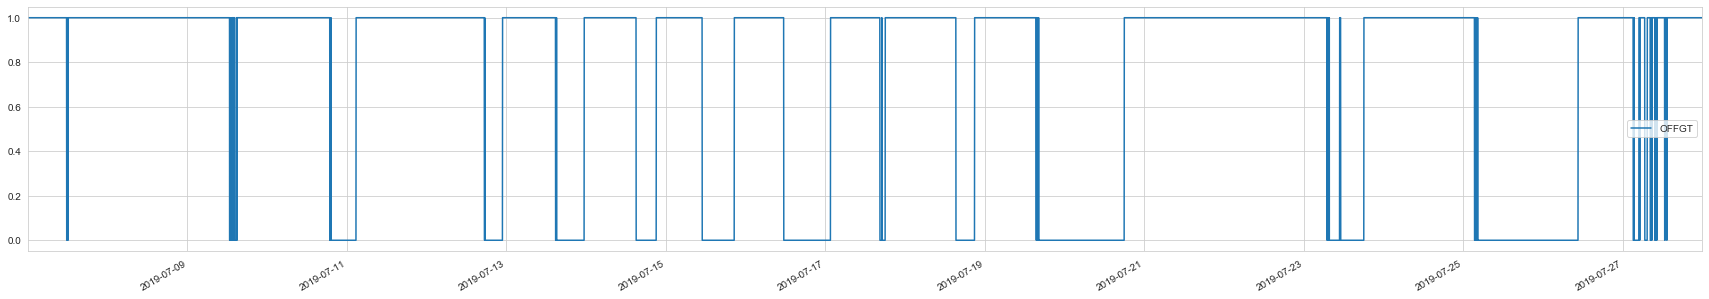

In [170]:
GT_df[['OFFGT']].plot(figsize=(30,5))

In [171]:
GT_df["2019-07-07 07:40:00":"2019-07-07 23:00:00":] # before resample

OFFGT    flowGT
2019-07-07 07:40:00    1.0  109.0887
2019-07-07 07:40:01    1.0  109.0936
2019-07-07 07:41:01    1.0  109.3822
2019-07-07 07:42:01    1.0  109.1731
2019-07-07 07:43:01    1.0  108.8503
2019-07-07 07:44:01    1.0  109.5565
2019-07-07 07:45:01    1.0  109.5941
2019-07-07 07:46:01    1.0  109.4852
2019-07-07 07:47:01    1.0  109.2537
2019-07-07 07:48:00    1.0  109.3456
2019-07-07 07:48:01    1.0  109.3447
2019-07-07 07:49:01    1.0  109.2869
2019-07-07 07:50:01    1.0  108.9720
2019-07-07 07:51:01    1.0  108.9835
2019-07-07 07:52:01    1.0  109.2799
2019-07-07 07:53:01    1.0  109.3408
2019-07-07 07:54:01    1.0  109.2479
2019-07-07 07:55:00    1.0  108.9952
2019-07-07 07:55:01    1.0  108.9989
2019-07-07 07:56:01    1.0  109.2167
2019-07-07 07:57:01    1.0  109.0964
2019-07-07 07:58:01    1.0  109.3569
2019-07-07 07:59:01    1.0  109.2270
2019-07-07 08:00:00    1.0  108.9251
2019-07-07 08:01:00    1.0  108.8784
2019-07-07 08:02:00    1.0  109.1120
2019-07-07 08:03:00    1.0  109.2188
2019-07-07 08:04:00    1.0  109.0119
2019-07-07 08:05:00    1.0  109.4691
2019-07-07 08:06:00    1.0  109.4057
...                    ...       ...
2019-07-07 22:31:00    1.0  109.8662
2019-07-07 22:32:00    1.0  109.3690
2019-07-07 22:33:00    1.0  108.9819
2019-07-07 22:34:00    1.0  109.0720
2019-07-07 22:35:00    1.0  109.2822
2019-07-07 22:36:00    1.0  109.2222
2019-07-07 22:37:00    1.0  109.1220
2019-07-07 22:38:00    1.0  109.1254
2019-07-07 22:39:00    1.0  108.6882
2019-07-07 22:40:00    1.0  109.2655
2019-07-07 22:41:00    1.0  109.2789
2019-07-07 22:42:00    1.0  109.5859
2019-07-07 22:43:00    1.0  109.1187
2019-07-07 22:44:00    1.0  109.4557
2019-07-07 22:45:00    1.0  109.3423
2019-07-07 22:46:00    1.0  109.7261
2019-07-07 22:47:00    1.0  109.1120
2019-07-07 22:48:00    1.0  109.2255
2019-07-07 22:49:00    1.0  109.2956
2019-07-07 22:50:00    1.0  109.4057
2019-07-07 22:51:00    1.0  109.3189
2019-07-07 22:52:00    1.0  109.1320
2019-07-07 22:53:00    1.0  109.3056
2019-07-07 22:54:00    1.0  109.4724
2019-07-07 22:55:00    1.0  109.4391
2019-07-07 22:56:00    1.0  109.2088
2019-07-07 22:57:00    1.0  109.4658
2019-07-07 22:58:00    1.0  109.2989
2019-07-07 22:59:00    1.0  109.4624
2019-07-07 23:00:00    1.0  109.4925

[924 rows x 2 columns]

In [172]:
GT_df["2019-07-19 15:34:00":"2019-07-19 15:43:00":] # before resample

OFFGT     flowGT
2019-07-19 15:34:00    1.0  94.875570
2019-07-19 15:37:00    1.0  50.694520
2019-07-19 15:39:00    1.0  91.284750
2019-07-19 15:42:00    0.0  19.047950
2019-07-19 15:43:00    0.0  -0.067473

In [173]:
minGT_df = GT_df.resample('1Min', convention = 'end').mean() #resample into 1 min rows, this is to match 1min GT data later
minGT_df
# 30211 rows

OFFGT    flowGT
2019-07-07 00:01:00    1.0  109.1254
2019-07-07 00:02:00    1.0  108.9785
2019-07-07 00:03:00    1.0  109.0653
2019-07-07 00:04:00    1.0  108.9085
2019-07-07 00:05:00    1.0  108.9919
2019-07-07 00:06:00    1.0  108.8150
2019-07-07 00:07:00    1.0  109.0453
2019-07-07 00:08:00    1.0  109.1154
2019-07-07 00:09:00    1.0  109.0953
2019-07-07 00:10:00    1.0  109.1187
2019-07-07 00:11:00    1.0  109.1821
2019-07-07 00:12:00    1.0  109.0787
2019-07-07 00:13:00    1.0  109.0987
2019-07-07 00:14:00    1.0  109.2155
2019-07-07 00:15:00    1.0  109.0920
2019-07-07 00:16:00    1.0  109.1788
2019-07-07 00:17:00    1.0  109.0520
2019-07-07 00:18:00    1.0  109.0219
2019-07-07 00:19:00    1.0  108.9885
2019-07-07 00:20:00    1.0  108.8450
2019-07-07 00:21:00    1.0  108.9518
2019-07-07 00:22:00    1.0  109.1154
2019-07-07 00:23:00    1.0  109.0052
2019-07-07 00:24:00    1.0  109.2388
2019-07-07 00:25:00    1.0  108.7983
2019-07-07 00:26:00    1.0  109.1988
2019-07-07 00:27:00    1.0  109.0019
2019-07-07 00:28:00    1.0  109.2488
2019-07-07 00:29:00    1.0  108.7182
2019-07-07 00:30:00    1.0  109.1387
...                    ...       ...
2019-07-27 23:26:00    1.0  103.0750
2019-07-27 23:27:00    1.0  102.9282
2019-07-27 23:28:00    1.0  103.0650
2019-07-27 23:29:00    1.0  103.2319
2019-07-27 23:30:00    1.0  102.9382
2019-07-27 23:31:00    1.0  102.8314
2019-07-27 23:32:00    1.0  103.2019
2019-07-27 23:33:00    1.0  103.0884
2019-07-27 23:34:00    1.0  103.1518
2019-07-27 23:35:00    1.0  103.1117
2019-07-27 23:36:00    1.0  103.0283
2019-07-27 23:37:00    1.0  103.0283
2019-07-27 23:38:00    1.0  103.1752
2019-07-27 23:39:00    1.0  103.0150
2019-07-27 23:40:00    1.0  102.9549
2019-07-27 23:41:00    1.0  103.1251
2019-07-27 23:42:00    1.0  102.8982
2019-07-27 23:43:00    1.0  103.0884
2019-07-27 23:44:00    1.0  103.2352
2019-07-27 23:45:00    1.0  103.1485
2019-07-27 23:46:00    1.0  103.0717
2019-07-27 23:47:00    1.0  103.0951
2019-07-27 23:48:00    1.0  103.1218
2019-07-27 23:49:00    1.0  103.1051
2019-07-27 23:50:00    1.0  103.2486
2019-07-27 23:51:00    1.0  103.0116
2019-07-27 23:52:00    1.0  102.9516
2019-07-27 23:53:00    1.0  103.1251
2019-07-27 23:54:00    1.0  103.0517
2019-07-27 23:55:00    1.0  103.1418

[30235 rows x 2 columns]

In [174]:
minGT_df["2019-07-07 07:40:00":"2019-07-07 23:00:00":] # after resample

OFFGT     flowGT
2019-07-07 07:40:00    1.0  109.09115
2019-07-07 07:41:00    1.0  109.38220
2019-07-07 07:42:00    1.0  109.17310
2019-07-07 07:43:00    1.0  108.85030
2019-07-07 07:44:00    1.0  109.55650
2019-07-07 07:45:00    1.0  109.59410
2019-07-07 07:46:00    1.0  109.48520
2019-07-07 07:47:00    1.0  109.25370
2019-07-07 07:48:00    1.0  109.34515
2019-07-07 07:49:00    1.0  109.28690
2019-07-07 07:50:00    1.0  108.97200
2019-07-07 07:51:00    1.0  108.98350
2019-07-07 07:52:00    1.0  109.27990
2019-07-07 07:53:00    1.0  109.34080
2019-07-07 07:54:00    1.0  109.24790
2019-07-07 07:55:00    1.0  108.99705
2019-07-07 07:56:00    1.0  109.21670
2019-07-07 07:57:00    1.0  109.09640
2019-07-07 07:58:00    1.0  109.35690
2019-07-07 07:59:00    1.0  109.22700
2019-07-07 08:00:00    1.0  108.92510
2019-07-07 08:01:00    1.0  108.87840
2019-07-07 08:02:00    1.0  109.11200
2019-07-07 08:03:00    1.0  109.21880
2019-07-07 08:04:00    1.0  109.01190
2019-07-07 08:05:00    1.0  109.46910
2019-07-07 08:06:00    1.0  109.40570
2019-07-07 08:07:00    1.0  109.28220
2019-07-07 08:08:00    1.0  109.12870
2019-07-07 08:09:00    1.0  109.11200
...                    ...        ...
2019-07-07 22:31:00    1.0  109.86620
2019-07-07 22:32:00    1.0  109.36900
2019-07-07 22:33:00    1.0  108.98190
2019-07-07 22:34:00    1.0  109.07200
2019-07-07 22:35:00    1.0  109.28220
2019-07-07 22:36:00    1.0  109.22220
2019-07-07 22:37:00    1.0  109.12200
2019-07-07 22:38:00    1.0  109.12540
2019-07-07 22:39:00    1.0  108.68820
2019-07-07 22:40:00    1.0  109.26550
2019-07-07 22:41:00    1.0  109.27890
2019-07-07 22:42:00    1.0  109.58590
2019-07-07 22:43:00    1.0  109.11870
2019-07-07 22:44:00    1.0  109.45570
2019-07-07 22:45:00    1.0  109.34230
2019-07-07 22:46:00    1.0  109.72610
2019-07-07 22:47:00    1.0  109.11200
2019-07-07 22:48:00    1.0  109.22550
2019-07-07 22:49:00    1.0  109.29560
2019-07-07 22:50:00    1.0  109.40570
2019-07-07 22:51:00    1.0  109.31890
2019-07-07 22:52:00    1.0  109.13200
2019-07-07 22:53:00    1.0  109.30560
2019-07-07 22:54:00    1.0  109.47240
2019-07-07 22:55:00    1.0  109.43910
2019-07-07 22:56:00    1.0  109.20880
2019-07-07 22:57:00    1.0  109.46580
2019-07-07 22:58:00    1.0  109.29890
2019-07-07 22:59:00    1.0  109.46240
2019-07-07 23:00:00    1.0  109.49250

[921 rows x 2 columns]

In [175]:
minGT_df["2019-07-19 15:34:00":"2019-07-19 15:43:00":] # after resample

OFFGT     flowGT
2019-07-19 15:34:00    1.0  94.875570
2019-07-19 15:35:00    NaN        NaN
2019-07-19 15:36:00    NaN        NaN
2019-07-19 15:37:00    1.0  50.694520
2019-07-19 15:38:00    NaN        NaN
2019-07-19 15:39:00    1.0  91.284750
2019-07-19 15:40:00    NaN        NaN
2019-07-19 15:41:00    NaN        NaN
2019-07-19 15:42:00    0.0  19.047950
2019-07-19 15:43:00    0.0  -0.067473

In [176]:
minGT_df = minGT_df.fillna(method='ffill') #forward fill NaNs, this is to match 1min GT data later
minGT_df
# 30211 rows

OFFGT    flowGT
2019-07-07 00:01:00    1.0  109.1254
2019-07-07 00:02:00    1.0  108.9785
2019-07-07 00:03:00    1.0  109.0653
2019-07-07 00:04:00    1.0  108.9085
2019-07-07 00:05:00    1.0  108.9919
2019-07-07 00:06:00    1.0  108.8150
2019-07-07 00:07:00    1.0  109.0453
2019-07-07 00:08:00    1.0  109.1154
2019-07-07 00:09:00    1.0  109.0953
2019-07-07 00:10:00    1.0  109.1187
2019-07-07 00:11:00    1.0  109.1821
2019-07-07 00:12:00    1.0  109.0787
2019-07-07 00:13:00    1.0  109.0987
2019-07-07 00:14:00    1.0  109.2155
2019-07-07 00:15:00    1.0  109.0920
2019-07-07 00:16:00    1.0  109.1788
2019-07-07 00:17:00    1.0  109.0520
2019-07-07 00:18:00    1.0  109.0219
2019-07-07 00:19:00    1.0  108.9885
2019-07-07 00:20:00    1.0  108.8450
2019-07-07 00:21:00    1.0  108.9518
2019-07-07 00:22:00    1.0  109.1154
2019-07-07 00:23:00    1.0  109.0052
2019-07-07 00:24:00    1.0  109.2388
2019-07-07 00:25:00    1.0  108.7983
2019-07-07 00:26:00    1.0  109.1988
2019-07-07 00:27:00    1.0  109.0019
2019-07-07 00:28:00    1.0  109.2488
2019-07-07 00:29:00    1.0  108.7182
2019-07-07 00:30:00    1.0  109.1387
...                    ...       ...
2019-07-27 23:26:00    1.0  103.0750
2019-07-27 23:27:00    1.0  102.9282
2019-07-27 23:28:00    1.0  103.0650
2019-07-27 23:29:00    1.0  103.2319
2019-07-27 23:30:00    1.0  102.9382
2019-07-27 23:31:00    1.0  102.8314
2019-07-27 23:32:00    1.0  103.2019
2019-07-27 23:33:00    1.0  103.0884
2019-07-27 23:34:00    1.0  103.1518
2019-07-27 23:35:00    1.0  103.1117
2019-07-27 23:36:00    1.0  103.0283
2019-07-27 23:37:00    1.0  103.0283
2019-07-27 23:38:00    1.0  103.1752
2019-07-27 23:39:00    1.0  103.0150
2019-07-27 23:40:00    1.0  102.9549
2019-07-27 23:41:00    1.0  103.1251
2019-07-27 23:42:00    1.0  102.8982
2019-07-27 23:43:00    1.0  103.0884
2019-07-27 23:44:00    1.0  103.2352
2019-07-27 23:45:00    1.0  103.1485
2019-07-27 23:46:00    1.0  103.0717
2019-07-27 23:47:00    1.0  103.0951
2019-07-27 23:48:00    1.0  103.1218
2019-07-27 23:49:00    1.0  103.1051
2019-07-27 23:50:00    1.0  103.2486
2019-07-27 23:51:00    1.0  103.0116
2019-07-27 23:52:00    1.0  102.9516
2019-07-27 23:53:00    1.0  103.1251
2019-07-27 23:54:00    1.0  103.0517
2019-07-27 23:55:00    1.0  103.1418

[30235 rows x 2 columns]

In [177]:
minGT_df["2019-07-19 15:34:00":"2019-07-19 15:43:00":] # after resample

OFFGT     flowGT
2019-07-19 15:34:00    1.0  94.875570
2019-07-19 15:35:00    1.0  94.875570
2019-07-19 15:36:00    1.0  94.875570
2019-07-19 15:37:00    1.0  50.694520
2019-07-19 15:38:00    1.0  50.694520
2019-07-19 15:39:00    1.0  91.284750
2019-07-19 15:40:00    1.0  91.284750
2019-07-19 15:41:00    1.0  91.284750
2019-07-19 15:42:00    0.0  19.047950
2019-07-19 15:43:00    0.0  -0.067473

In [178]:
minGT_df = minGT_df.reset_index()

In [179]:
minGT_df[:2]

index  OFFGT    flowGT
0 2019-07-07 00:01:00    1.0  109.1254
1 2019-07-07 00:02:00    1.0  108.9785

In [180]:
minGT_df = minGT_df.rename(columns={'index':'time'})
minGT_df[:5]

time  OFFGT    flowGT
0 2019-07-07 00:01:00    1.0  109.1254
1 2019-07-07 00:02:00    1.0  108.9785
2 2019-07-07 00:03:00    1.0  109.0653
3 2019-07-07 00:04:00    1.0  108.9085
4 2019-07-07 00:05:00    1.0  108.9919

In [181]:
minGT_df = minGT_df.set_index('time') #drop(columns=['level_0']) <-- dont need this 

In [182]:
minGT_df[:5]

OFFGT    flowGT
time                                
2019-07-07 00:01:00    1.0  109.1254
2019-07-07 00:02:00    1.0  108.9785
2019-07-07 00:03:00    1.0  109.0653
2019-07-07 00:04:00    1.0  108.9085
2019-07-07 00:05:00    1.0  108.9919

Keeping at 1min now that V2 data is matched at 1min

###### Y label reclassify - not needed
Only need this if binning the timestamps at >1min blocks.
___
Not going to reclassify OFFGT into binary labels at this point. See how it goes with the model. Assume OFFGT <1 is off. 

Other states could be;
* Good | 120 - 100 flow
* Low | 99 - 60 flow
* Bad | 59 - 0 flow (standby, offline, fault)

In [183]:
#GT15_df = GT_df.resample('15Min').mean() #this will average over 15min block
#GT15_df[0:20]

In [184]:
#GT30_df = GT_df.resample('30Min').mean() #this will average over 30min block
#GT30_df[0:100]

In [185]:
#GT15_df[['OFFGT']].plot(figsize=(30,5))

In [186]:
#GT30_df[['OFFGT']].plot(figsize=(30,5))

___

###### Append GT data to V2 data - one dataframe

In [187]:
minGT_df

OFFGT    flowGT
time                                
2019-07-07 00:01:00    1.0  109.1254
2019-07-07 00:02:00    1.0  108.9785
2019-07-07 00:03:00    1.0  109.0653
2019-07-07 00:04:00    1.0  108.9085
2019-07-07 00:05:00    1.0  108.9919
2019-07-07 00:06:00    1.0  108.8150
2019-07-07 00:07:00    1.0  109.0453
2019-07-07 00:08:00    1.0  109.1154
2019-07-07 00:09:00    1.0  109.0953
2019-07-07 00:10:00    1.0  109.1187
2019-07-07 00:11:00    1.0  109.1821
2019-07-07 00:12:00    1.0  109.0787
2019-07-07 00:13:00    1.0  109.0987
2019-07-07 00:14:00    1.0  109.2155
2019-07-07 00:15:00    1.0  109.0920
2019-07-07 00:16:00    1.0  109.1788
2019-07-07 00:17:00    1.0  109.0520
2019-07-07 00:18:00    1.0  109.0219
2019-07-07 00:19:00    1.0  108.9885
2019-07-07 00:20:00    1.0  108.8450
2019-07-07 00:21:00    1.0  108.9518
2019-07-07 00:22:00    1.0  109.1154
2019-07-07 00:23:00    1.0  109.0052
2019-07-07 00:24:00    1.0  109.2388
2019-07-07 00:25:00    1.0  108.7983
2019-07-07 00:26:00    1.0  109.1988
2019-07-07 00:27:00    1.0  109.0019
2019-07-07 00:28:00    1.0  109.2488
2019-07-07 00:29:00    1.0  108.7182
2019-07-07 00:30:00    1.0  109.1387
...                    ...       ...
2019-07-27 23:26:00    1.0  103.0750
2019-07-27 23:27:00    1.0  102.9282
2019-07-27 23:28:00    1.0  103.0650
2019-07-27 23:29:00    1.0  103.2319
2019-07-27 23:30:00    1.0  102.9382
2019-07-27 23:31:00    1.0  102.8314
2019-07-27 23:32:00    1.0  103.2019
2019-07-27 23:33:00    1.0  103.0884
2019-07-27 23:34:00    1.0  103.1518
2019-07-27 23:35:00    1.0  103.1117
2019-07-27 23:36:00    1.0  103.0283
2019-07-27 23:37:00    1.0  103.0283
2019-07-27 23:38:00    1.0  103.1752
2019-07-27 23:39:00    1.0  103.0150
2019-07-27 23:40:00    1.0  102.9549
2019-07-27 23:41:00    1.0  103.1251
2019-07-27 23:42:00    1.0  102.8982
2019-07-27 23:43:00    1.0  103.0884
2019-07-27 23:44:00    1.0  103.2352
2019-07-27 23:45:00    1.0  103.1485
2019-07-27 23:46:00    1.0  103.0717
2019-07-27 23:47:00    1.0  103.0951
2019-07-27 23:48:00    1.0  103.1218
2019-07-27 23:49:00    1.0  103.1051
2019-07-27 23:50:00    1.0  103.2486
2019-07-27 23:51:00    1.0  103.0116
2019-07-27 23:52:00    1.0  102.9516
2019-07-27 23:53:00    1.0  103.1251
2019-07-27 23:54:00    1.0  103.0517
2019-07-27 23:55:00    1.0  103.1418

[30235 rows x 2 columns]

In [188]:
minGT_df.isnull().sum()

OFFGT     0
flowGT    0
dtype: int64

In [189]:
min_data

amp1V1   amp2V1   amp3V1   amp4V1   amp5V1  freq1V1  \
time                                                                        
2019-07-07 00:00:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:01:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:02:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:03:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:04:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:05:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:06:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:07:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:08:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:09:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:10:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:11:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:12:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:13:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:14:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:15:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:16:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:17:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:18:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:19:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:20:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:21:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:22:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:23:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:24:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:25:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:26:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:27:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:28:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:29:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
...                      ...      ...      ...      ...      ...      ...   
2019-07-27 23:01:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:02:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:03:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:04:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:05:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:06:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:07:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:08:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:09:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:10:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:11:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:12:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:13:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:14:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:15:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:16:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:17:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:18:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:19:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:20:0

In [190]:
min_data.isnull().sum()

amp1V1     0
amp2V1     0
amp3V1     0
amp4V1     0
amp5V1     0
freq1V1    0
freq2V1    0
freq3V1    0
freq4V1    0
freq5V1    0
amp1V2     0
amp2V2     0
amp3V2     0
amp4V2     0
amp5V2     0
freq1V2    0
freq2V2    0
freq3V2    0
freq4V2    0
freq5V2    0
amp1V3     0
amp2V3     0
amp3V3     0
amp4V3     0
amp5V3     0
freq1V3    0
freq2V3    0
freq3V3    0
freq4V3    0
freq5V3    0
Temp1      0
Temp2      0
Temp3      0
dtype: int64

In [191]:
#V2GT = pd.merge(min_data, GT_df, right_index = True, left_index = True)
#V2GT = V2GT.sort_index() # can be slow
#V2GT
# merge two dfs using the index
# 22651 rows

In [192]:
#V2GT = pd.concat([min_data, GT_df], sort = True, join ='outer', axis = 0)
#V2GT = V2GT.sort_index() # can be slow
#V2GT
# concatting two df, but will end up with duplicate timestamp rows - another step needed to groupby 1min....
# 62127 rows

In [193]:
#V2GT = pd.merge(min_data, GT_df, on ='time', how = 'left')
#V2GT = V2GT.sort_index() # can be slow
#V2GT
# merge two dfs using the index

In [194]:
V2GT = min_data.join(minGT_df, how = 'left')
V2GT = V2GT.sort_index() # can be slow
V2GT
# join two dfs using the index, first index is NaN still

amp1V1   amp2V1   amp3V1   amp4V1   amp5V1  freq1V1  \
time                                                                        
2019-07-07 00:00:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:01:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:02:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:03:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:04:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:05:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:06:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:07:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:08:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:09:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:10:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:11:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:12:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:13:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:14:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:15:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:16:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:17:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:18:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:19:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:20:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:21:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:22:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:23:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:24:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:25:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:26:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:27:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:28:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
2019-07-07 00:29:00  0.06952  0.07669  0.07902  0.08550  0.10278    320.0   
...                      ...      ...      ...      ...      ...      ...   
2019-07-27 23:01:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:02:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:03:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:04:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:05:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:06:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:07:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:08:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:09:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:10:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:11:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:12:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:13:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:14:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:15:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:16:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:17:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:18:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:19:00  0.04425  0.05193  0.06990  0.07445  0.08023      5.0   
2019-07-27 23:20:0

In [195]:
V2GT.isnull().sum()

amp1V1     0
amp2V1     0
amp3V1     0
amp4V1     0
amp5V1     0
freq1V1    0
freq2V1    0
freq3V1    0
freq4V1    0
freq5V1    0
amp1V2     0
amp2V2     0
amp3V2     0
amp4V2     0
amp5V2     0
freq1V2    0
freq2V2    0
freq3V2    0
freq4V2    0
freq5V2    0
amp1V3     0
amp2V3     0
amp3V3     0
amp4V3     0
amp5V3     0
freq1V3    0
freq2V3    0
freq3V3    0
freq4V3    0
freq5V3    0
Temp1      0
Temp2      0
Temp3      0
OFFGT      1
flowGT     1
dtype: int64

In [196]:
V2GT = V2GT.fillna(method = 'bfill')
#V2GT
# got two nans in the first row, did a backfill since not able to do forwardfill.

In [197]:
V2GT.isnull().sum()

amp1V1     0
amp2V1     0
amp3V1     0
amp4V1     0
amp5V1     0
freq1V1    0
freq2V1    0
freq3V1    0
freq4V1    0
freq5V1    0
amp1V2     0
amp2V2     0
amp3V2     0
amp4V2     0
amp5V2     0
freq1V2    0
freq2V2    0
freq3V2    0
freq4V2    0
freq5V2    0
amp1V3     0
amp2V3     0
amp3V3     0
amp4V3     0
amp5V3     0
freq1V3    0
freq2V3    0
freq3V3    0
freq4V3    0
freq5V3    0
Temp1      0
Temp2      0
Temp3      0
OFFGT      0
flowGT     0
dtype: int64

In [198]:
V2GT[:2]

amp1V1   amp2V1   amp3V1  amp4V1   amp5V1  freq1V1  \
time                                                                       
2019-07-07 00:00:00  0.06952  0.07669  0.07902  0.0855  0.10278    320.0   
2019-07-07 00:01:00  0.06952  0.07669  0.07902  0.0855  0.10278    320.0   

                     freq2V1  freq3V1  freq4V1  freq5V1  ...  freq1V3  \
time                                                     ...            
2019-07-07 00:00:00     13.0      5.0     11.0    213.0  ...    107.0   
2019-07-07 00:01:00     13.0      5.0     11.0    213.0  ...    107.0   

                     freq2V3  freq3V3  freq4V3  freq5V3  Temp1  Temp2  Temp3  \
time                                                                           
2019-07-07 00:00:00     18.0      7.0      5.0     30.0   23.5   27.8   36.6   
2019-07-07 00:01:00     18.0      7.0      5.0     30.0   23.5   27.8   36.6   

                     OFFGT    flowGT  
time                                  
2019-07-07 00:00:00    1.0  109.1254  
2019-07-07 00:01:00    1.0  109.1254  

[2 rows x 35 columns]

In [199]:
V2GT.dtypes

amp1V1     float64
amp2V1     float64
amp3V1     float64
amp4V1     float64
amp5V1     float64
freq1V1    float64
freq2V1    float64
freq3V1    float64
freq4V1    float64
freq5V1    float64
amp1V2     float64
amp2V2     float64
amp3V2     float64
amp4V2     float64
amp5V2     float64
freq1V2    float64
freq2V2    float64
freq3V2    float64
freq4V2    float64
freq5V2    float64
amp1V3     float64
amp2V3     float64
amp3V3     float64
amp4V3     float64
amp5V3     float64
freq1V3    float64
freq2V3    float64
freq3V3    float64
freq4V3    float64
freq5V3    float64
Temp1      float64
Temp2      float64
Temp3      float64
OFFGT      float64
flowGT     float64
dtype: object

In [200]:
V2GT.describe()

amp1V1        amp2V1        amp3V1        amp4V1        amp5V1  \
count  30211.000000  30211.000000  30211.000000  30211.000000  30211.000000   
mean       0.046053      0.045256      0.046169      0.046577      0.046622   
std        0.017783      0.016749      0.017017      0.018337      0.019304   
min        0.023820      0.023030      0.023170      0.024340      0.023480   
25%        0.033440      0.033450      0.033670      0.033660      0.033610   
50%        0.040710      0.039650      0.039640      0.039420      0.039890   
75%        0.052640      0.051650      0.054050      0.054520      0.052210   
max        0.130160      0.143620      0.128480      0.131160      0.147100   

            freq1V1       freq2V1       freq3V1       freq4V1       freq5V1  \
count  30211.000000  30211.000000  30211.000000  30211.000000  30211.000000   
mean      75.935719     70.418159     58.526729     62.772599     73.961339   
std      152.348533    157.791389    126.797206    131.994177    141.150182   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.000000      5.000000      5.000000      5.000000      5.000000   
50%       11.000000     11.000000     11.000000     11.000000     10.000000   
75%       16.000000     15.000000     15.000000     15.000000     22.000000   
max     1211.000000   1561.000000    934.000000   1238.000000   1411.000000   

       ...       freq1V3       freq2V3       freq3V3       freq4V3  \
count  ...  30211.000000  30211.000000  30211.000000  30211.000000   
mean   ...    112.795836    102.027639     88.328324     89.693754   
std    ...    267.638811    213.603836    187.609166    211.018428   
min    ...      1.000000      0.000000      0.000000      0.000000   
25%    ...      7.000000      8.000000      8.000000      7.000000   
50%    ...     16.000000     23.000000     23.000000     20.000000   
75%    ...    107.000000    123.000000    123.000000    107.000000   
max    ...   1596.000000   1522.000000   1596.000000   1575.000000   

            freq5V3         Temp1         Temp2         Temp3         OFFGT  \
count  30211.000000  30211.000000  30211.000000  30211.000000  30211.000000   
mean      87.397306     25.437874     28.427116     35.806067      0.737811   
std      210.762637      3.839294      4.088310      6.669630      0.439832   
min        0.000000     18.300000     18.400000     18.200000      0.000000   
25%        5.000000     22.200000     25.500000     32.600000      0.000000   
50%       16.000000     24.600000     27.800000     35.800000      1.000000   
75%      107.000000     29.600000     31.600000     42.100000      1.000000   
max     1522.000000     35.300000     41.300000     51.800000      1.000000   

             flowGT  
count  30211.000000  
mean      66.934493  
std       41.231982  
min       -0.180937  
25%       -0.060799  
50%       80.055050  
75%       97.488505  
max      109.989700  

[8 rows x 35 columns]

In [203]:
bool_series = pd.isnull(V2GT['OFFGT'])
V2GT[bool_series]

Empty DataFrame
Columns: [amp1V1, amp2V1, amp3V1, amp4V1, amp5V1, freq1V1, freq2V1, freq3V1, freq4V1, freq5V1, amp1V2, amp2V2, amp3V2, amp4V2, amp5V2, freq1V2, freq2V2, freq3V2, freq4V2, freq5V2, amp1V3, amp2V3, amp3V3, amp4V3, amp5V3, freq1V3, freq2V3, freq3V3, freq4V3, freq5V3, Temp1, Temp2, Temp3, OFFGT, flowGT]
Index: []

[0 rows x 35 columns]

In [205]:
#minGT_df["2019-07-19 15:34:00":"2019-07-19 15:43:00":] check NaN location

In [206]:
pandas_profiling.ProfileReport(V2GT) # see if this works, might provide warnings & labels

## 2. Create data chunks - samples
* split pandas dataframe by day
* pandas.to_datetime
* df.Set_index
* group by n seconds - pd.group
* pandas.Grouper

In [ ]:
# split by time, maybe 12 or 6 hr shift?

## 3. Create test/train splits
* test is actually validation in this case
* our real test will be unseen data set aside until the very end

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random state = 20)

In [ ]:
x_train #check values

In [ ]:
y_train #check labels

In [ ]:
print(model.feature_importances_) # should show number of features and which is important (largest number)